In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função para converter uma odd em categoria
def converter_odd_em_categoria(i):
    if i < 1.05: return 1
    elif i < 1.15: return 2
    elif i < 1.3: return 3
    elif i < 1.45: return 4
    elif i < 1.7: return 5
    elif i < 2.1: return 6
    elif i < 2.6: return 7
    elif i < 3.5: return 8
    elif i < 5: return 9
    elif i < 10: return 10
    else: return 11

# Inicialização das variáveis
array_count, array_geral = [], []
matrix_count = np.zeros((48, 10))
apostar_count = [0]
media_array = []
rodada_aposta = []
apostar_matrix = []
sense, media_apostas, order = 0, 0, 21
register1, register2 = 0, 0
bag = 50
i = 1

# Função para calcular a média das últimas 640 jogadas
def calcular_media(array, interval):
    return sum(array[-interval:]) / interval

def plotar_grafico(jogadas, janelas):
    medias_moveis = calcular_media(jogadas, janelas)

    # Calcular média geral
    media_geral = calcular_media(jogadas)

    # Visualizar os resultados
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(jogadas) - janela + 1), medias_moveis, label='Média Móvel (Janela = 10)')
    plt.axhline(y=media_geral, color='r', linestyle='--', label='Média Geral')
    plt.xlabel('Número de Jogadas')
    plt.ylabel('Proporção de Valores > 4')
    plt.title('Médias Móveis e Média Geral de Jogadas de Dados')
    plt.legend()
    plt.show()

while i != 0:
    print("Entrada carregada ...")
    print(len(array_geral))
    print(24 * '*-')
             
    i = input("Insira a última entrada determinada: ")
    while i == '':
        i = input("Insira a última entrada determinada: ") 
    i = float(i.replace(',', '.'))
    if i == 0:
        break
    
    odd_saida = converter_odd_em_categoria(i)

    # Atualiza os arrays
    if odd_saida >= 5:
        array_count.append(1)
    else:
        array_count.append(0)
    
    array_geral.append(odd_saida)
    
    # Verifica se array_count tem pelo menos 640 elementos
    if len(array_count) >= 640:
        for row in range(48):
            start = 160 + row * 10
            for col in range(10):
                interval = start + col
                matrix_count[row, col] = calcular_media(array_count, interval)
                if matrix_count[row, col] < 0.60 or matrix_count[row, col] > 0.69:
                    sense = 1
                    register1, register2 = row, col

        # Cria um DataFrame pandas a partir da matriz para impressão mais legível
        df_matrix = pd.DataFrame(matrix_count, columns=[f'Interval {160 + row * 10 + col}' for col in range(10)])
        print(df_matrix)
        
        if sense == 1:
            if order <= 20:
                order += 1
            else:
                if odd_saida >= 5:
                    apostar_count.append(1)
                else:
                    apostar_count.append(0)
                
                media_apostas = sum(apostar_count) / len(apostar_count)
                media_array.append(media_apostas)
                
                if media_apostas >= 0.73 and len(apostar_count) >= 20:
                    apostar_matrix.append(apostar_count)
                    apostar_count = [0]
                    order = 0
                    sense = 0
                if len(apostar_count) >= 640 and media_apostas <= 0.69:
                    apostar_matrix.append(apostar_count)
                    apostar_count = [0]
                    sense = 0
                    order = 0

                rodada_aposta.append(i)
                plotar_grafico(apostar_count, 20)
                print(f'Quantidade de Apostas: {len(apostar_count)} \nMedia Apostas: {media_apostas} \nÚltima entrada: {array_count[-1]}')
                order += 1

# Salvar os resultados em arquivos
df = pd.DataFrame({'Media_Apostas': media_array, 'Rodada': rodada_aposta})
df.to_csv("/home/darkcover/Documentos/Out/dados/Parte2/estudo6.csv")
df.to_excel("/home/darkcover/Documentos/Out/dados/Parte2/estudo6.xlsx")

df1 = pd.DataFrame({'Odd_Saida': array_geral})
df1.to_excel("/home/darkcover/Documentos/Out/dados/Parte2/estudo7.xlsx")


Entrada carregada ...
0
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Entrada carregada ...
1
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Entrada carregada ...
2
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Entrada carregada ...
3
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [ ]:
import matplotlib.pyplot as plt

# Gerar dados de jogadas (exemplo)
jogadas = np.random.randint(1, 7, size=640)

# Calcular médias móveis
janela = 10
medias_moveis = calcular_media_movel(jogadas, janela)

# Calcular média geral
media_geral = calcular_media_geral(jogadas)

# Visualizar os resultados
plt.figure(figsize=(12, 6))
plt.plot(range(len(jogadas) - janela + 1), medias_moveis, label='Média Móvel (Janela = 10)')
plt.axhline(y=media_geral, color='r', linestyle='--', label='Média Geral')
plt.xlabel('Número de Jogadas')
plt.ylabel('Proporção de Valores > 4')
plt.title('Médias Móveis e Média Geral de Jogadas de Dados')
plt.legend()
plt.show()


In [ ]:
from scipy import stats

# Número de sucessos (valores > 4)
sucessos = len(jogadas[jogadas > 4])
# Número de tentativas
n = len(jogadas)
# Proporção esperada
p_esperada = 1/3

# Teste de proporções
z_stat, p_value = stats.proportions_ztest(sucessos, n, p_esperada)

print("Estatística Z:", z_stat)
print("Valor p:", p_value)


Data Carregada ...
Saida: 0 
Media Geral: 0.00
Saida: 1 
Media Geral: 0.50
Saida: 2 
Media Geral: 0.67
Saida: 3 
Media Geral: 0.75
Saida: 4 
Media Geral: 0.60
Saida: 5 
Media Geral: 0.67
Saida: 6 
Media Geral: 0.71
Saida: 7 
Media Geral: 0.62
Saida: 8 
Media Geral: 0.67
Saida: 9 
Media Geral: 0.70
Saida: 10 
Media Geral: 0.73
Saida: 11 
Media Geral: 0.75
Saida: 12 
Media Geral: 0.69
Saida: 13 
Media Geral: 0.71
Saida: 14 
Media Geral: 0.73
Saida: 15 
Media Geral: 0.75
Saida: 16 
Media Geral: 0.76
Saida: 17 
Media Geral: 0.78
Saida: 18 
Media Geral: 0.74
Saida: 19 
Media Geral: 0.70
Saida: 20 
Media Geral: 0.71
Saida: 21 
Media Geral: 0.68
Saida: 22 
Media Geral: 0.65
Saida: 23 
Media Geral: 0.67
Saida: 24 
Media Geral: 0.68
Saida: 25 
Media Geral: 0.69
Saida: 26 
Media Geral: 0.70
Saida: 27 
Media Geral: 0.68
Saida: 28 
Media Geral: 0.69
Saida: 29 
Media Geral: 0.67
Saida: 30 
Media Geral: 0.68
Saida: 31 
Media Geral: 0.69
Saida: 32 
Media Geral: 0.70
Saida: 33 
Media Geral: 0.71
Saida

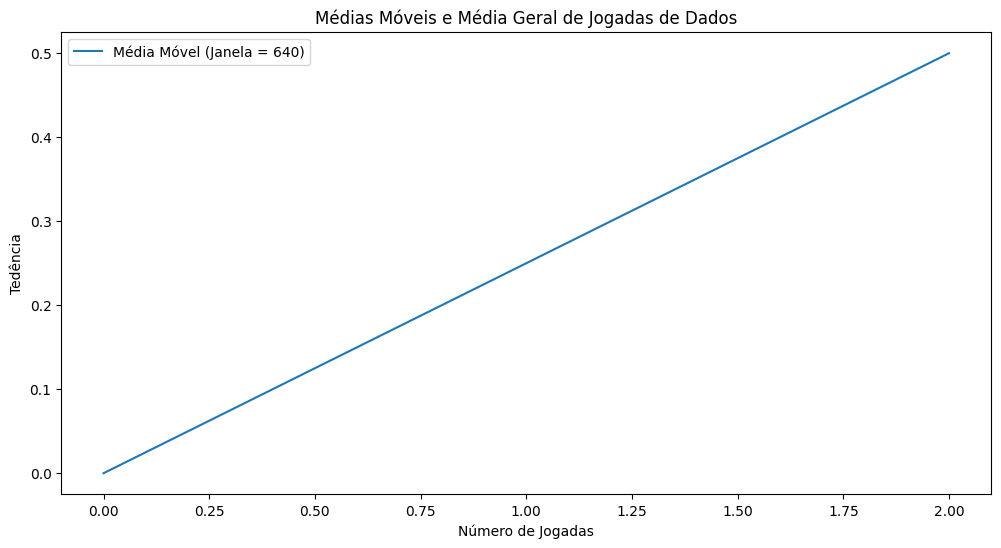

Quantidade de Apostas: 2 
Media Apostas: 0.50 
Última entrada: 1
Saida: 640 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.679012      0.674847      0.670732   
1       0.670588      0.672515      0.674419      0.670520      0.672414   
2       0.677778      0.679558      0.681319      0.683060      0.684783   
3       0.694737      0.696335      0.697917      0.694301      0.695876   
4       0.685000      0.686567      0.683168      0.684729      0.686275   
5       0.685714      0.687204      0.688679      0.685446      0.686916   
6       0.695455      0.692308      0.693694      0.695067      0.696429   
7       0.695652      0.692641      0.693966      0.695279      0.692308   
8       0.687500      0.688797      0.690083      0.691358      0.692623   
9       0.692000      0.693227      0.694444      0.695652      0.692913   
10      0.688462      0.685824      0.687023      0.688213      0.685

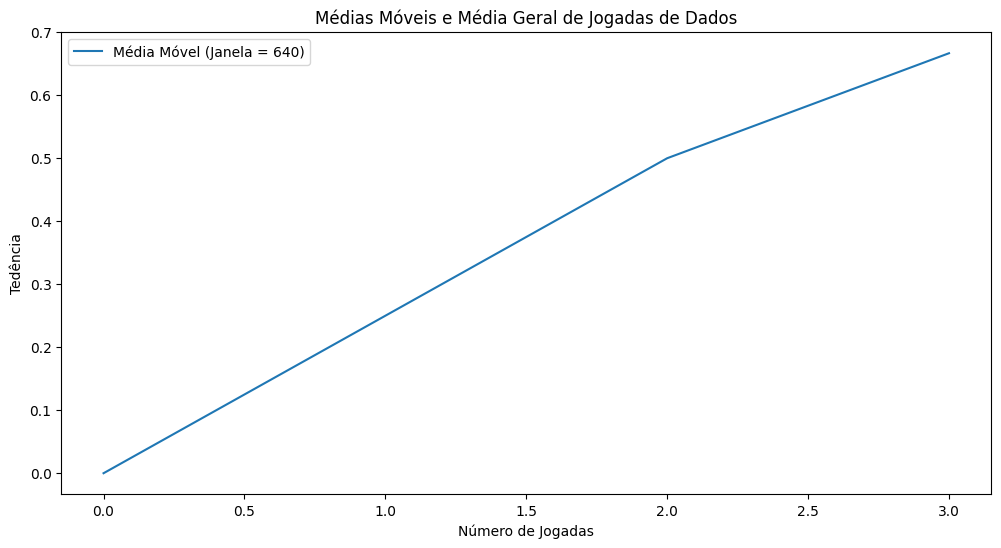

Quantidade de Apostas: 3 
Media Apostas: 0.67 
Última entrada: 1
Saida: 641 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.675000      0.677019      0.679012      0.674847      0.670732   
1       0.670588      0.666667      0.668605      0.670520      0.666667   
2       0.672222      0.674033      0.675824      0.677596      0.679348   
3       0.689474      0.691099      0.692708      0.694301      0.690722   
4       0.685000      0.681592      0.683168      0.679803      0.681373   
5       0.685714      0.682464      0.683962      0.685446      0.682243   
6       0.690909      0.692308      0.689189      0.690583      0.691964   
7       0.695652      0.692641      0.689655      0.690987      0.692308   
8       0.687500      0.684647      0.685950      0.687243      0.688525   
9       0.688000      0.689243      0.690476      0.691700      0.692913   
10      0.688462      0.685824      0.683206      0.684411      0.685

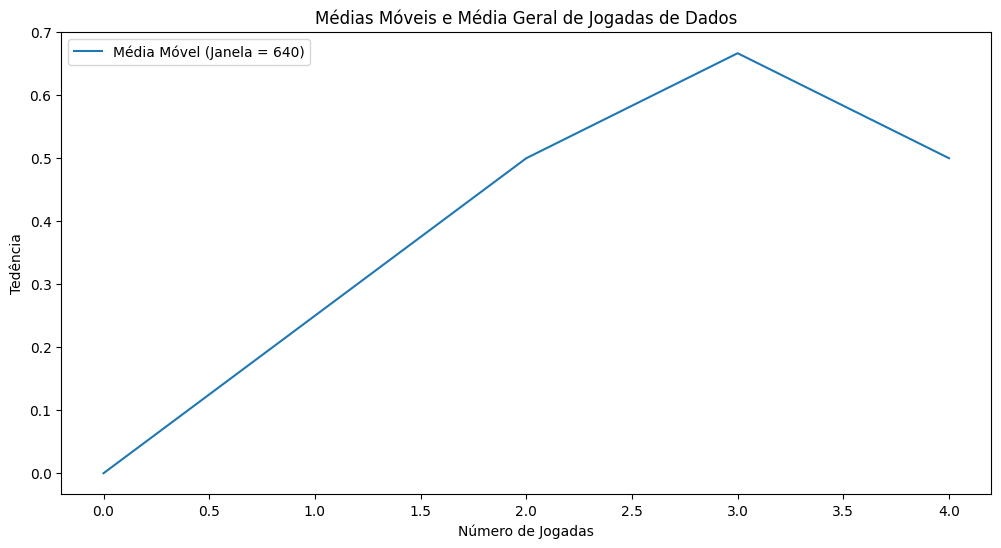

Quantidade de Apostas: 4 
Media Apostas: 0.50 
Última entrada: 0
Saida: 642 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.677019      0.679012      0.680982      0.676829   
1       0.670588      0.672515      0.668605      0.670520      0.672414   
2       0.672222      0.674033      0.675824      0.677596      0.679348   
3       0.689474      0.691099      0.692708      0.694301      0.695876   
4       0.685000      0.686567      0.683168      0.684729      0.681373   
5       0.685714      0.687204      0.683962      0.685446      0.686916   
6       0.690909      0.692308      0.693694      0.690583      0.691964   
7       0.695652      0.696970      0.693966      0.690987      0.692308   
8       0.691667      0.688797      0.685950      0.687243      0.688525   
9       0.688000      0.689243      0.690476      0.691700      0.692913   
10      0.688462      0.689655      0.687023      0.684411      0.685

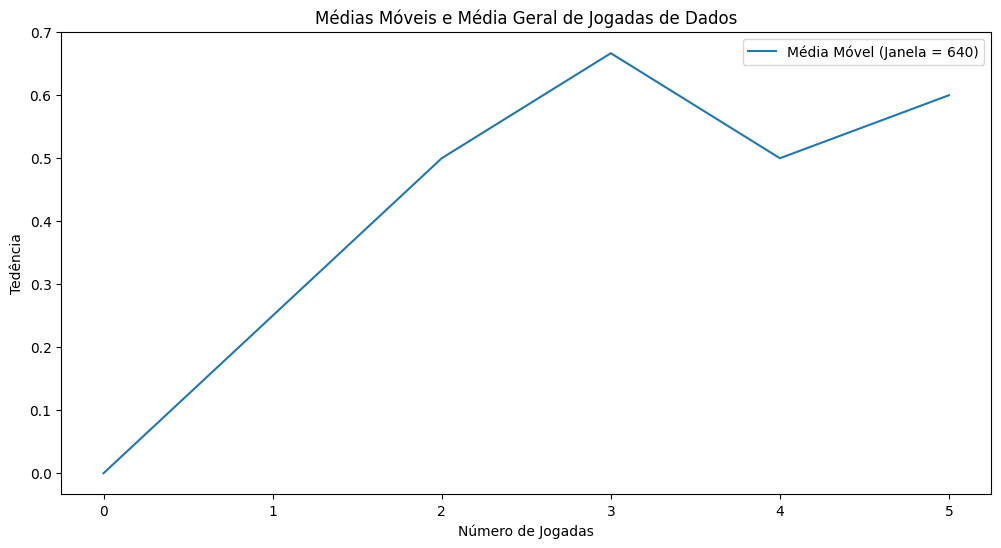

Quantidade de Apostas: 5 
Media Apostas: 0.60 
Última entrada: 1
Saida: 643 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.679012      0.680982      0.682927   
1       0.670588      0.672515      0.674419      0.670520      0.672414   
2       0.672222      0.674033      0.675824      0.677596      0.679348   
3       0.689474      0.691099      0.692708      0.694301      0.695876   
4       0.685000      0.686567      0.688119      0.684729      0.686275   
5       0.685714      0.687204      0.688679      0.685446      0.686916   
6       0.690909      0.692308      0.693694      0.695067      0.691964   
7       0.695652      0.696970      0.698276      0.695279      0.692308   
8       0.691667      0.692946      0.690083      0.687243      0.688525   
9       0.688000      0.689243      0.690476      0.691700      0.692913   
10      0.692308      0.689655      0.690840      0.688213      0.685

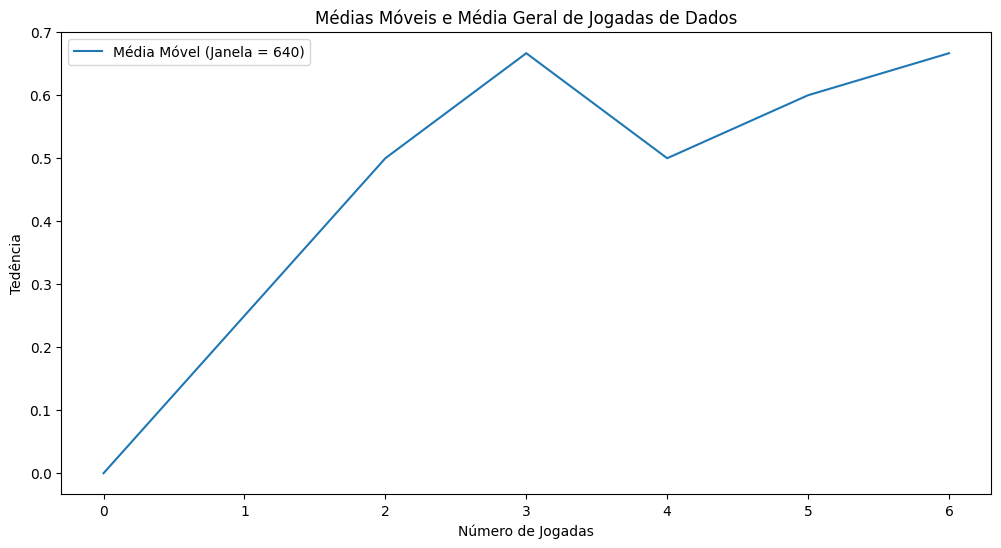

Quantidade de Apostas: 6 
Media Apostas: 0.67 
Última entrada: 1
Saida: 644 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.680982      0.682927   
1       0.670588      0.672515      0.674419      0.676301      0.672414   
2       0.677778      0.674033      0.675824      0.677596      0.679348   
3       0.689474      0.691099      0.692708      0.694301      0.695876   
4       0.690000      0.686567      0.688119      0.689655      0.686275   
5       0.685714      0.687204      0.688679      0.690141      0.686916   
6       0.690909      0.692308      0.693694      0.695067      0.696429   
7       0.695652      0.696970      0.698276      0.699571      0.696581   
8       0.695833      0.692946      0.694215      0.691358      0.688525   
9       0.688000      0.689243      0.690476      0.691700      0.692913   
10      0.692308      0.693487      0.690840      0.692015      0.689

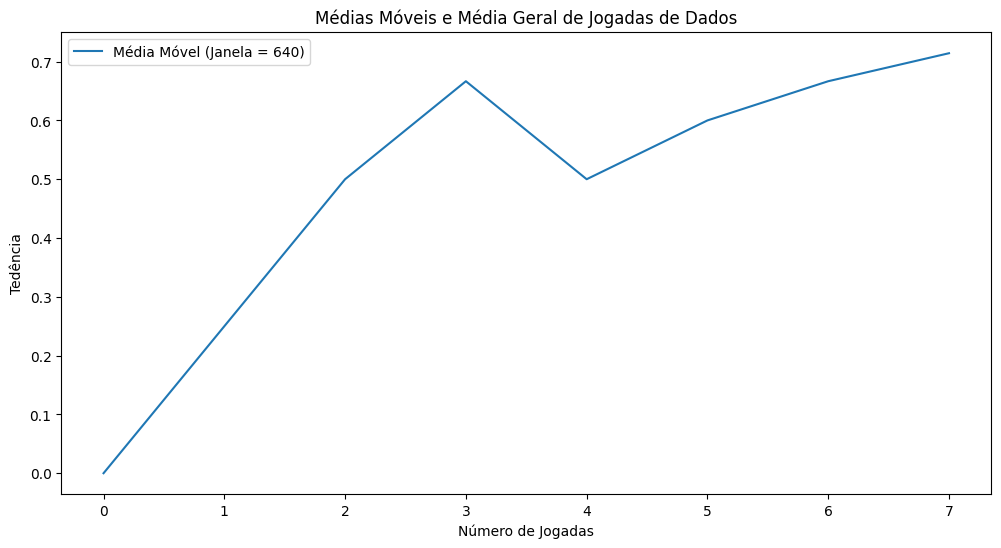

Quantidade de Apostas: 7 
Media Apostas: 0.71 
Última entrada: 1
Saida: 645 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.682927   
1       0.670588      0.672515      0.674419      0.676301      0.678161   
2       0.677778      0.679558      0.675824      0.677596      0.679348   
3       0.689474      0.691099      0.692708      0.694301      0.695876   
4       0.695000      0.691542      0.688119      0.689655      0.691176   
5       0.690476      0.687204      0.688679      0.690141      0.691589   
6       0.690909      0.692308      0.693694      0.695067      0.696429   
7       0.695652      0.696970      0.698276      0.699571      0.700855   
8       0.695833      0.697095      0.694215      0.695473      0.692623   
9       0.692000      0.689243      0.690476      0.691700      0.692913   
10      0.696154      0.693487      0.694656      0.692015      0.693

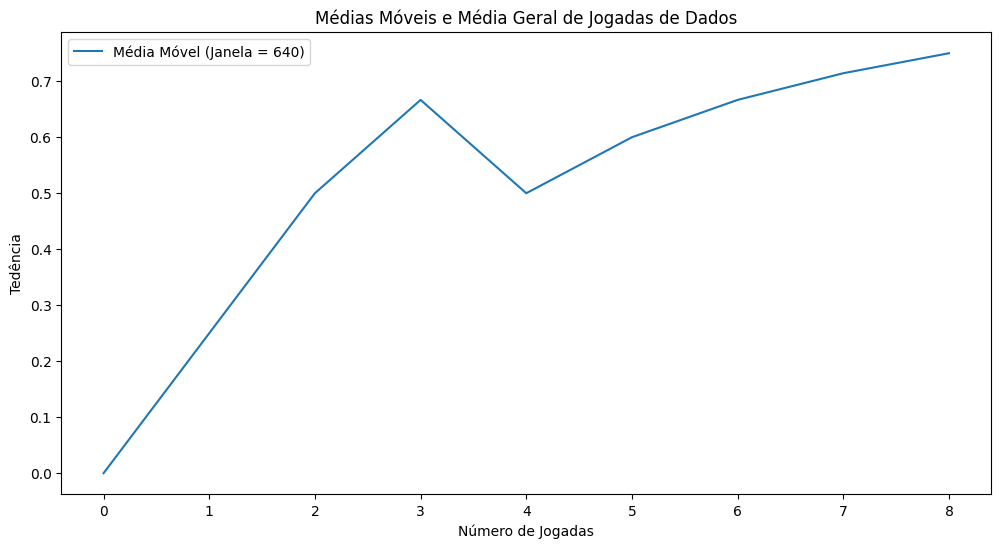

Quantidade de Apostas: 8 
Media Apostas: 0.75 
Última entrada: 1
Saida: 646 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.683230      0.685185      0.687117      0.689024   
1       0.676471      0.672515      0.674419      0.676301      0.678161   
2       0.677778      0.679558      0.681319      0.677596      0.679348   
3       0.689474      0.691099      0.692708      0.694301      0.695876   
4       0.700000      0.696517      0.693069      0.689655      0.691176   
5       0.690476      0.691943      0.688679      0.690141      0.691589   
6       0.690909      0.692308      0.693694      0.695067      0.696429   
7       0.700000      0.696970      0.698276      0.699571      0.700855   
8       0.695833      0.697095      0.698347      0.695473      0.696721   
9       0.696000      0.693227      0.690476      0.691700      0.692913   
10      0.696154      0.697318      0.694656      0.695817      0.693

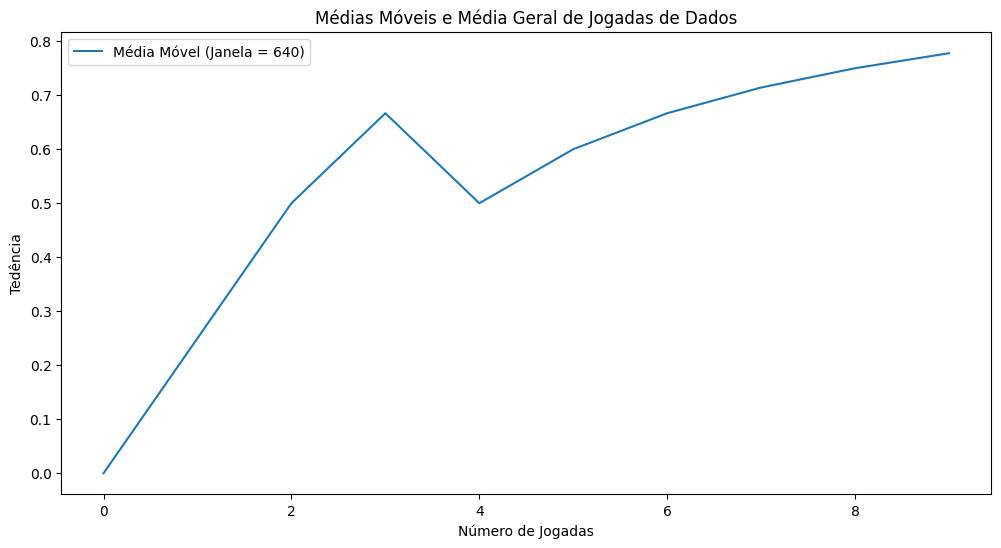

Quantidade de Apostas: 9 
Media Apostas: 0.78 
Última entrada: 1
Saida: 647 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.693750      0.689441      0.685185      0.687117      0.689024   
1       0.682353      0.678363      0.674419      0.676301      0.678161   
2       0.677778      0.679558      0.681319      0.683060      0.679348   
3       0.689474      0.691099      0.692708      0.694301      0.695876   
4       0.700000      0.701493      0.698020      0.694581      0.691176   
5       0.690476      0.691943      0.693396      0.690141      0.691589   
6       0.690909      0.692308      0.693694      0.695067      0.696429   
7       0.700000      0.701299      0.698276      0.699571      0.700855   
8       0.700000      0.697095      0.698347      0.699588      0.696721   
9       0.696000      0.697211      0.694444      0.691700      0.692913   
10      0.700000      0.697318      0.698473      0.695817      0.696

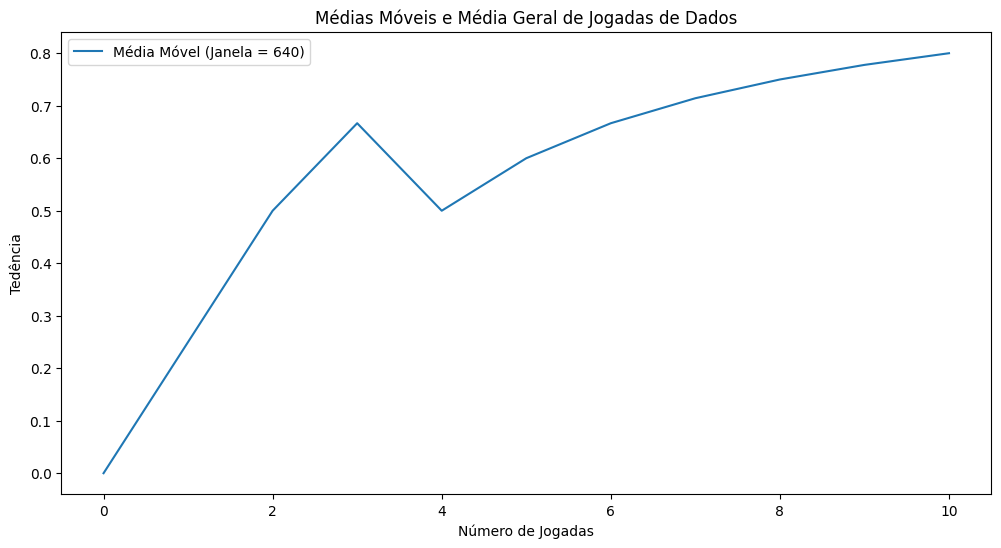

Quantidade de Apostas: 10 
Media Apostas: 0.80 
Última entrada: 1
Saida: 648 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.700000      0.695652      0.691358      0.687117      0.689024   
1       0.688235      0.684211      0.680233      0.676301      0.678161   
2       0.683333      0.679558      0.681319      0.683060      0.684783   
3       0.689474      0.691099      0.692708      0.694301      0.695876   
4       0.705000      0.701493      0.702970      0.699507      0.696078   
5       0.690476      0.691943      0.693396      0.694836      0.691589   
6       0.695455      0.692308      0.693694      0.695067      0.696429   
7       0.700000      0.701299      0.702586      0.699571      0.700855   
8       0.700000      0.701245      0.698347      0.699588      0.700820   
9       0.696000      0.697211      0.698413      0.695652      0.692913   
10      0.700000      0.701149      0.698473      0.699620      0.69

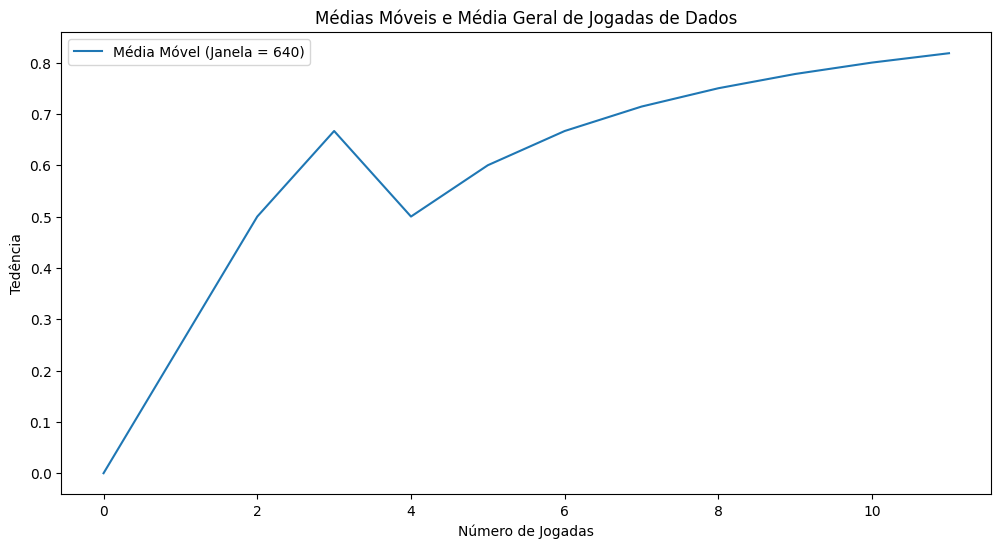

Quantidade de Apostas: 11 
Media Apostas: 0.82 
Última entrada: 1
Saida: 649 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.693750      0.695652      0.691358      0.687117      0.682927   
1       0.688235      0.684211      0.680233      0.676301      0.672414   
2       0.677778      0.679558      0.675824      0.677596      0.679348   
3       0.684211      0.685864      0.687500      0.689119      0.690722   
4       0.700000      0.701493      0.698020      0.699507      0.696078   
5       0.690476      0.687204      0.688679      0.690141      0.691589   
6       0.690909      0.692308      0.689189      0.690583      0.691964   
7       0.695652      0.696970      0.698276      0.699571      0.696581   
8       0.695833      0.697095      0.698347      0.695473      0.696721   
9       0.692000      0.693227      0.694444      0.695652      0.692913   
10      0.696154      0.697318      0.698473      0.695817      0.69

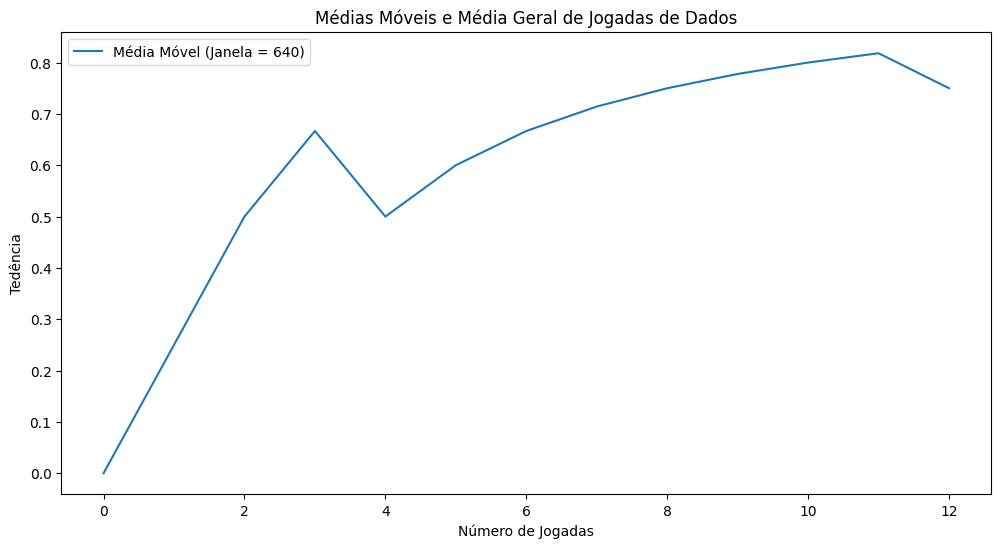

Quantidade de Apostas: 12 
Media Apostas: 0.75 
Última entrada: 0
Saida: 650 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.693750      0.695652      0.697531      0.693252      0.689024   
1       0.688235      0.690058      0.686047      0.682081      0.678161   
2       0.677778      0.679558      0.681319      0.677596      0.679348   
3       0.684211      0.685864      0.687500      0.689119      0.690722   
4       0.700000      0.701493      0.702970      0.699507      0.700980   
5       0.690476      0.691943      0.688679      0.690141      0.691589   
6       0.690909      0.692308      0.693694      0.690583      0.691964   
7       0.700000      0.696970      0.698276      0.699571      0.700855   
8       0.700000      0.697095      0.698347      0.699588      0.696721   
9       0.692000      0.693227      0.694444      0.695652      0.696850   
10      0.696154      0.697318      0.698473      0.699620      0.69

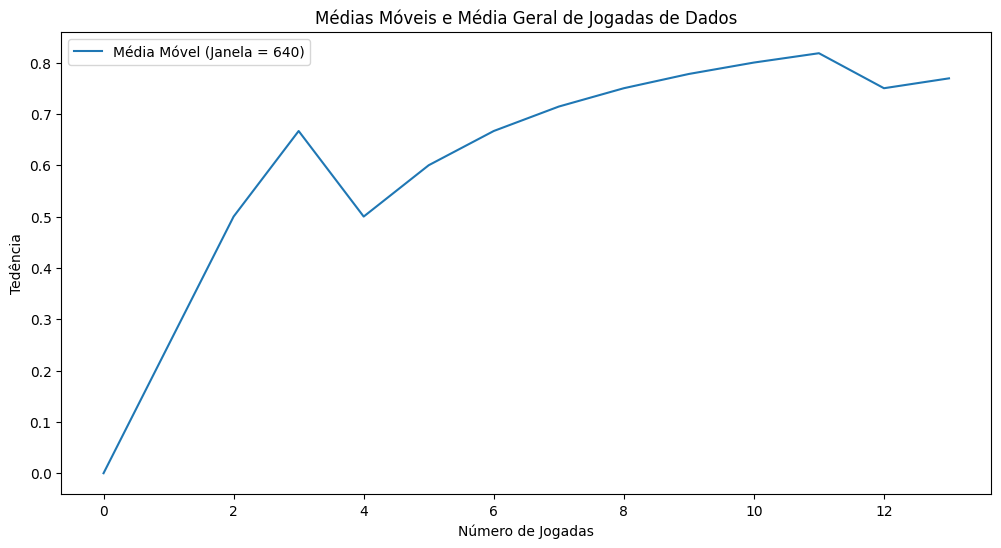

Quantidade de Apostas: 13 
Media Apostas: 0.77 
Última entrada: 1
Saida: 651 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.693750      0.695652      0.697531      0.699387      0.695122   
1       0.688235      0.690058      0.691860      0.687861      0.683908   
2       0.683333      0.679558      0.681319      0.683060      0.679348   
3       0.684211      0.685864      0.687500      0.689119      0.690722   
4       0.700000      0.701493      0.702970      0.704433      0.700980   
5       0.695238      0.691943      0.693396      0.690141      0.691589   
6       0.695455      0.692308      0.693694      0.695067      0.691964   
7       0.700000      0.701299      0.698276      0.699571      0.700855   
8       0.704167      0.701245      0.698347      0.699588      0.700820   
9       0.696000      0.693227      0.694444      0.695652      0.696850   
10      0.696154      0.697318      0.698473      0.699620      0.70

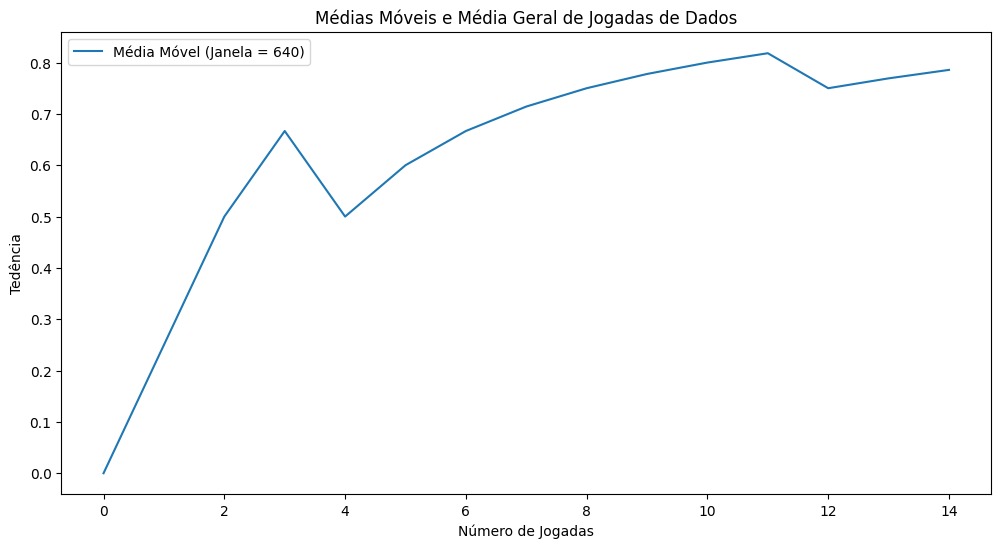

Quantidade de Apostas: 14 
Media Apostas: 0.79 
Última entrada: 1
Saida: 652 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.691358      0.693252      0.695122   
1       0.688235      0.684211      0.686047      0.687861      0.683908   
2       0.677778      0.679558      0.675824      0.677596      0.679348   
3       0.678947      0.680628      0.682292      0.683938      0.685567   
4       0.695000      0.696517      0.698020      0.699507      0.700980   
5       0.690476      0.691943      0.688679      0.690141      0.686916   
6       0.690909      0.692308      0.689189      0.690583      0.691964   
7       0.695652      0.696970      0.698276      0.695279      0.696581   
8       0.700000      0.701245      0.698347      0.695473      0.696721   
9       0.696000      0.693227      0.690476      0.691700      0.692913   
10      0.692308      0.693487      0.694656      0.695817      0.69

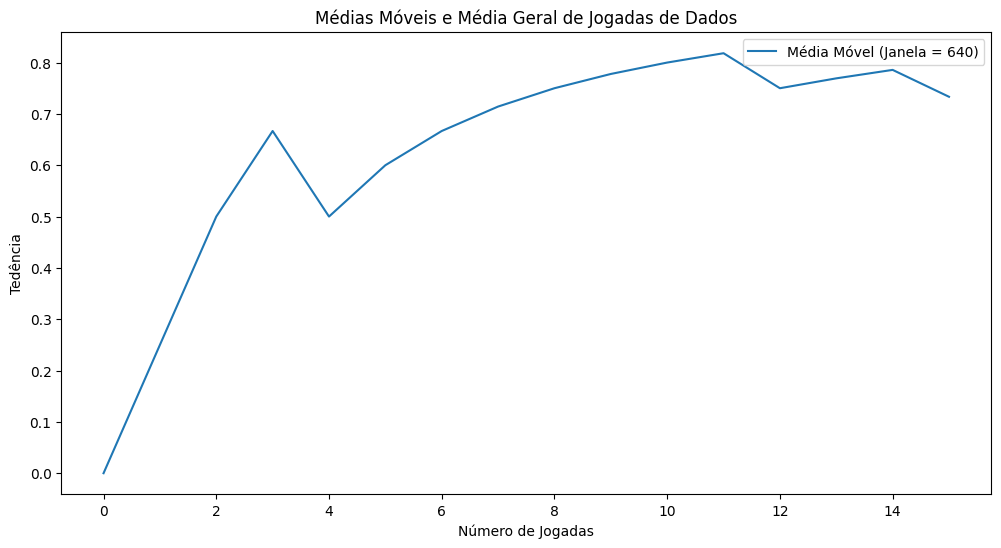

Quantidade de Apostas: 15 
Media Apostas: 0.73 
Última entrada: 0
Saida: 653 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.691358      0.693252      0.695122   
1       0.688235      0.690058      0.686047      0.687861      0.689655   
2       0.677778      0.679558      0.681319      0.677596      0.679348   
3       0.678947      0.680628      0.682292      0.683938      0.685567   
4       0.695000      0.696517      0.698020      0.699507      0.700980   
5       0.690476      0.691943      0.693396      0.690141      0.691589   
6       0.690909      0.692308      0.693694      0.690583      0.691964   
7       0.695652      0.696970      0.698276      0.699571      0.696581   
8       0.700000      0.701245      0.702479      0.699588      0.696721   
9       0.696000      0.697211      0.694444      0.691700      0.692913   
10      0.692308      0.693487      0.694656      0.695817      0.69

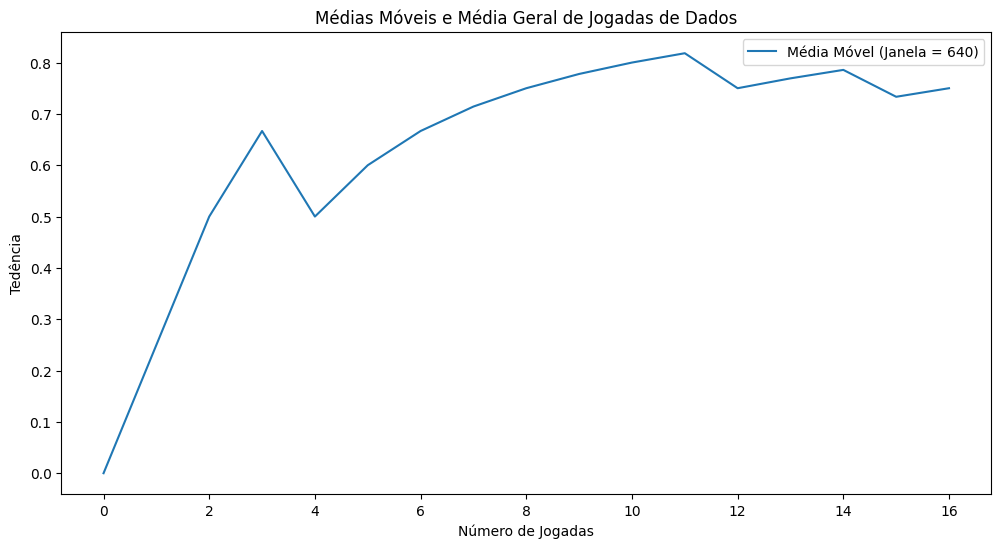

Quantidade de Apostas: 16 
Media Apostas: 0.75 
Última entrada: 1
Saida: 654 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.691358      0.693252      0.695122   
1       0.688235      0.690058      0.691860      0.687861      0.689655   
2       0.677778      0.679558      0.681319      0.683060      0.679348   
3       0.684211      0.680628      0.682292      0.683938      0.685567   
4       0.695000      0.696517      0.698020      0.699507      0.700980   
5       0.695238      0.691943      0.693396      0.694836      0.691589   
6       0.690909      0.692308      0.693694      0.695067      0.691964   
7       0.695652      0.696970      0.698276      0.699571      0.700855   
8       0.700000      0.701245      0.702479      0.703704      0.700820   
9       0.700000      0.697211      0.698413      0.695652      0.692913   
10      0.692308      0.693487      0.694656      0.695817      0.69

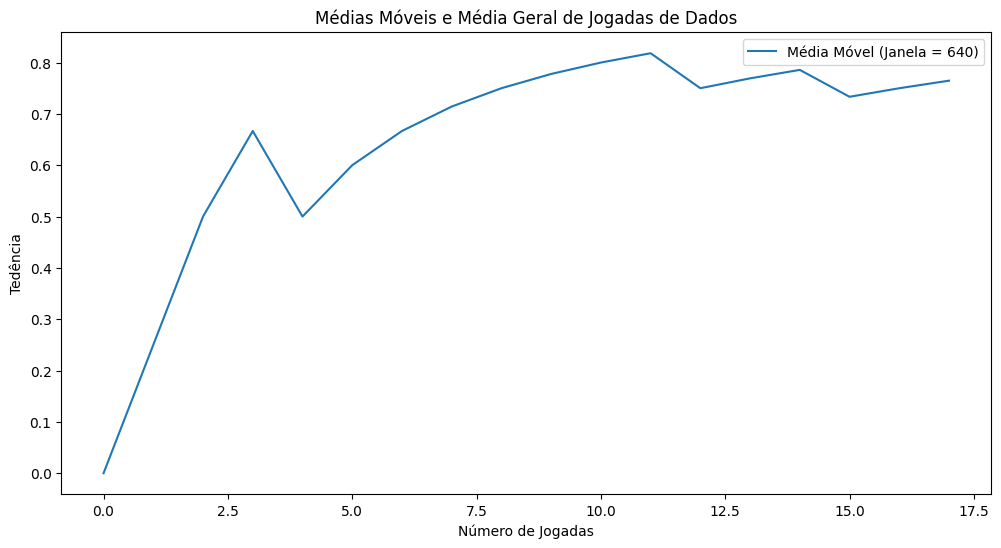

Quantidade de Apostas: 17 
Media Apostas: 0.76 
Última entrada: 1
Saida: 655 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.691358      0.693252      0.695122   
1       0.688235      0.690058      0.691860      0.693642      0.689655   
2       0.677778      0.679558      0.681319      0.683060      0.684783   
3       0.684211      0.685864      0.682292      0.683938      0.685567   
4       0.695000      0.696517      0.698020      0.699507      0.700980   
5       0.700000      0.696682      0.693396      0.694836      0.696262   
6       0.695455      0.692308      0.693694      0.695067      0.696429   
7       0.695652      0.696970      0.698276      0.699571      0.700855   
8       0.700000      0.701245      0.702479      0.703704      0.704918   
9       0.700000      0.701195      0.698413      0.699605      0.696850   
10      0.696154      0.693487      0.694656      0.695817      0.69

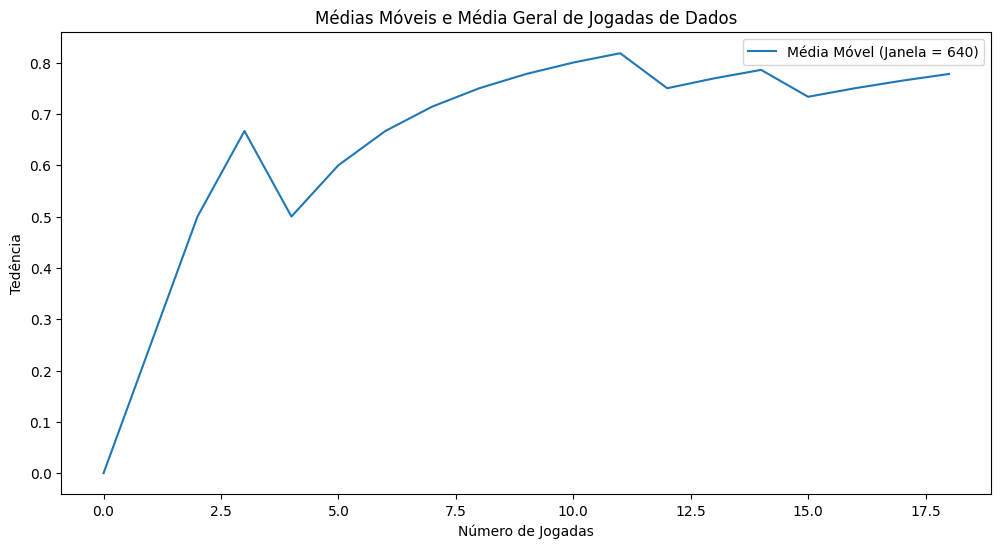

Quantidade de Apostas: 18 
Media Apostas: 0.78 
Última entrada: 1
Saida: 656 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.693750      0.689441      0.691358      0.693252      0.695122   
1       0.694118      0.690058      0.691860      0.693642      0.695402   
2       0.683333      0.679558      0.681319      0.683060      0.684783   
3       0.684211      0.685864      0.687500      0.683938      0.685567   
4       0.695000      0.696517      0.698020      0.699507      0.700980   
5       0.704762      0.701422      0.698113      0.694836      0.696262   
6       0.695455      0.696833      0.693694      0.695067      0.696429   
7       0.695652      0.696970      0.698276      0.699571      0.700855   
8       0.704167      0.701245      0.702479      0.703704      0.704918   
9       0.700000      0.701195      0.702381      0.699605      0.700787   
10      0.700000      0.697318      0.694656      0.695817      0.69

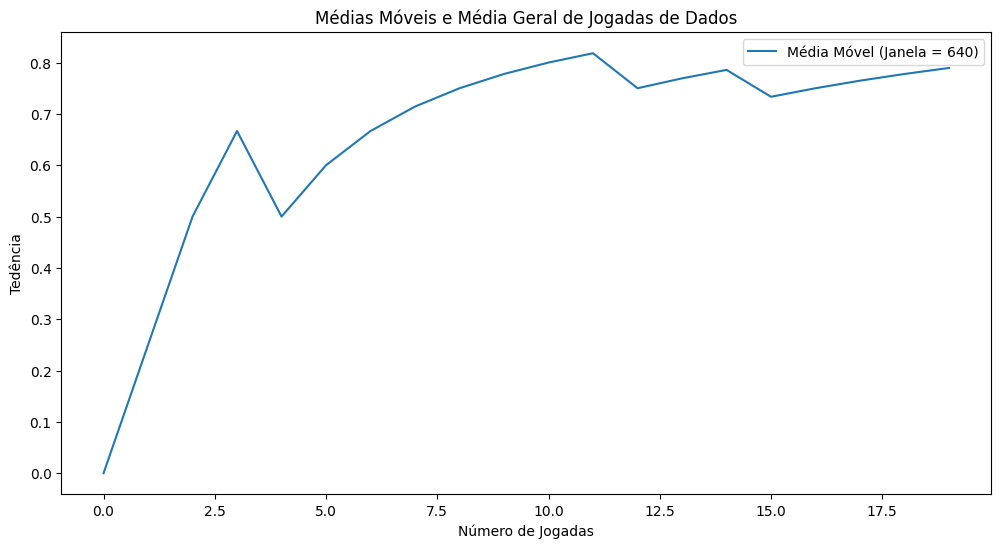

Quantidade de Apostas: 19 
Media Apostas: 0.79 
Última entrada: 1
Saida: 657 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.700000      0.695652      0.691358      0.693252      0.695122   
1       0.700000      0.695906      0.691860      0.693642      0.695402   
2       0.688889      0.685083      0.681319      0.683060      0.684783   
3       0.684211      0.685864      0.687500      0.689119      0.685567   
4       0.695000      0.696517      0.698020      0.699507      0.700980   
5       0.704762      0.706161      0.702830      0.699531      0.696262   
6       0.695455      0.696833      0.698198      0.695067      0.696429   
7       0.695652      0.696970      0.698276      0.699571      0.700855   
8       0.704167      0.705394      0.702479      0.703704      0.704918   
9       0.704000      0.701195      0.702381      0.703557      0.700787   
10      0.700000      0.701149      0.698473      0.695817      0.69

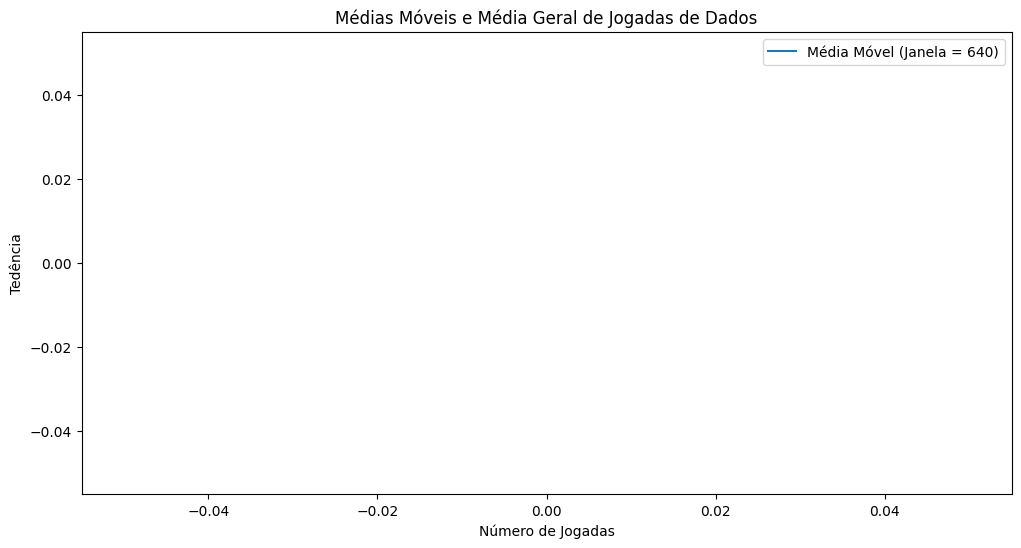

Quantidade de Apostas: 1 
Media Apostas: 0.80 
Última entrada: 1
Saida: 658 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.700000      0.701863      0.697531      0.693252      0.695122   
1       0.705882      0.701754      0.697674      0.693642      0.695402   
2       0.694444      0.690608      0.686813      0.683060      0.684783   
3       0.689474      0.685864      0.687500      0.689119      0.690722   
4       0.695000      0.696517      0.698020      0.699507      0.700980   
5       0.709524      0.706161      0.707547      0.704225      0.700935   
6       0.695455      0.696833      0.698198      0.699552      0.696429   
7       0.700000      0.696970      0.698276      0.699571      0.700855   
8       0.704167      0.705394      0.706612      0.703704      0.704918   
9       0.704000      0.705179      0.702381      0.703557      0.704724   
10      0.700000      0.701149      0.702290      0.699620      0.696

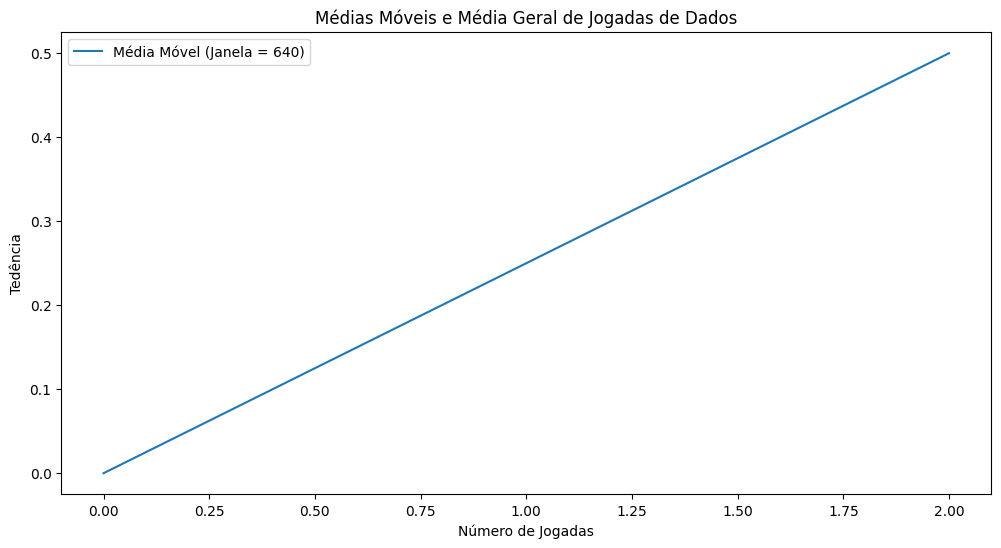

Quantidade de Apostas: 2 
Media Apostas: 0.50 
Última entrada: 1
Saida: 679 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.693750      0.689441      0.691358      0.693252      0.695122   
1       0.682353      0.678363      0.680233      0.676301      0.678161   
2       0.677778      0.679558      0.681319      0.677596      0.673913   
3       0.684211      0.685864      0.682292      0.678756      0.675258   
4       0.680000      0.676617      0.673267      0.669951      0.666667   
5       0.671429      0.672986      0.669811      0.671362      0.672897   
6       0.677273      0.678733      0.680180      0.681614      0.683036   
7       0.691304      0.692641      0.689655      0.690987      0.688034   
8       0.683333      0.680498      0.681818      0.683128      0.684426   
9       0.684000      0.685259      0.682540      0.683794      0.685039   
10      0.688462      0.689655      0.690840      0.692015      0.689

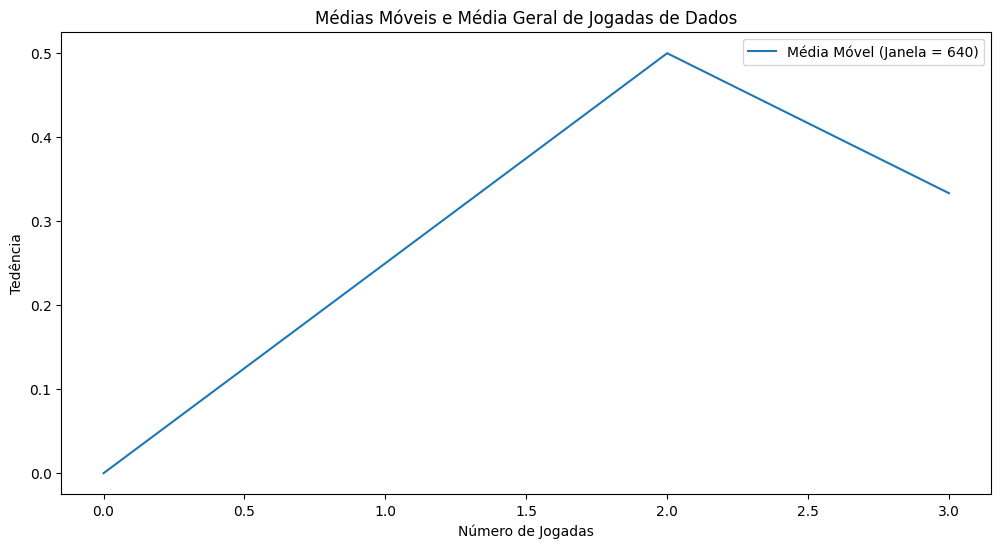

Quantidade de Apostas: 3 
Media Apostas: 0.33 
Última entrada: 0
Saida: 680 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.685185      0.687117      0.689024   
1       0.682353      0.678363      0.674419      0.676301      0.672414   
2       0.672222      0.674033      0.675824      0.677596      0.673913   
3       0.678947      0.680628      0.682292      0.678756      0.675258   
4       0.675000      0.676617      0.673267      0.669951      0.666667   
5       0.666667      0.668246      0.669811      0.666667      0.668224   
6       0.672727      0.674208      0.675676      0.677130      0.678571   
7       0.686957      0.688312      0.689655      0.686695      0.688034   
8       0.679167      0.680498      0.677686      0.679012      0.680328   
9       0.680000      0.681275      0.682540      0.679842      0.681102   
10      0.688462      0.685824      0.687023      0.688213      0.689

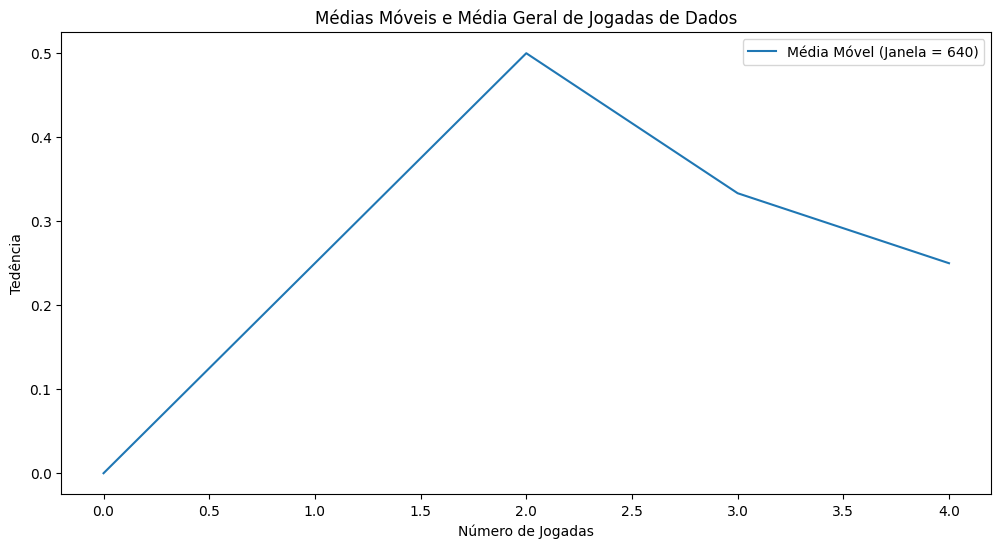

Quantidade de Apostas: 4 
Media Apostas: 0.25 
Última entrada: 0
Saida: 681 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.680982      0.682927   
1       0.676471      0.678363      0.674419      0.670520      0.672414   
2       0.672222      0.668508      0.670330      0.672131      0.673913   
3       0.673684      0.675393      0.677083      0.678756      0.675258   
4       0.670000      0.671642      0.673267      0.669951      0.666667   
5       0.666667      0.663507      0.665094      0.666667      0.663551   
6       0.668182      0.669683      0.671171      0.672646      0.674107   
7       0.682609      0.683983      0.685345      0.686695      0.683761   
8       0.679167      0.676349      0.677686      0.674897      0.676230   
9       0.680000      0.677291      0.678571      0.679842      0.677165   
10      0.684615      0.685824      0.683206      0.684411      0.685

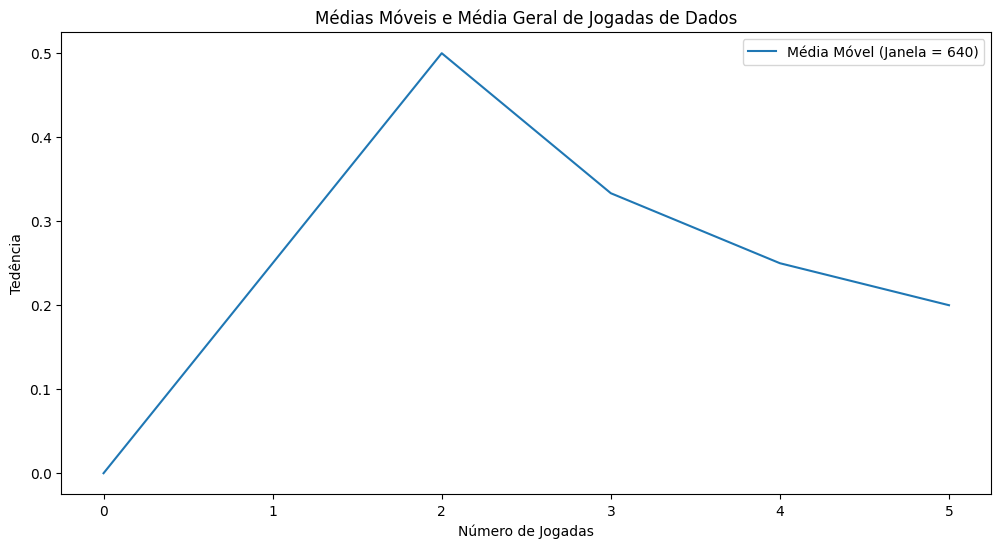

Quantidade de Apostas: 5 
Media Apostas: 0.20 
Última entrada: 0
Saida: 682 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.682927   
1       0.682353      0.678363      0.680233      0.676301      0.672414   
2       0.672222      0.674033      0.670330      0.672131      0.673913   
3       0.673684      0.675393      0.677083      0.678756      0.680412   
4       0.675000      0.671642      0.673267      0.674877      0.671569   
5       0.666667      0.668246      0.665094      0.666667      0.668224   
6       0.668182      0.669683      0.671171      0.672646      0.674107   
7       0.682609      0.683983      0.685345      0.686695      0.688034   
8       0.679167      0.680498      0.677686      0.679012      0.676230   
9       0.680000      0.681275      0.678571      0.679842      0.681102   
10      0.684615      0.685824      0.687023      0.684411      0.685

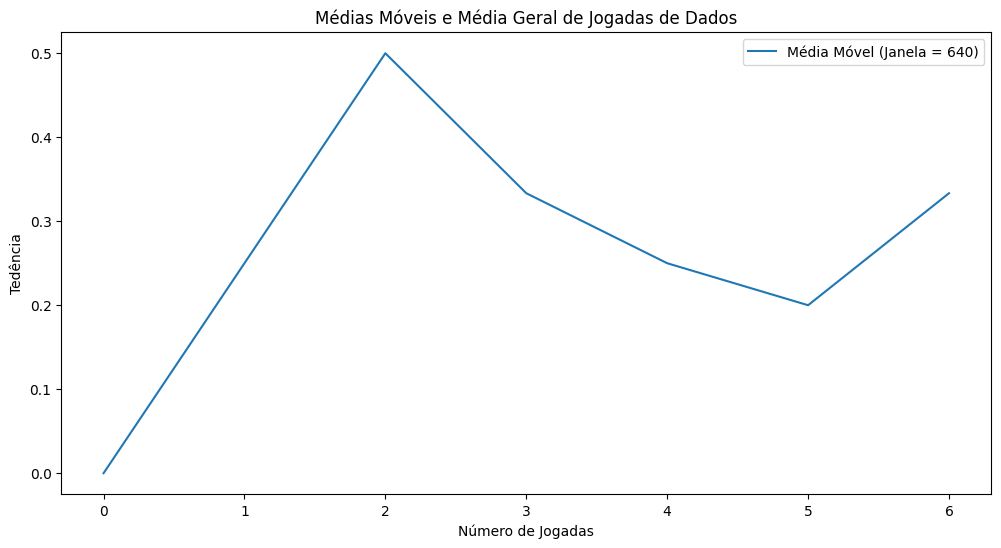

Quantidade de Apostas: 6 
Media Apostas: 0.33 
Última entrada: 1
Saida: 683 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.689024   
1       0.688235      0.684211      0.680233      0.682081      0.678161   
2       0.672222      0.674033      0.675824      0.672131      0.673913   
3       0.673684      0.675393      0.677083      0.678756      0.680412   
4       0.675000      0.676617      0.673267      0.674877      0.676471   
5       0.666667      0.668246      0.669811      0.666667      0.668224   
6       0.668182      0.669683      0.671171      0.672646      0.674107   
7       0.682609      0.683983      0.685345      0.686695      0.688034   
8       0.679167      0.680498      0.681818      0.679012      0.680328   
9       0.680000      0.681275      0.682540      0.679842      0.681102   
10      0.684615      0.685824      0.687023      0.688213      0.685

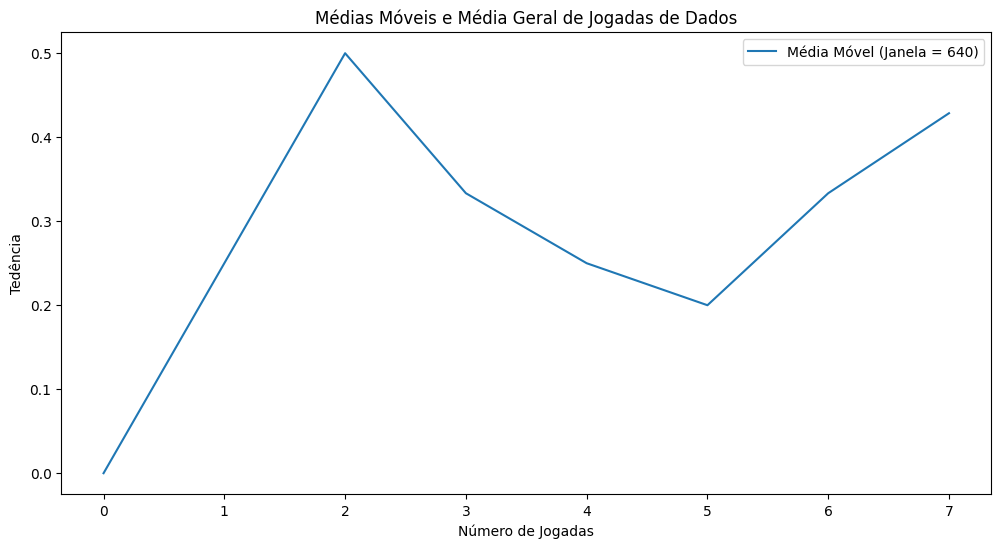

Quantidade de Apostas: 7 
Media Apostas: 0.43 
Última entrada: 1
Saida: 684 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.683230      0.685185      0.687117      0.689024   
1       0.688235      0.690058      0.686047      0.682081      0.683908   
2       0.672222      0.674033      0.675824      0.677596      0.673913   
3       0.673684      0.675393      0.677083      0.678756      0.680412   
4       0.675000      0.676617      0.678218      0.674877      0.676471   
5       0.666667      0.668246      0.669811      0.671362      0.668224   
6       0.672727      0.669683      0.671171      0.672646      0.674107   
7       0.682609      0.683983      0.685345      0.686695      0.688034   
8       0.683333      0.680498      0.681818      0.683128      0.680328   
9       0.680000      0.681275      0.682540      0.683794      0.681102   
10      0.684615      0.685824      0.687023      0.688213      0.689

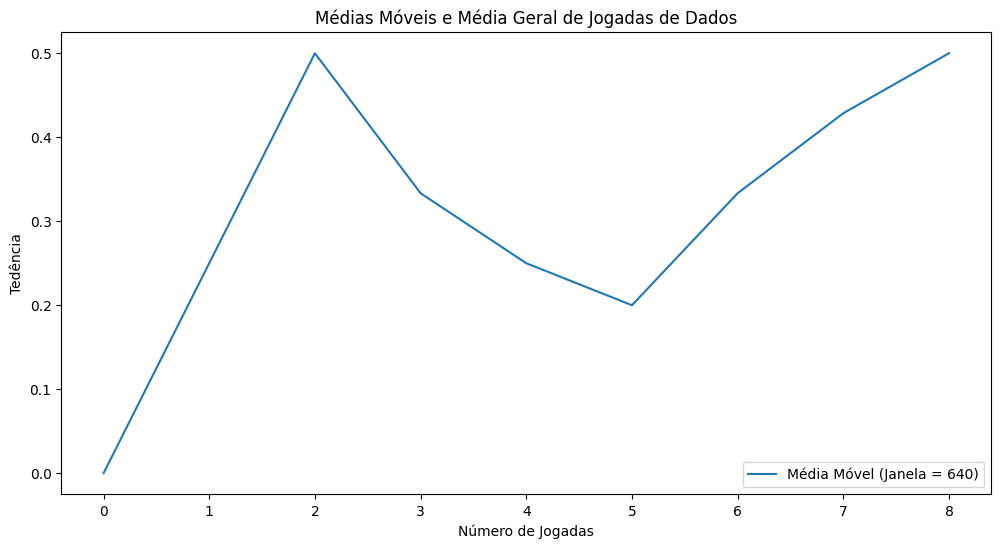

Quantidade de Apostas: 8 
Media Apostas: 0.50 
Última entrada: 1
Saida: 685 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.685185      0.687117      0.689024   
1       0.694118      0.690058      0.691860      0.687861      0.683908   
2       0.677778      0.674033      0.675824      0.677596      0.679348   
3       0.673684      0.675393      0.677083      0.678756      0.680412   
4       0.675000      0.676617      0.678218      0.679803      0.676471   
5       0.666667      0.668246      0.669811      0.671362      0.672897   
6       0.672727      0.674208      0.671171      0.672646      0.674107   
7       0.682609      0.683983      0.685345      0.686695      0.688034   
8       0.687500      0.684647      0.681818      0.683128      0.684426   
9       0.684000      0.681275      0.682540      0.683794      0.685039   
10      0.684615      0.685824      0.687023      0.688213      0.689

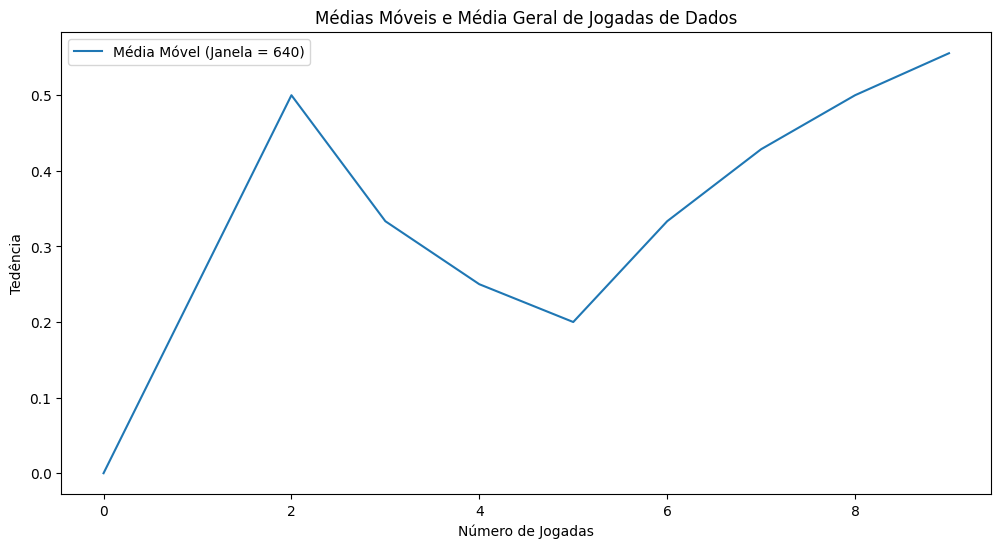

Quantidade de Apostas: 9 
Media Apostas: 0.56 
Última entrada: 1
Saida: 686 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.680982      0.682927   
1       0.688235      0.690058      0.686047      0.687861      0.683908   
2       0.672222      0.674033      0.670330      0.672131      0.673913   
3       0.673684      0.670157      0.671875      0.673575      0.675258   
4       0.675000      0.671642      0.673267      0.674877      0.676471   
5       0.666667      0.663507      0.665094      0.666667      0.668224   
6       0.668182      0.669683      0.671171      0.668161      0.669643   
7       0.678261      0.679654      0.681034      0.682403      0.683761   
8       0.687500      0.684647      0.681818      0.679012      0.680328   
9       0.680000      0.681275      0.678571      0.679842      0.681102   
10      0.680769      0.681992      0.683206      0.684411      0.685

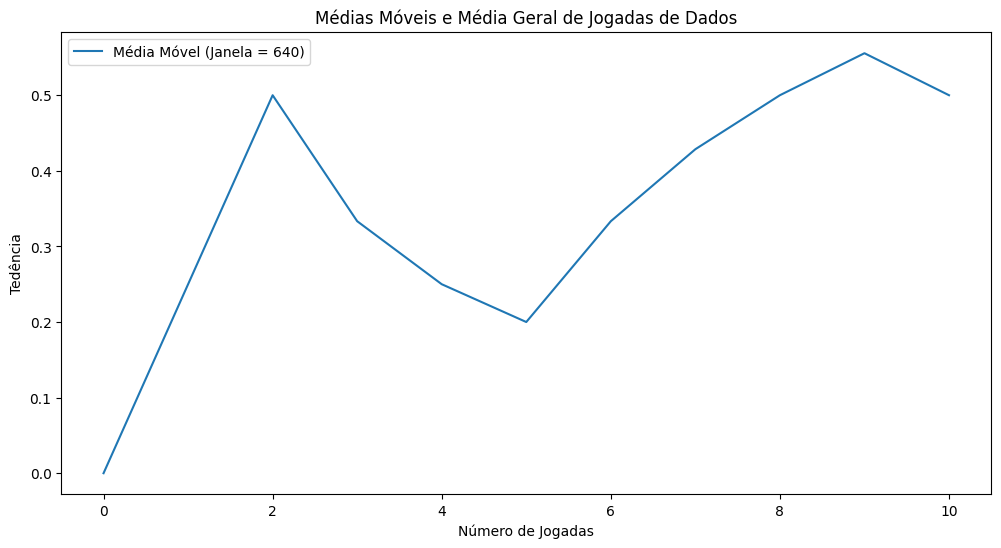

Quantidade de Apostas: 10 
Media Apostas: 0.50 
Última entrada: 0
Saida: 687 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.683230      0.685185      0.687117      0.682927   
1       0.688235      0.690058      0.691860      0.687861      0.689655   
2       0.677778      0.674033      0.675824      0.672131      0.673913   
3       0.678947      0.675393      0.671875      0.673575      0.675258   
4       0.680000      0.676617      0.673267      0.674877      0.676471   
5       0.671429      0.668246      0.665094      0.666667      0.668224   
6       0.668182      0.669683      0.671171      0.672646      0.669643   
7       0.678261      0.679654      0.681034      0.682403      0.683761   
8       0.687500      0.688797      0.685950      0.683128      0.680328   
9       0.680000      0.681275      0.682540      0.679842      0.681102   
10      0.680769      0.681992      0.683206      0.684411      0.68

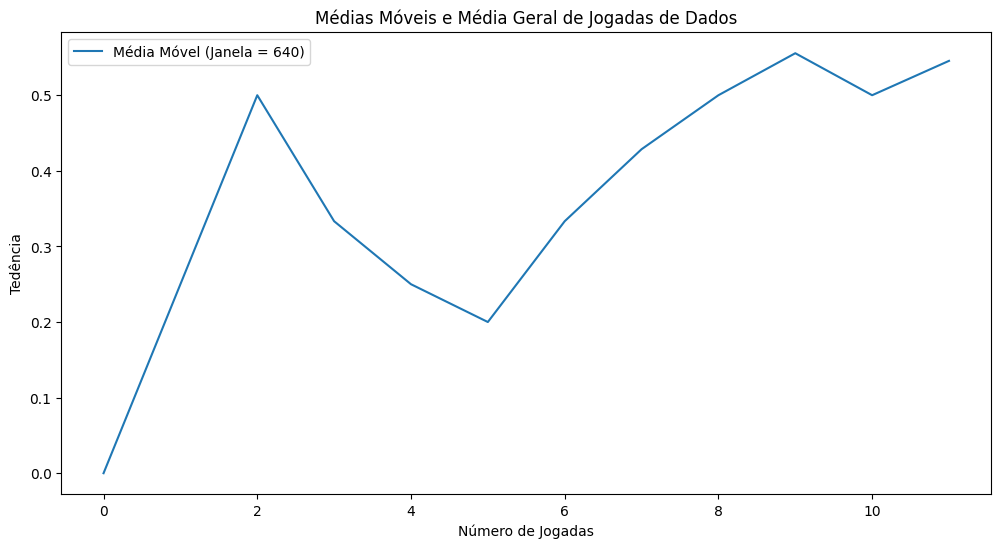

Quantidade de Apostas: 11 
Media Apostas: 0.55 
Última entrada: 1
Saida: 688 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.693750      0.689441      0.685185      0.687117      0.689024   
1       0.688235      0.690058      0.691860      0.693642      0.689655   
2       0.677778      0.679558      0.675824      0.677596      0.673913   
3       0.678947      0.680628      0.677083      0.673575      0.675258   
4       0.685000      0.681592      0.678218      0.674877      0.676471   
5       0.676190      0.672986      0.669811      0.666667      0.668224   
6       0.672727      0.669683      0.671171      0.672646      0.674107   
7       0.678261      0.679654      0.681034      0.682403      0.683761   
8       0.691667      0.688797      0.690083      0.687243      0.684426   
9       0.680000      0.681275      0.682540      0.683794      0.681102   
10      0.684615      0.681992      0.683206      0.684411      0.68

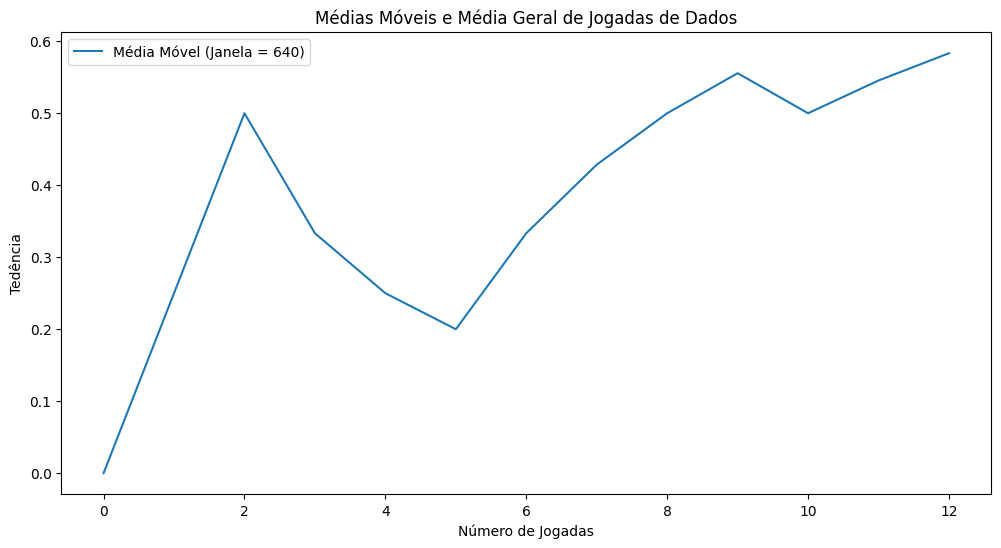

Quantidade de Apostas: 12 
Media Apostas: 0.58 
Última entrada: 1
Saida: 689 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.685185      0.680982      0.682927   
1       0.688235      0.684211      0.686047      0.687861      0.689655   
2       0.677778      0.674033      0.675824      0.672131      0.673913   
3       0.673684      0.675393      0.677083      0.673575      0.670103   
4       0.680000      0.681592      0.678218      0.674877      0.671569   
5       0.676190      0.672986      0.669811      0.666667      0.663551   
6       0.668182      0.669683      0.666667      0.668161      0.669643   
7       0.673913      0.675325      0.676724      0.678112      0.679487   
8       0.687500      0.688797      0.685950      0.687243      0.684426   
9       0.680000      0.677291      0.678571      0.679842      0.681102   
10      0.680769      0.681992      0.679389      0.680608      0.68

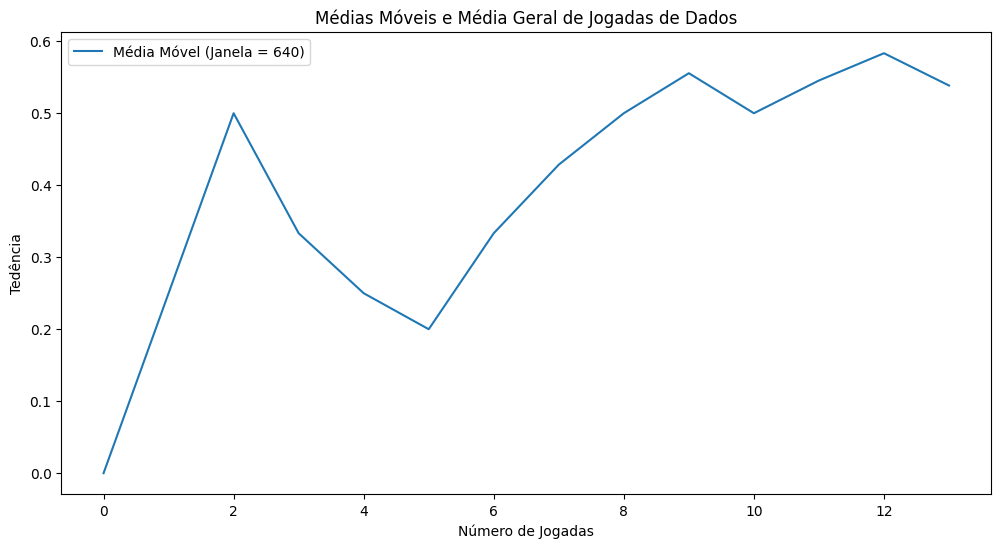

Quantidade de Apostas: 13 
Media Apostas: 0.54 
Última entrada: 0
Saida: 690 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.691358      0.687117      0.682927   
1       0.688235      0.690058      0.686047      0.687861      0.689655   
2       0.683333      0.679558      0.675824      0.677596      0.673913   
3       0.673684      0.675393      0.677083      0.678756      0.675258   
4       0.680000      0.681592      0.683168      0.679803      0.676471   
5       0.676190      0.677725      0.674528      0.671362      0.668224   
6       0.668182      0.669683      0.671171      0.668161      0.669643   
7       0.673913      0.675325      0.676724      0.678112      0.679487   
8       0.687500      0.688797      0.690083      0.687243      0.688525   
9       0.680000      0.681275      0.678571      0.679842      0.681102   
10      0.680769      0.681992      0.683206      0.680608      0.68

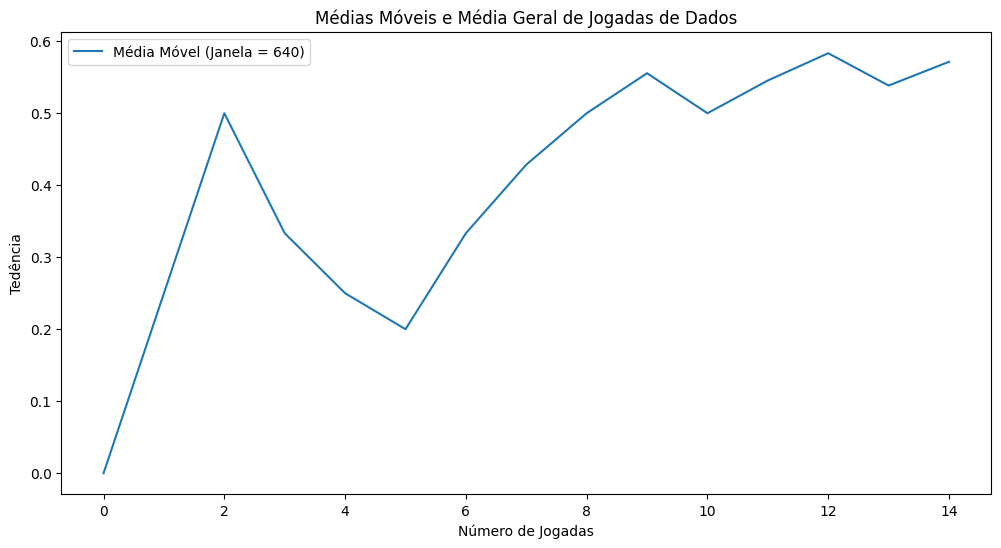

Quantidade de Apostas: 14 
Media Apostas: 0.57 
Última entrada: 1
Saida: 691 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.691358      0.693252      0.689024   
1       0.688235      0.690058      0.691860      0.687861      0.689655   
2       0.683333      0.685083      0.681319      0.677596      0.679348   
3       0.678947      0.675393      0.677083      0.678756      0.680412   
4       0.680000      0.681592      0.683168      0.684729      0.681373   
5       0.676190      0.677725      0.679245      0.676056      0.672897   
6       0.672727      0.669683      0.671171      0.672646      0.669643   
7       0.673913      0.675325      0.676724      0.678112      0.679487   
8       0.687500      0.688797      0.690083      0.691358      0.688525   
9       0.684000      0.681275      0.682540      0.679842      0.681102   
10      0.684615      0.681992      0.683206      0.684411      0.68

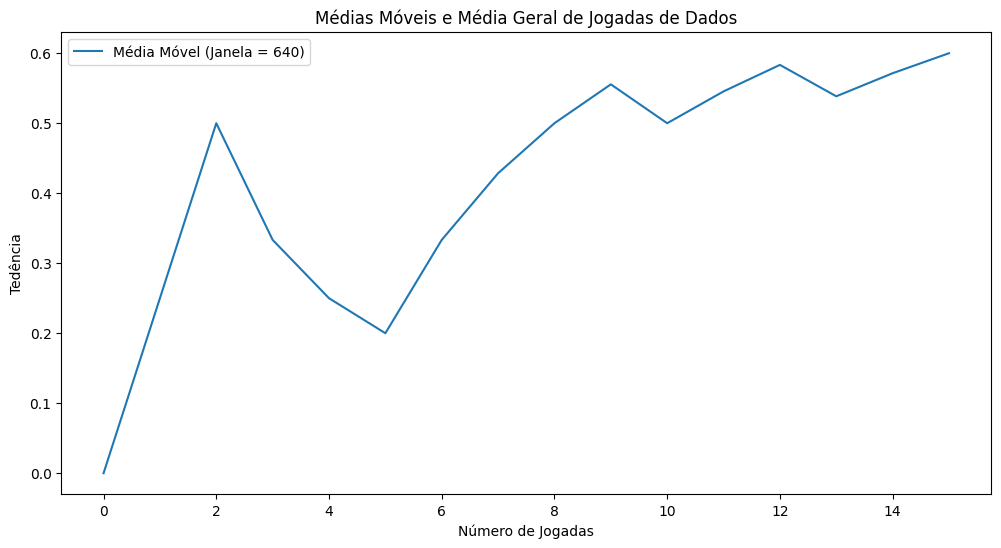

Quantidade de Apostas: 15 
Media Apostas: 0.60 
Última entrada: 1
Saida: 692 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.689024   
1       0.682353      0.684211      0.686047      0.687861      0.683908   
2       0.683333      0.679558      0.681319      0.677596      0.673913   
3       0.673684      0.675393      0.671875      0.673575      0.675258   
4       0.675000      0.676617      0.678218      0.679803      0.681373   
5       0.676190      0.672986      0.674528      0.676056      0.672897   
6       0.668182      0.669683      0.666667      0.668161      0.669643   
7       0.669565      0.670996      0.672414      0.673820      0.675214   
8       0.683333      0.684647      0.685950      0.687243      0.688525   
9       0.680000      0.681275      0.678571      0.679842      0.677165   
10      0.680769      0.681992      0.679389      0.680608      0.68

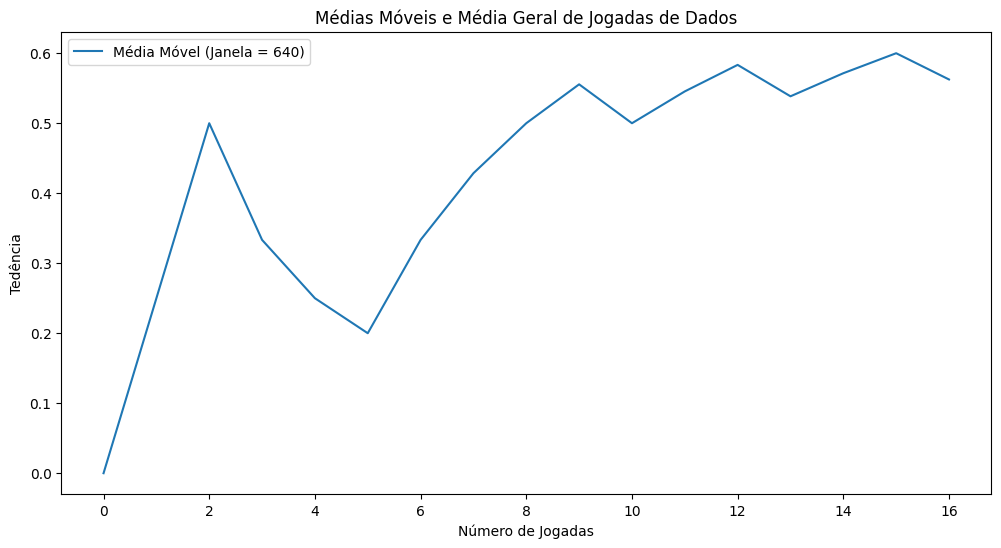

Quantidade de Apostas: 16 
Media Apostas: 0.56 
Última entrada: 0
Saida: 693 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.683230      0.685185      0.687117      0.689024   
1       0.682353      0.684211      0.686047      0.687861      0.689655   
2       0.688889      0.685083      0.681319      0.683060      0.679348   
3       0.673684      0.675393      0.677083      0.673575      0.675258   
4       0.675000      0.676617      0.678218      0.679803      0.681373   
5       0.676190      0.677725      0.674528      0.676056      0.677570   
6       0.668182      0.669683      0.671171      0.668161      0.669643   
7       0.669565      0.670996      0.672414      0.673820      0.675214   
8       0.683333      0.684647      0.685950      0.687243      0.688525   
9       0.680000      0.681275      0.682540      0.679842      0.681102   
10      0.680769      0.681992      0.683206      0.680608      0.68

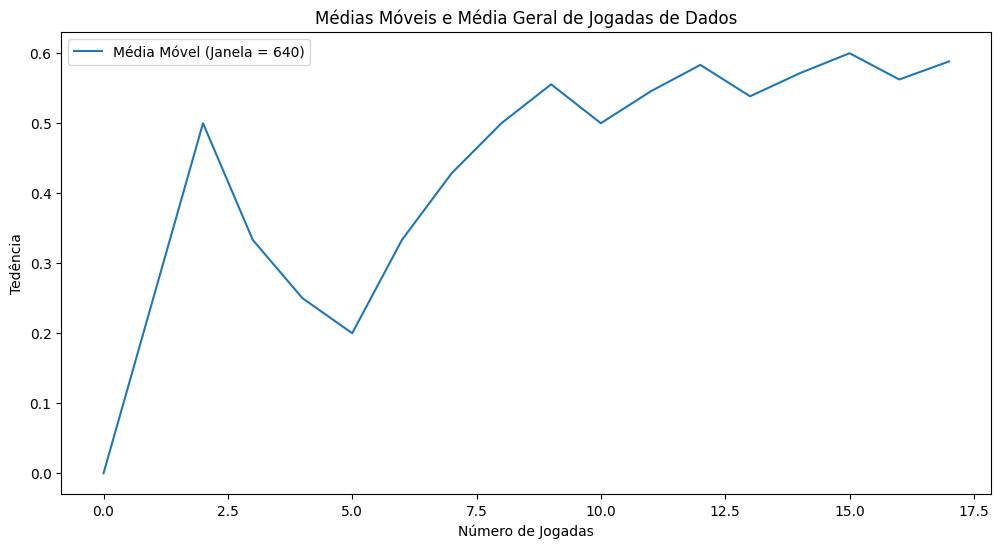

Quantidade de Apostas: 17 
Media Apostas: 0.59 
Última entrada: 1
Saida: 694 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.683230      0.679012      0.680982      0.682927   
1       0.682353      0.678363      0.680233      0.682081      0.683908   
2       0.683333      0.685083      0.681319      0.677596      0.679348   
3       0.668421      0.670157      0.671875      0.673575      0.670103   
4       0.670000      0.671642      0.673267      0.674877      0.676471   
5       0.671429      0.672986      0.674528      0.671362      0.672897   
6       0.663636      0.665158      0.666667      0.668161      0.665179   
7       0.669565      0.666667      0.668103      0.669528      0.670940   
8       0.679167      0.680498      0.681818      0.683128      0.684426   
9       0.680000      0.677291      0.678571      0.679842      0.677165   
10      0.676923      0.678161      0.679389      0.680608      0.67

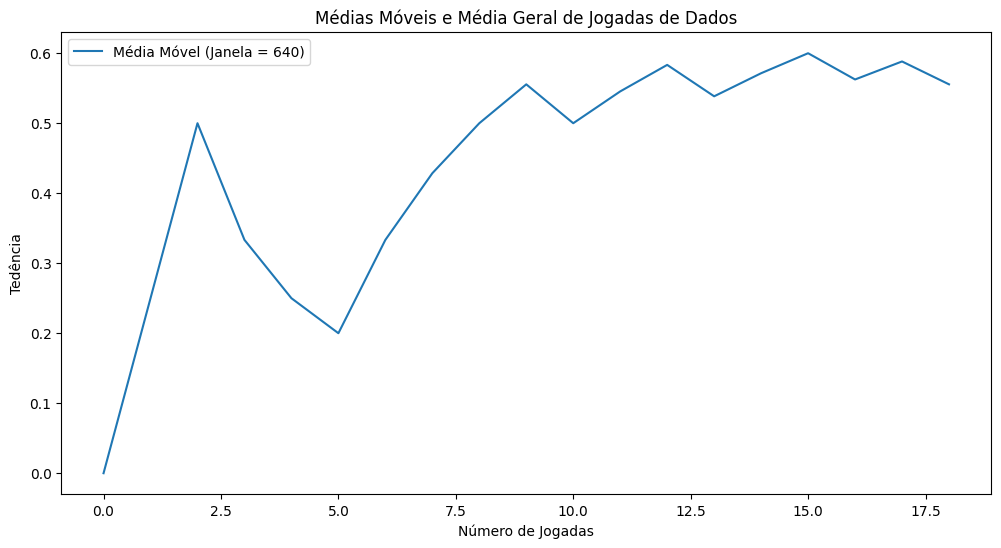

Quantidade de Apostas: 18 
Media Apostas: 0.56 
Última entrada: 0
Saida: 695 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.679012      0.674847      0.676829   
1       0.676471      0.678363      0.674419      0.676301      0.678161   
2       0.683333      0.679558      0.681319      0.677596      0.673913   
3       0.668421      0.664921      0.666667      0.668394      0.670103   
4       0.665000      0.666667      0.668317      0.669951      0.671569   
5       0.666667      0.668246      0.669811      0.671362      0.668224   
6       0.659091      0.660633      0.662162      0.663677      0.665179   
7       0.665217      0.666667      0.663793      0.665236      0.666667   
8       0.675000      0.676349      0.677686      0.679012      0.680328   
9       0.680000      0.677291      0.674603      0.675889      0.677165   
10      0.676923      0.674330      0.675573      0.676806      0.67

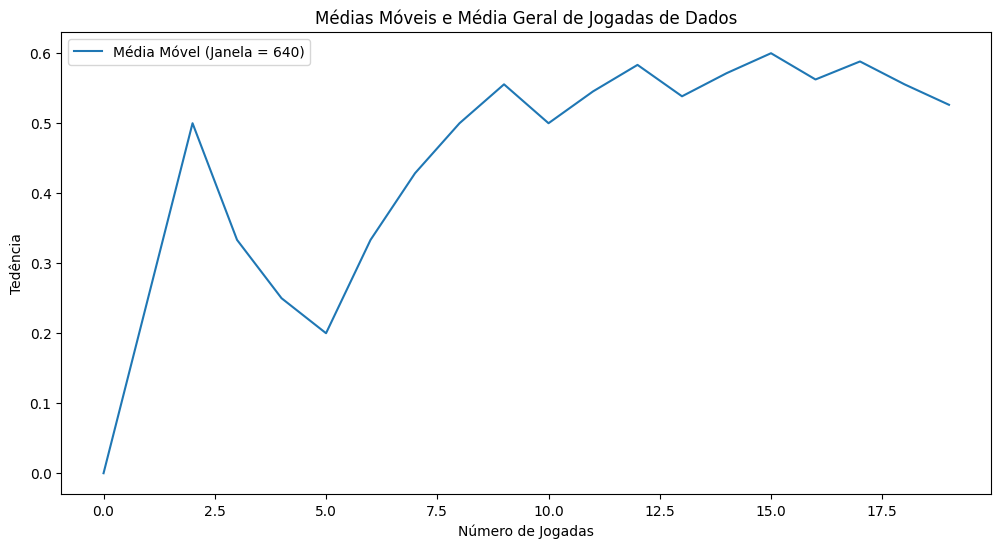

Quantidade de Apostas: 19 
Media Apostas: 0.53 
Última entrada: 0
Saida: 696 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.675000      0.677019      0.679012      0.674847      0.670732   
1       0.670588      0.672515      0.674419      0.670520      0.672414   
2       0.677778      0.679558      0.675824      0.677596      0.673913   
3       0.663158      0.664921      0.661458      0.663212      0.664948   
4       0.665000      0.661692      0.663366      0.665025      0.666667   
5       0.666667      0.663507      0.665094      0.666667      0.668224   
6       0.659091      0.656109      0.657658      0.659193      0.660714   
7       0.660870      0.662338      0.663793      0.660944      0.662393   
8       0.670833      0.672199      0.673554      0.674897      0.676230   
9       0.680000      0.677291      0.674603      0.671937      0.673228   
10      0.673077      0.674330      0.671756      0.673004      0.67

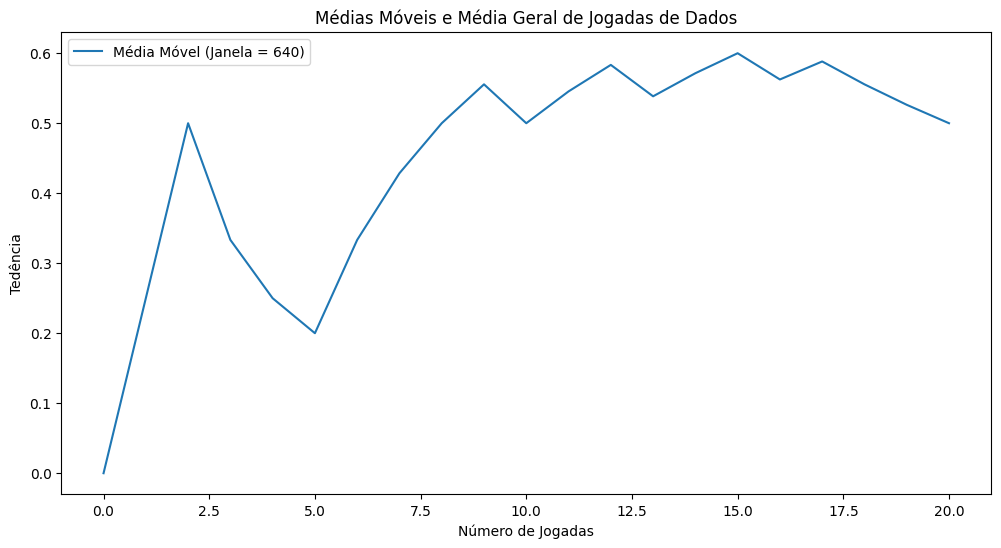

Quantidade de Apostas: 20 
Media Apostas: 0.50 
Última entrada: 0
Saida: 697 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.677019      0.679012      0.680982      0.676829   
1       0.676471      0.672515      0.674419      0.676301      0.672414   
2       0.677778      0.679558      0.681319      0.677596      0.679348   
3       0.668421      0.664921      0.666667      0.663212      0.664948   
4       0.670000      0.666667      0.663366      0.665025      0.666667   
5       0.671429      0.668246      0.665094      0.666667      0.668224   
6       0.663636      0.660633      0.657658      0.659193      0.660714   
7       0.660870      0.662338      0.663793      0.665236      0.662393   
8       0.670833      0.672199      0.673554      0.674897      0.676230   
9       0.680000      0.681275      0.678571      0.675889      0.673228   
10      0.673077      0.674330      0.675573      0.673004      0.67

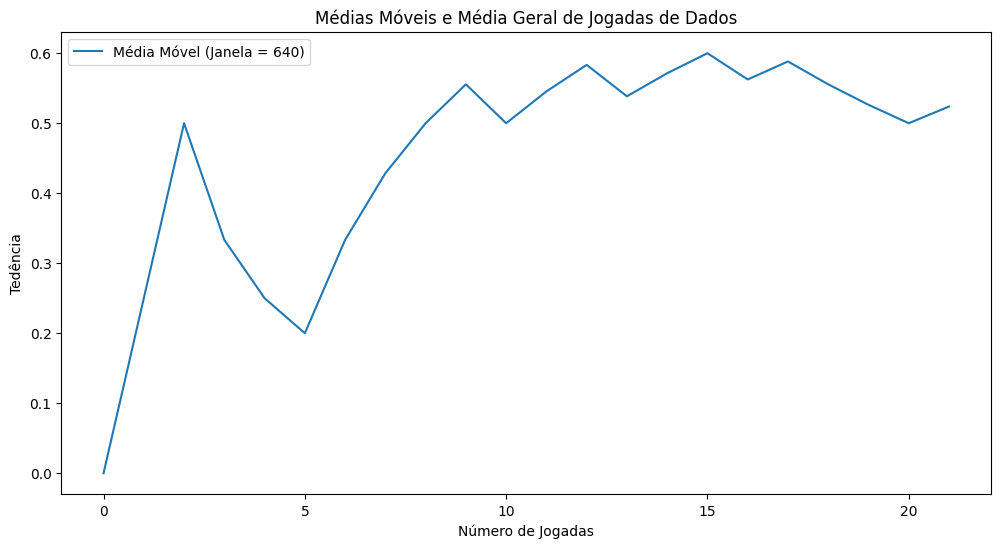

Quantidade de Apostas: 21 
Media Apostas: 0.52 
Última entrada: 1
Saida: 698 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.679012      0.680982      0.682927   
1       0.682353      0.678363      0.674419      0.676301      0.678161   
2       0.677778      0.679558      0.681319      0.683060      0.679348   
3       0.668421      0.670157      0.666667      0.668394      0.664948   
4       0.670000      0.671642      0.668317      0.665025      0.666667   
5       0.676190      0.672986      0.669811      0.666667      0.668224   
6       0.668182      0.665158      0.662162      0.659193      0.660714   
7       0.665217      0.662338      0.663793      0.665236      0.666667   
8       0.670833      0.672199      0.673554      0.674897      0.676230   
9       0.684000      0.681275      0.682540      0.679842      0.677165   
10      0.673077      0.674330      0.675573      0.676806      0.67

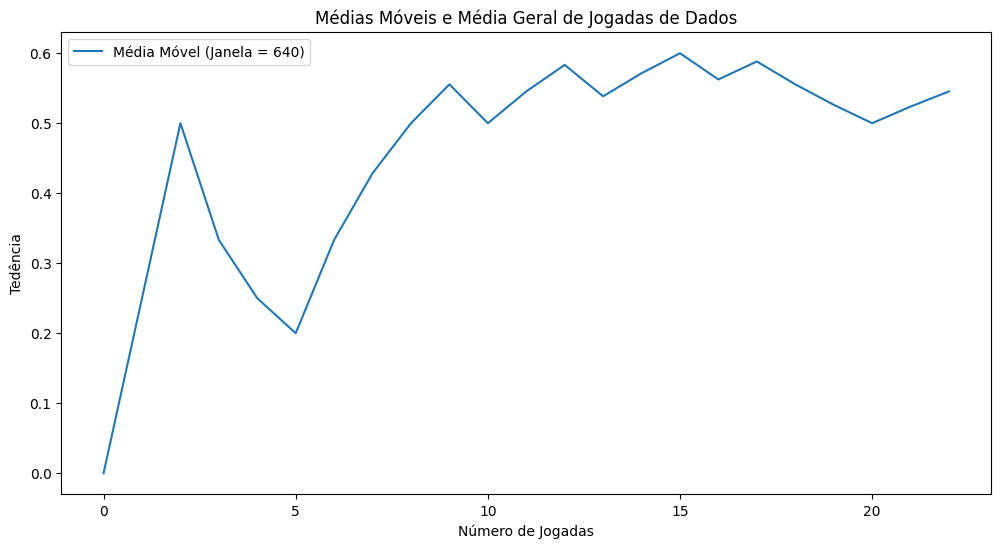

Quantidade de Apostas: 22 
Media Apostas: 0.55 
Última entrada: 1
Saida: 699 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.680982      0.682927   
1       0.682353      0.684211      0.680233      0.676301      0.678161   
2       0.683333      0.679558      0.681319      0.683060      0.684783   
3       0.673684      0.670157      0.671875      0.668394      0.670103   
4       0.670000      0.671642      0.673267      0.669951      0.666667   
5       0.676190      0.677725      0.674528      0.671362      0.668224   
6       0.672727      0.669683      0.666667      0.663677      0.660714   
7       0.665217      0.666667      0.663793      0.665236      0.666667   
8       0.670833      0.672199      0.673554      0.674897      0.676230   
9       0.684000      0.685259      0.682540      0.683794      0.681102   
10      0.676923      0.674330      0.675573      0.676806      0.67

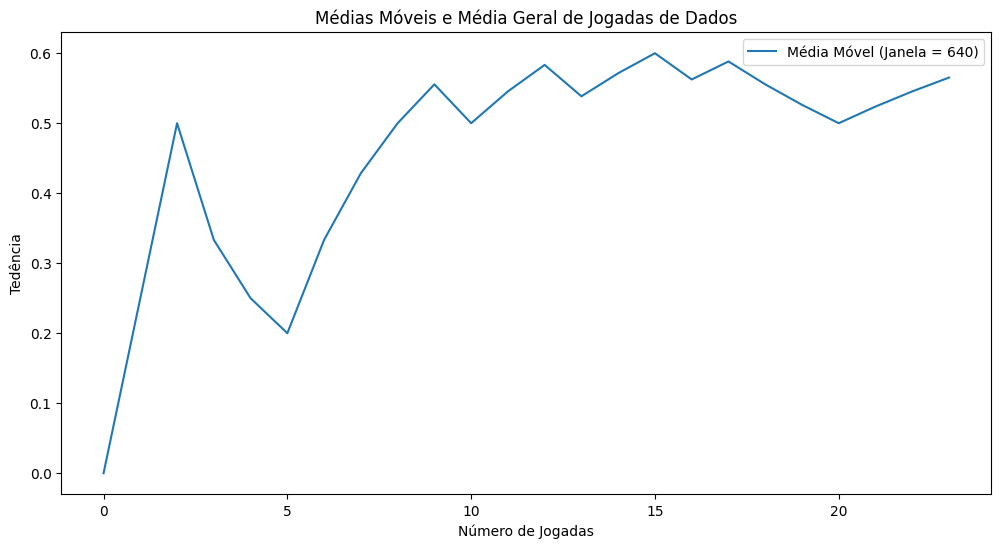

Quantidade de Apostas: 23 
Media Apostas: 0.57 
Última entrada: 1
Saida: 700 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.675000      0.677019      0.679012      0.680982      0.676829   
1       0.676471      0.678363      0.680233      0.676301      0.672414   
2       0.677778      0.679558      0.675824      0.677596      0.679348   
3       0.673684      0.670157      0.666667      0.668394      0.664948   
4       0.665000      0.666667      0.668317      0.669951      0.666667   
5       0.671429      0.672986      0.674528      0.671362      0.668224   
6       0.668182      0.669683      0.666667      0.663677      0.660714   
7       0.660870      0.662338      0.663793      0.660944      0.662393   
8       0.666667      0.668050      0.669421      0.670782      0.672131   
9       0.680000      0.681275      0.682540      0.679842      0.681102   
10      0.673077      0.674330      0.671756      0.673004      0.67

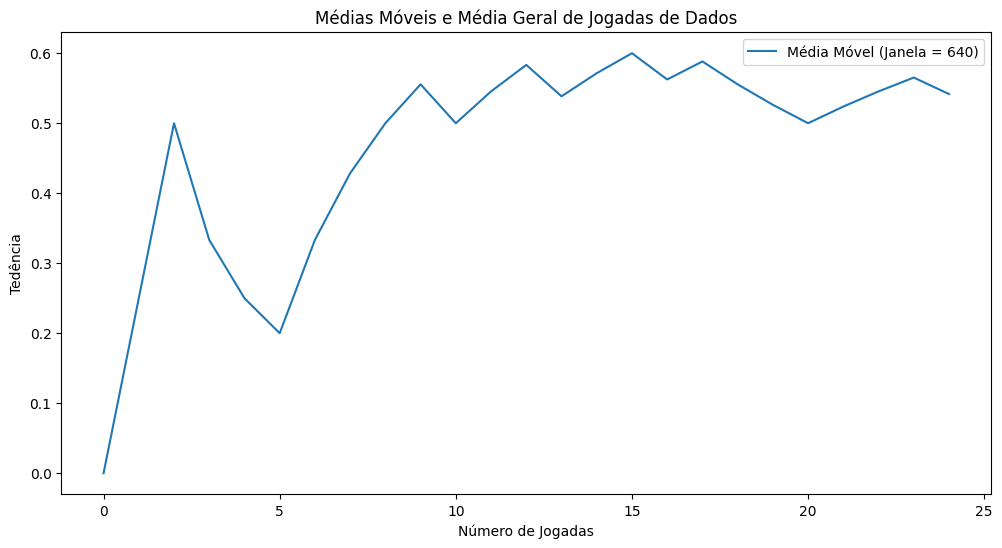

Quantidade de Apostas: 24 
Media Apostas: 0.54 
Última entrada: 0
Saida: 701 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.668750      0.670807      0.672840      0.674847      0.676829   
1       0.670588      0.672515      0.674419      0.676301      0.672414   
2       0.672222      0.674033      0.675824      0.672131      0.673913   
3       0.668421      0.670157      0.666667      0.663212      0.664948   
4       0.665000      0.661692      0.663366      0.665025      0.666667   
5       0.666667      0.668246      0.669811      0.671362      0.668224   
6       0.663636      0.665158      0.666667      0.663677      0.660714   
7       0.660870      0.658009      0.659483      0.660944      0.658120   
8       0.662500      0.663900      0.665289      0.666667      0.668033   
9       0.676000      0.677291      0.678571      0.679842      0.677165   
10      0.673077      0.670498      0.671756      0.669202      0.67

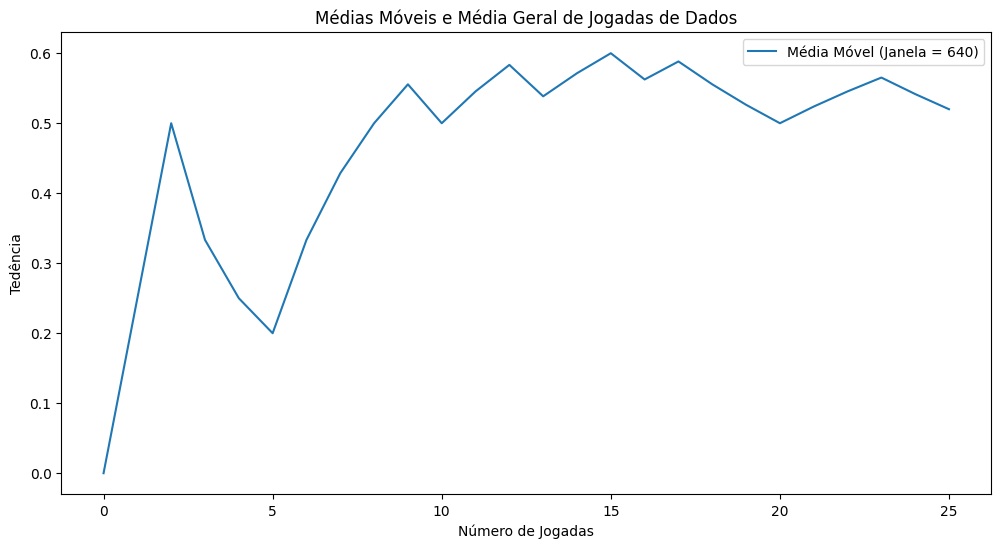

Quantidade de Apostas: 25 
Media Apostas: 0.52 
Última entrada: 0
Saida: 702 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.662500      0.664596      0.666667      0.668712      0.670732   
1       0.664706      0.666667      0.668605      0.670520      0.672414   
2       0.666667      0.668508      0.670330      0.672131      0.668478   
3       0.668421      0.664921      0.666667      0.663212      0.659794   
4       0.660000      0.661692      0.658416      0.660099      0.661765   
5       0.661905      0.663507      0.665094      0.666667      0.668224   
6       0.663636      0.660633      0.662162      0.663677      0.660714   
7       0.656522      0.658009      0.655172      0.656652      0.658120   
8       0.658333      0.659751      0.661157      0.662551      0.663934   
9       0.672000      0.673307      0.674603      0.675889      0.677165   
10      0.669231      0.670498      0.667939      0.669202      0.66

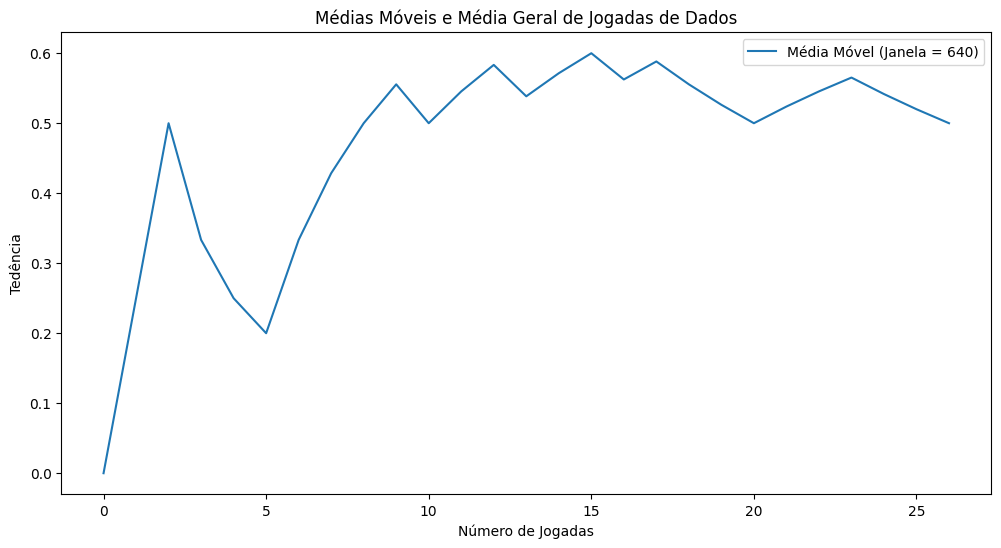

Quantidade de Apostas: 26 
Media Apostas: 0.50 
Última entrada: 0
Saida: 703 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.662500      0.664596      0.666667      0.668712      0.670732   
1       0.670588      0.666667      0.668605      0.670520      0.672414   
2       0.666667      0.668508      0.670330      0.672131      0.673913   
3       0.673684      0.670157      0.666667      0.668394      0.664948   
4       0.660000      0.661692      0.663366      0.660099      0.661765   
5       0.661905      0.663507      0.665094      0.666667      0.668224   
6       0.663636      0.665158      0.662162      0.663677      0.665179   
7       0.656522      0.658009      0.659483      0.656652      0.658120   
8       0.658333      0.659751      0.661157      0.662551      0.663934   
9       0.672000      0.673307      0.674603      0.675889      0.677165   
10      0.669231      0.670498      0.671756      0.669202      0.67

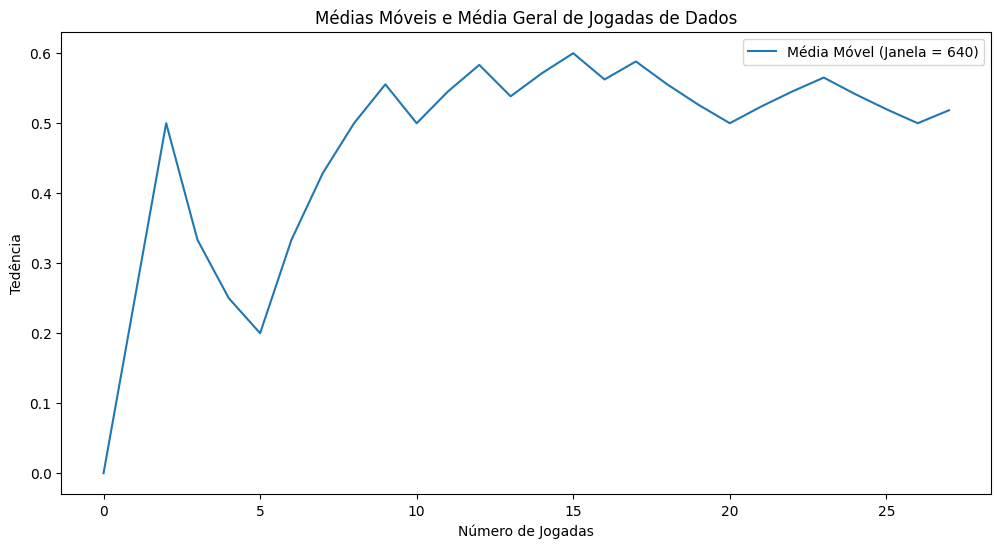

Quantidade de Apostas: 27 
Media Apostas: 0.52 
Última entrada: 1
Saida: 704 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.662500      0.664596      0.666667      0.668712      0.670732   
1       0.676471      0.672515      0.668605      0.670520      0.672414   
2       0.672222      0.668508      0.670330      0.672131      0.673913   
3       0.673684      0.675393      0.671875      0.668394      0.670103   
4       0.660000      0.661692      0.663366      0.665025      0.661765   
5       0.661905      0.663507      0.665094      0.666667      0.668224   
6       0.663636      0.665158      0.666667      0.663677      0.665179   
7       0.656522      0.658009      0.659483      0.660944      0.658120   
8       0.662500      0.659751      0.661157      0.662551      0.663934   
9       0.672000      0.673307      0.674603      0.675889      0.677165   
10      0.673077      0.670498      0.671756      0.673004      0.67

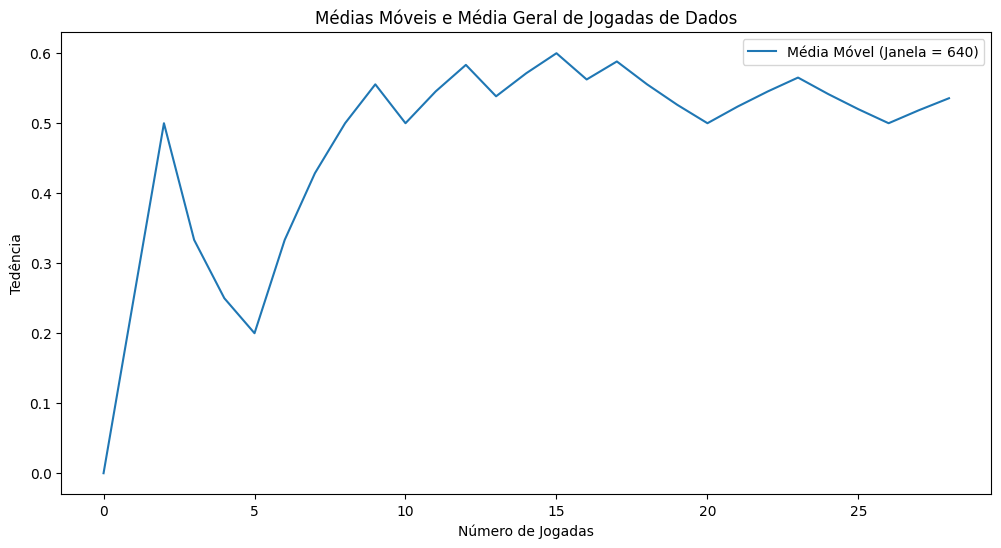

Quantidade de Apostas: 28 
Media Apostas: 0.54 
Última entrada: 1
Saida: 705 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.662500      0.664596      0.666667      0.668712      0.670732   
1       0.676471      0.678363      0.674419      0.670520      0.672414   
2       0.672222      0.674033      0.670330      0.672131      0.673913   
3       0.678947      0.675393      0.677083      0.673575      0.670103   
4       0.665000      0.661692      0.663366      0.665025      0.666667   
5       0.661905      0.663507      0.665094      0.666667      0.668224   
6       0.663636      0.665158      0.666667      0.668161      0.665179   
7       0.656522      0.658009      0.659483      0.660944      0.662393   
8       0.662500      0.663900      0.661157      0.662551      0.663934   
9       0.672000      0.673307      0.674603      0.675889      0.677165   
10      0.676923      0.674330      0.671756      0.673004      0.67

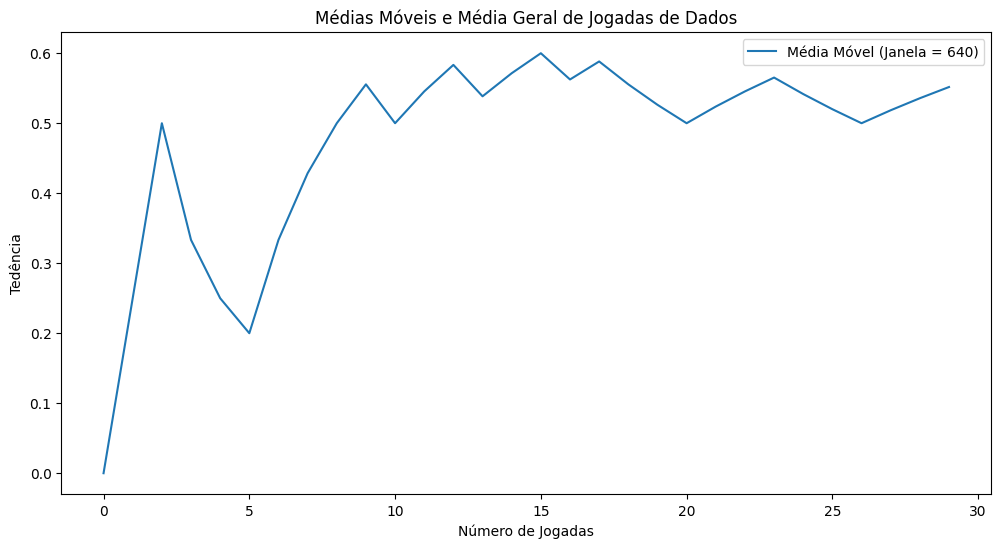

Quantidade de Apostas: 29 
Media Apostas: 0.55 
Última entrada: 1
Saida: 706 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.656250      0.658385      0.660494      0.662577      0.664634   
1       0.670588      0.672515      0.674419      0.670520      0.666667   
2       0.666667      0.668508      0.670330      0.666667      0.668478   
3       0.673684      0.675393      0.671875      0.673575      0.670103   
4       0.660000      0.661692      0.658416      0.660099      0.661765   
5       0.661905      0.658768      0.660377      0.661972      0.663551   
6       0.663636      0.660633      0.662162      0.663677      0.665179   
7       0.656522      0.653680      0.655172      0.656652      0.658120   
8       0.658333      0.659751      0.661157      0.658436      0.659836   
9       0.668000      0.669323      0.670635      0.671937      0.673228   
10      0.676923      0.674330      0.671756      0.669202      0.67

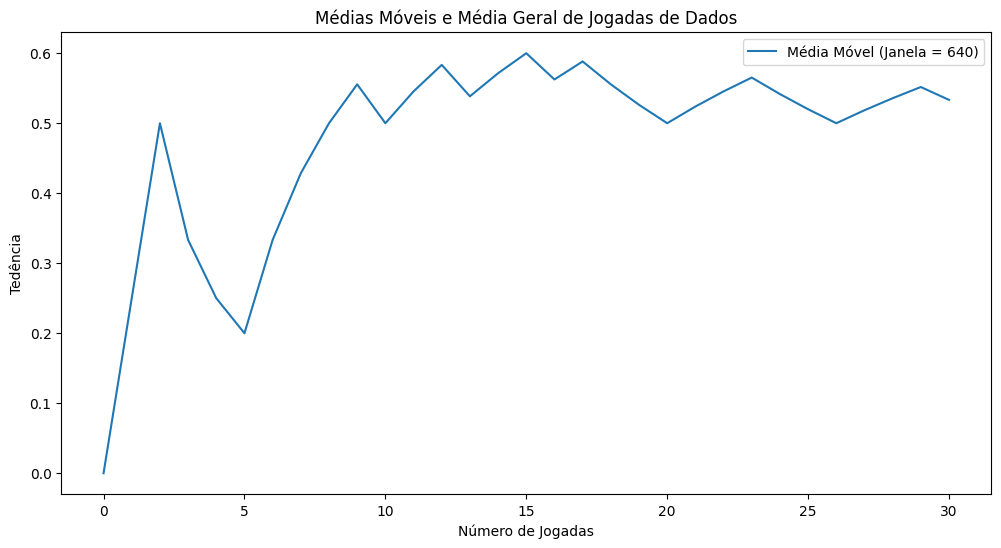

Quantidade de Apostas: 30 
Media Apostas: 0.53 
Última entrada: 0
Saida: 707 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.662500      0.658385      0.660494      0.662577      0.664634   
1       0.676471      0.672515      0.674419      0.676301      0.672414   
2       0.672222      0.668508      0.670330      0.672131      0.668478   
3       0.673684      0.675393      0.677083      0.673575      0.675258   
4       0.665000      0.661692      0.663366      0.660099      0.661765   
5       0.666667      0.663507      0.660377      0.661972      0.663551   
6       0.668182      0.665158      0.662162      0.663677      0.665179   
7       0.660870      0.658009      0.655172      0.656652      0.658120   
8       0.658333      0.659751      0.661157      0.662551      0.659836   
9       0.668000      0.669323      0.670635      0.671937      0.673228   
10      0.676923      0.678161      0.675573      0.673004      0.67

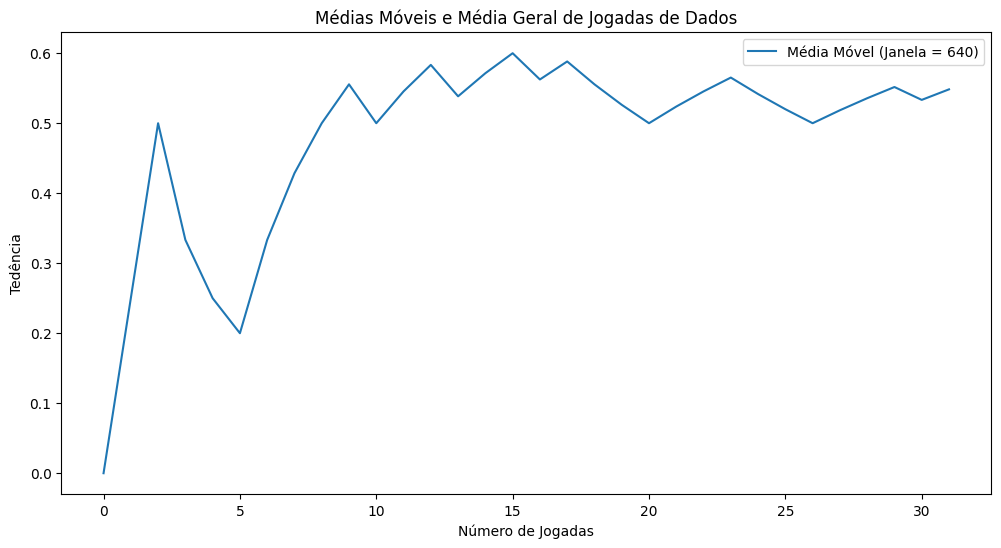

Quantidade de Apostas: 31 
Media Apostas: 0.55 
Última entrada: 1
Saida: 708 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.662500      0.664596      0.660494      0.662577      0.664634   
1       0.676471      0.678363      0.674419      0.676301      0.678161   
2       0.677778      0.674033      0.670330      0.672131      0.673913   
3       0.673684      0.675393      0.677083      0.678756      0.675258   
4       0.665000      0.666667      0.663366      0.665025      0.661765   
5       0.666667      0.668246      0.665094      0.661972      0.663551   
6       0.672727      0.669683      0.666667      0.663677      0.665179   
7       0.665217      0.662338      0.659483      0.656652      0.658120   
8       0.662500      0.659751      0.661157      0.662551      0.663934   
9       0.668000      0.669323      0.670635      0.671937      0.673228   
10      0.680769      0.678161      0.679389      0.676806      0.67

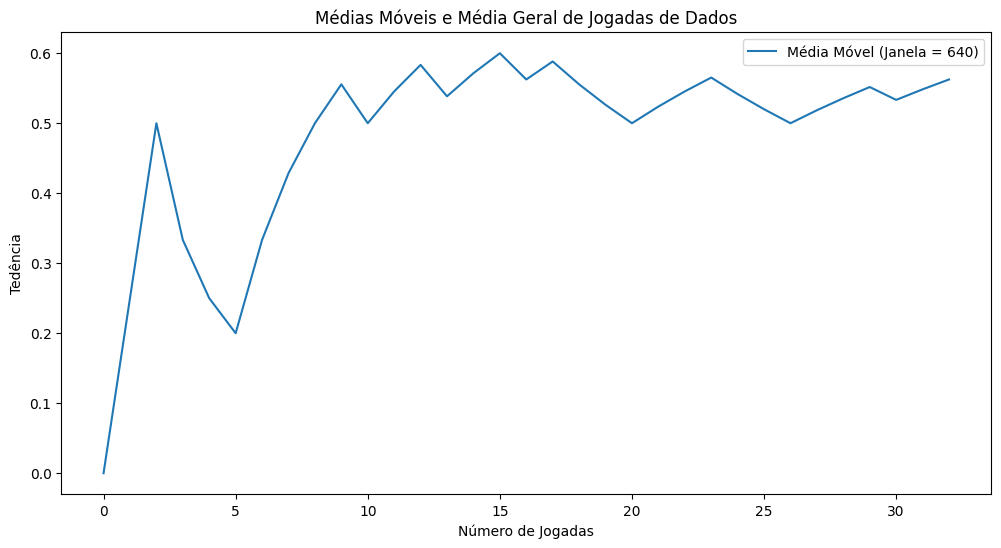

Quantidade de Apostas: 32 
Media Apostas: 0.56 
Última entrada: 1
Saida: 709 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.668750      0.664596      0.666667      0.662577      0.664634   
1       0.676471      0.678363      0.680233      0.676301      0.678161   
2       0.677778      0.679558      0.675824      0.672131      0.673913   
3       0.678947      0.675393      0.677083      0.678756      0.680412   
4       0.670000      0.666667      0.668317      0.665025      0.666667   
5       0.666667      0.668246      0.669811      0.666667      0.663551   
6       0.672727      0.674208      0.671171      0.668161      0.665179   
7       0.669565      0.666667      0.663793      0.660944      0.658120   
8       0.662500      0.663900      0.661157      0.662551      0.663934   
9       0.668000      0.669323      0.670635      0.671937      0.673228   
10      0.680769      0.681992      0.679389      0.680608      0.67

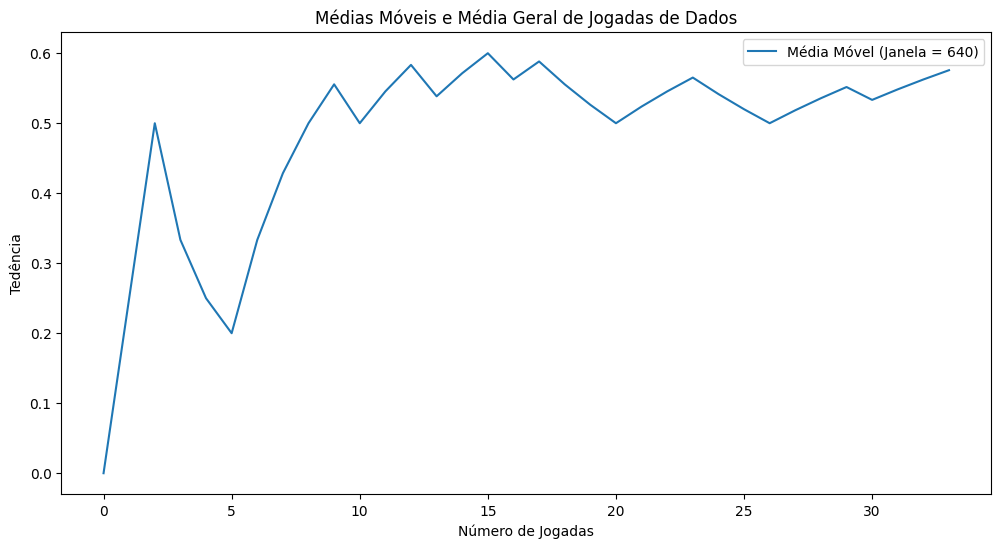

Quantidade de Apostas: 33 
Media Apostas: 0.58 
Última entrada: 1
Saida: 710 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.675000      0.670807      0.666667      0.668712      0.664634   
1       0.676471      0.678363      0.680233      0.682081      0.678161   
2       0.677778      0.679558      0.681319      0.677596      0.673913   
3       0.678947      0.680628      0.677083      0.678756      0.680412   
4       0.675000      0.671642      0.668317      0.669951      0.666667   
5       0.666667      0.668246      0.669811      0.671362      0.668224   
6       0.672727      0.674208      0.675676      0.672646      0.669643   
7       0.669565      0.670996      0.668103      0.665236      0.662393   
8       0.662500      0.663900      0.665289      0.662551      0.663934   
9       0.668000      0.669323      0.670635      0.671937      0.673228   
10      0.680769      0.681992      0.683206      0.680608      0.68

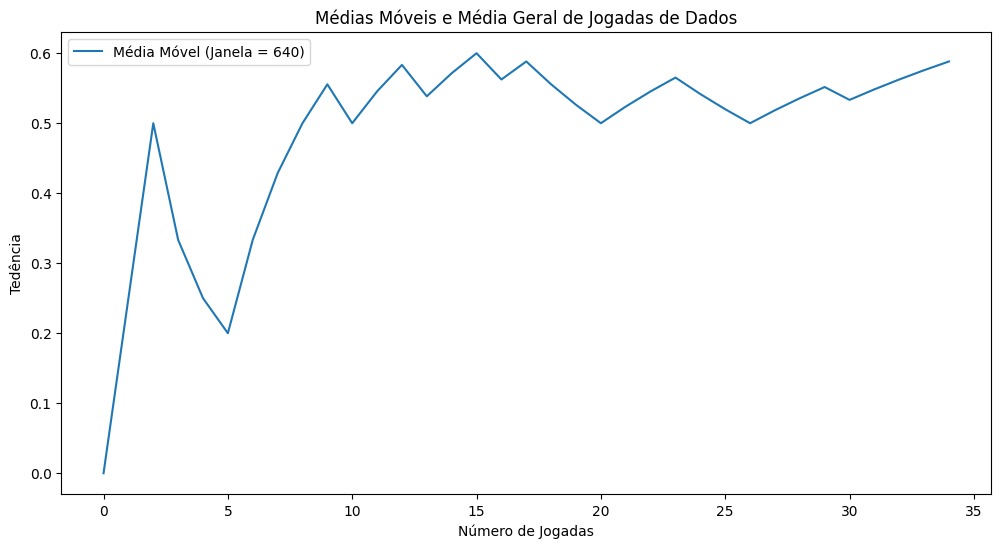

Quantidade de Apostas: 34 
Media Apostas: 0.59 
Última entrada: 1
Saida: 711 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.675000      0.677019      0.672840      0.668712      0.670732   
1       0.676471      0.678363      0.680233      0.682081      0.683908   
2       0.677778      0.679558      0.681319      0.683060      0.679348   
3       0.678947      0.680628      0.682292      0.678756      0.680412   
4       0.675000      0.676617      0.673267      0.669951      0.671569   
5       0.671429      0.668246      0.669811      0.671362      0.672897   
6       0.672727      0.674208      0.675676      0.677130      0.674107   
7       0.669565      0.670996      0.672414      0.669528      0.666667   
8       0.666667      0.663900      0.665289      0.666667      0.663934   
9       0.668000      0.669323      0.670635      0.671937      0.673228   
10      0.680769      0.681992      0.683206      0.684411      0.68

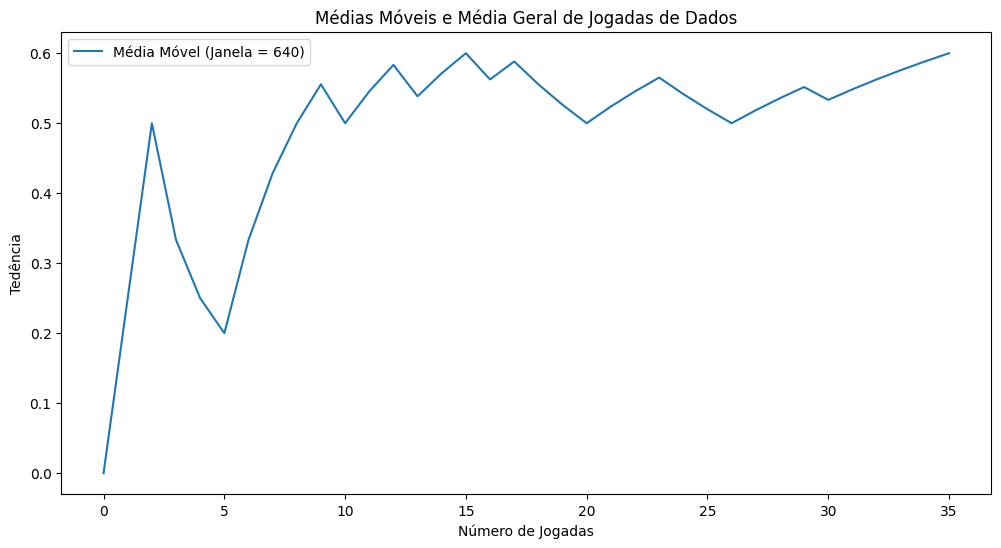

Quantidade de Apostas: 35 
Media Apostas: 0.60 
Última entrada: 1
Saida: 712 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.677019      0.679012      0.674847      0.670732   
1       0.676471      0.678363      0.680233      0.682081      0.683908   
2       0.677778      0.679558      0.681319      0.683060      0.684783   
3       0.678947      0.680628      0.682292      0.683938      0.680412   
4       0.680000      0.676617      0.678218      0.674877      0.671569   
5       0.671429      0.672986      0.669811      0.671362      0.672897   
6       0.672727      0.674208      0.675676      0.677130      0.678571   
7       0.673913      0.670996      0.672414      0.673820      0.670940   
8       0.666667      0.668050      0.665289      0.666667      0.668033   
9       0.668000      0.669323      0.670635      0.671937      0.673228   
10      0.680769      0.681992      0.683206      0.684411      0.68

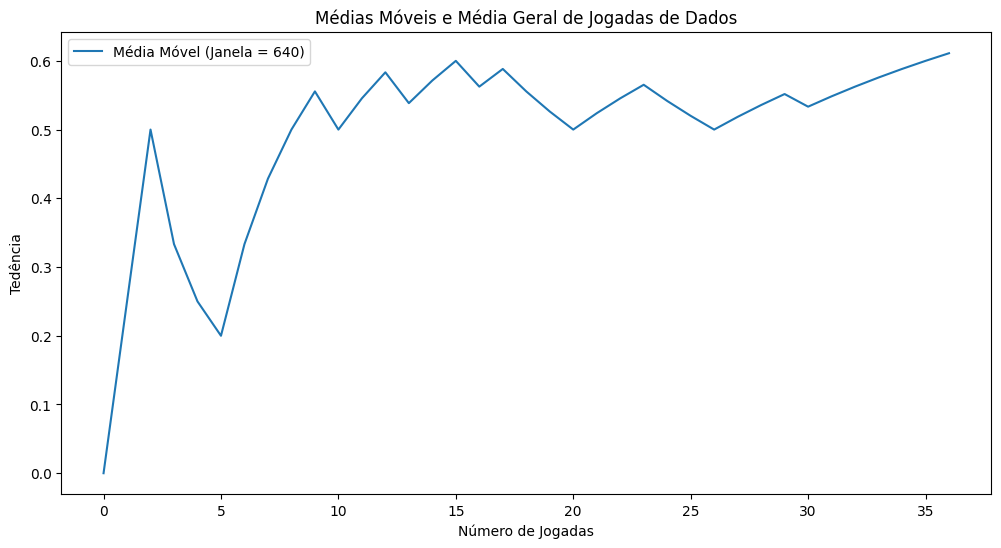

Quantidade de Apostas: 36 
Media Apostas: 0.61 
Última entrada: 1
Saida: 713 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.679012      0.680982      0.676829   
1       0.676471      0.678363      0.680233      0.682081      0.683908   
2       0.683333      0.679558      0.681319      0.683060      0.684783   
3       0.678947      0.680628      0.682292      0.683938      0.685567   
4       0.685000      0.681592      0.678218      0.679803      0.676471   
5       0.671429      0.672986      0.674528      0.671362      0.672897   
6       0.672727      0.674208      0.675676      0.677130      0.678571   
7       0.673913      0.675325      0.672414      0.673820      0.675214   
8       0.666667      0.668050      0.669421      0.666667      0.668033   
9       0.668000      0.669323      0.670635      0.671937      0.673228   
10      0.680769      0.681992      0.683206      0.684411      0.68

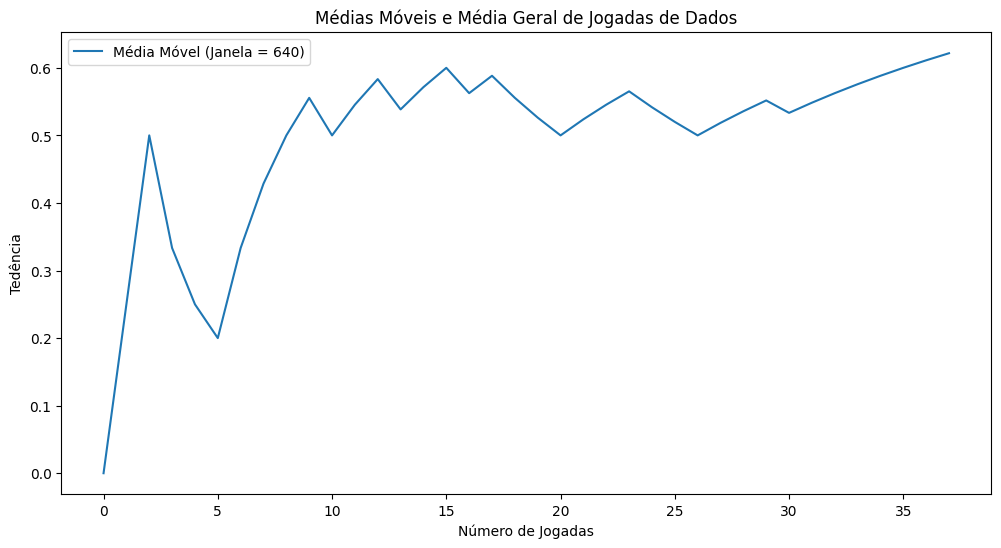

Quantidade de Apostas: 37 
Media Apostas: 0.62 
Última entrada: 1
Saida: 714 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.680982      0.682927   
1       0.676471      0.678363      0.680233      0.682081      0.683908   
2       0.688889      0.685083      0.681319      0.683060      0.684783   
3       0.684211      0.680628      0.682292      0.683938      0.685567   
4       0.685000      0.686567      0.683168      0.679803      0.681373   
5       0.671429      0.672986      0.674528      0.676056      0.672897   
6       0.672727      0.674208      0.675676      0.677130      0.678571   
7       0.673913      0.675325      0.676724      0.673820      0.675214   
8       0.666667      0.668050      0.669421      0.670782      0.668033   
9       0.672000      0.669323      0.670635      0.671937      0.673228   
10      0.680769      0.681992      0.683206      0.684411      0.68

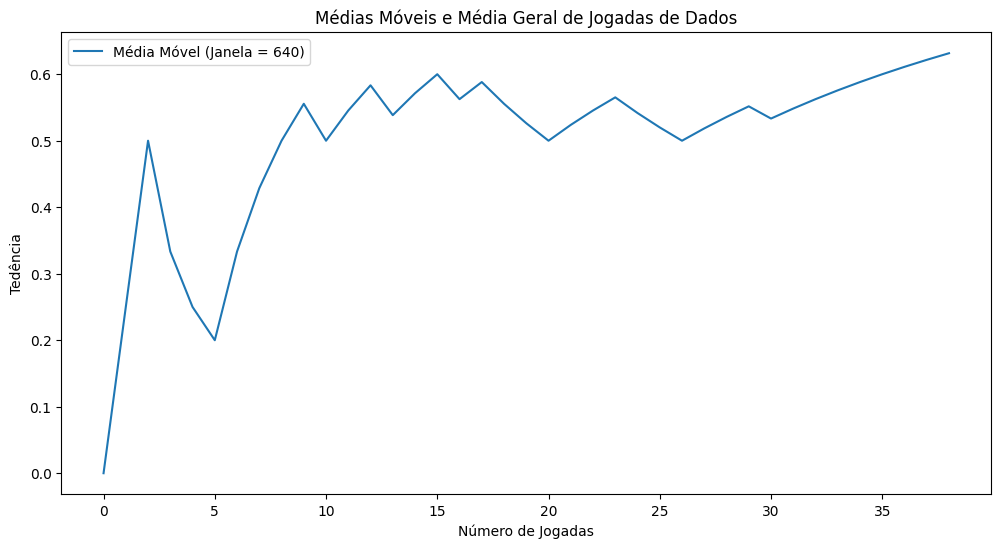

Quantidade de Apostas: 38 
Media Apostas: 0.63 
Última entrada: 1
Saida: 715 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.682927   
1       0.676471      0.678363      0.680233      0.682081      0.683908   
2       0.688889      0.690608      0.686813      0.683060      0.684783   
3       0.684211      0.685864      0.682292      0.683938      0.685567   
4       0.690000      0.686567      0.688119      0.684729      0.681373   
5       0.676190      0.672986      0.674528      0.676056      0.677570   
6       0.672727      0.674208      0.675676      0.677130      0.678571   
7       0.673913      0.675325      0.676724      0.678112      0.675214   
8       0.666667      0.668050      0.669421      0.670782      0.672131   
9       0.672000      0.673307      0.670635      0.671937      0.673228   
10      0.680769      0.681992      0.683206      0.684411      0.68

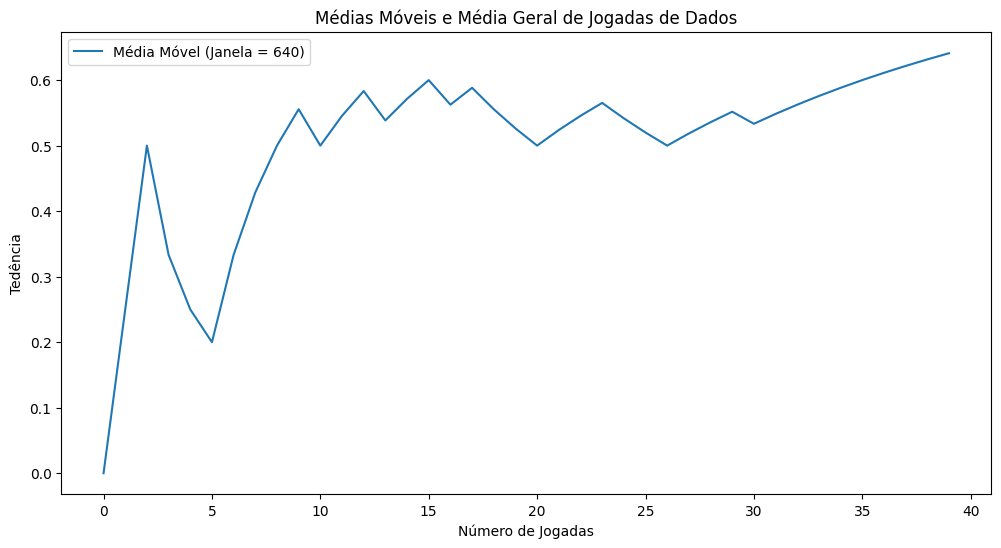

Quantidade de Apostas: 39 
Media Apostas: 0.64 
Última entrada: 1
Saida: 716 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.689024   
1       0.676471      0.678363      0.680233      0.682081      0.683908   
2       0.688889      0.690608      0.692308      0.688525      0.684783   
3       0.684211      0.685864      0.687500      0.683938      0.685567   
4       0.690000      0.691542      0.688119      0.689655      0.686275   
5       0.676190      0.677725      0.674528      0.676056      0.677570   
6       0.677273      0.674208      0.675676      0.677130      0.678571   
7       0.678261      0.675325      0.676724      0.678112      0.679487   
8       0.670833      0.668050      0.669421      0.670782      0.672131   
9       0.672000      0.673307      0.674603      0.671937      0.673228   
10      0.680769      0.681992      0.683206      0.684411      0.68

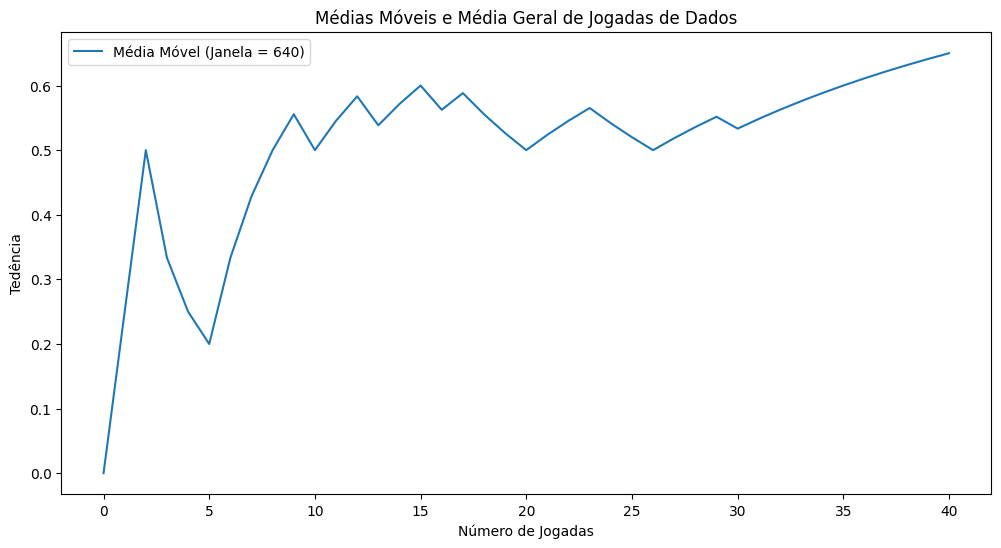

Quantidade de Apostas: 40 
Media Apostas: 0.65 
Última entrada: 1
Saida: 717 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.689024   
1       0.682353      0.678363      0.680233      0.682081      0.683908   
2       0.694444      0.690608      0.692308      0.693989      0.690217   
3       0.689474      0.685864      0.687500      0.689119      0.685567   
4       0.690000      0.691542      0.693069      0.689655      0.691176   
5       0.680952      0.677725      0.679245      0.676056      0.677570   
6       0.681818      0.678733      0.675676      0.677130      0.678571   
7       0.682609      0.679654      0.676724      0.678112      0.679487   
8       0.675000      0.672199      0.669421      0.670782      0.672131   
9       0.672000      0.673307      0.674603      0.675889      0.673228   
10      0.680769      0.681992      0.683206      0.684411      0.68

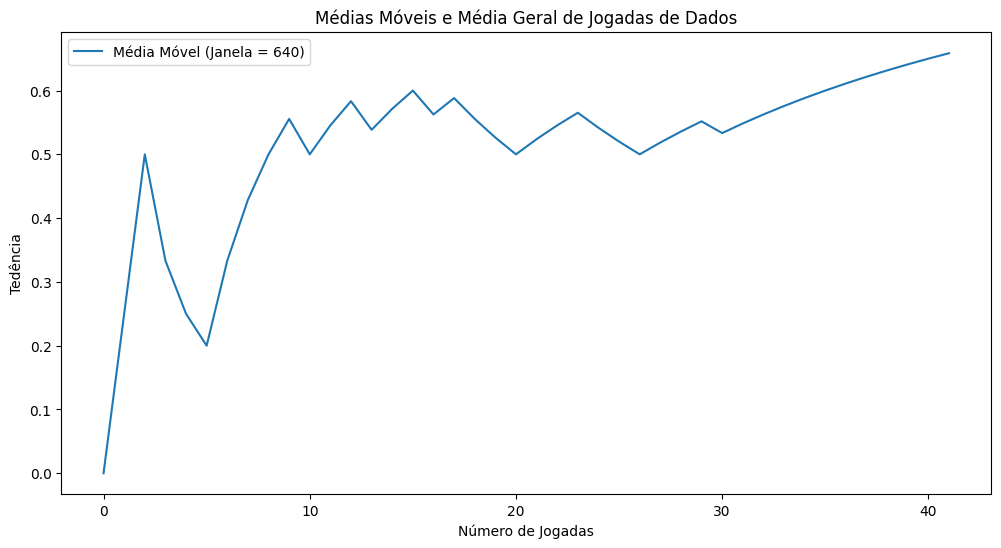

Quantidade de Apostas: 41 
Media Apostas: 0.66 
Última entrada: 1
Saida: 718 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.683230      0.685185      0.687117      0.689024   
1       0.682353      0.684211      0.680233      0.682081      0.683908   
2       0.694444      0.696133      0.692308      0.693989      0.695652   
3       0.694737      0.691099      0.687500      0.689119      0.690722   
4       0.690000      0.691542      0.693069      0.694581      0.691176   
5       0.680952      0.682464      0.679245      0.680751      0.677570   
6       0.681818      0.683258      0.680180      0.677130      0.678571   
7       0.686957      0.683983      0.681034      0.678112      0.679487   
8       0.679167      0.676349      0.673554      0.670782      0.672131   
9       0.676000      0.673307      0.674603      0.675889      0.677165   
10      0.680769      0.681992      0.683206      0.684411      0.68

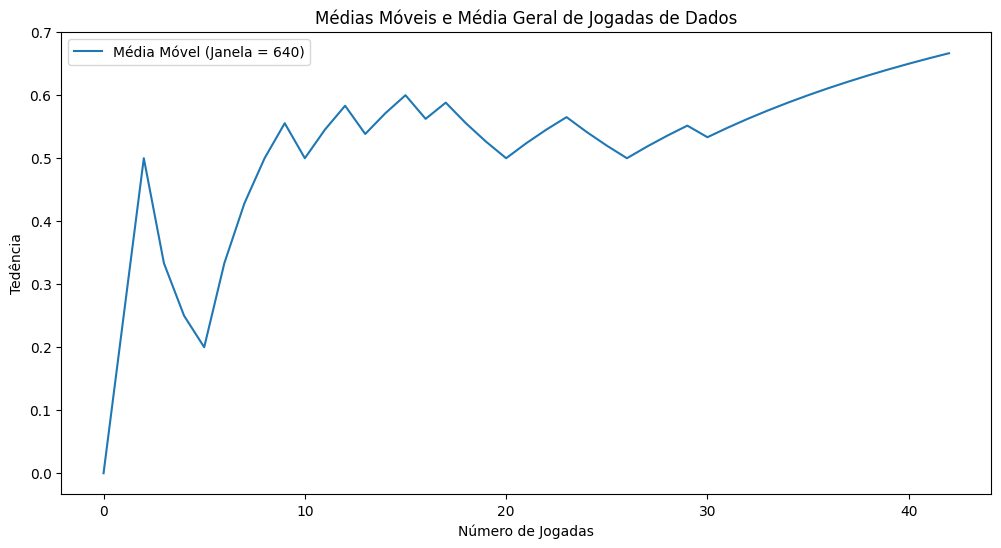

Quantidade de Apostas: 42 
Media Apostas: 0.67 
Última entrada: 1
Saida: 719 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.685185      0.687117      0.689024   
1       0.688235      0.684211      0.686047      0.682081      0.683908   
2       0.694444      0.696133      0.697802      0.693989      0.695652   
3       0.694737      0.696335      0.692708      0.689119      0.690722   
4       0.695000      0.691542      0.693069      0.694581      0.696078   
5       0.685714      0.682464      0.683962      0.680751      0.682243   
6       0.681818      0.683258      0.684685      0.681614      0.678571   
7       0.686957      0.688312      0.685345      0.682403      0.679487   
8       0.683333      0.680498      0.677686      0.674897      0.672131   
9       0.676000      0.677291      0.674603      0.675889      0.677165   
10      0.680769      0.681992      0.683206      0.684411      0.68

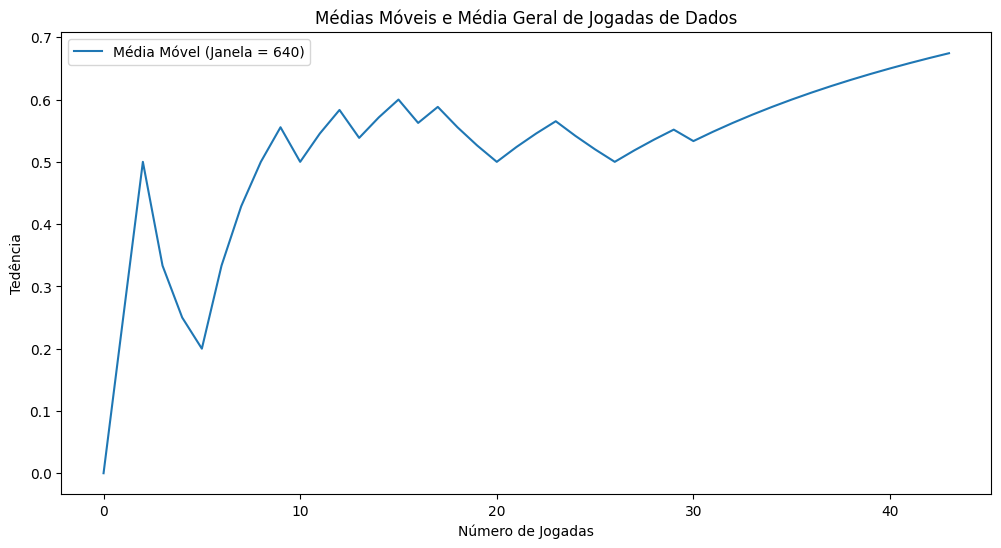

Quantidade de Apostas: 43 
Media Apostas: 0.67 
Última entrada: 1
Saida: 720 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.683230      0.685185      0.680982      0.682927   
1       0.688235      0.684211      0.680233      0.682081      0.678161   
2       0.688889      0.690608      0.692308      0.693989      0.690217   
3       0.689474      0.691099      0.692708      0.689119      0.685567   
4       0.690000      0.691542      0.688119      0.689655      0.691176   
5       0.685714      0.682464      0.679245      0.680751      0.677570   
6       0.677273      0.678733      0.680180      0.681614      0.678571   
7       0.682609      0.683983      0.685345      0.682403      0.679487   
8       0.679167      0.680498      0.677686      0.674897      0.672131   
9       0.672000      0.673307      0.674603      0.671937      0.673228   
10      0.676923      0.678161      0.679389      0.680608      0.68

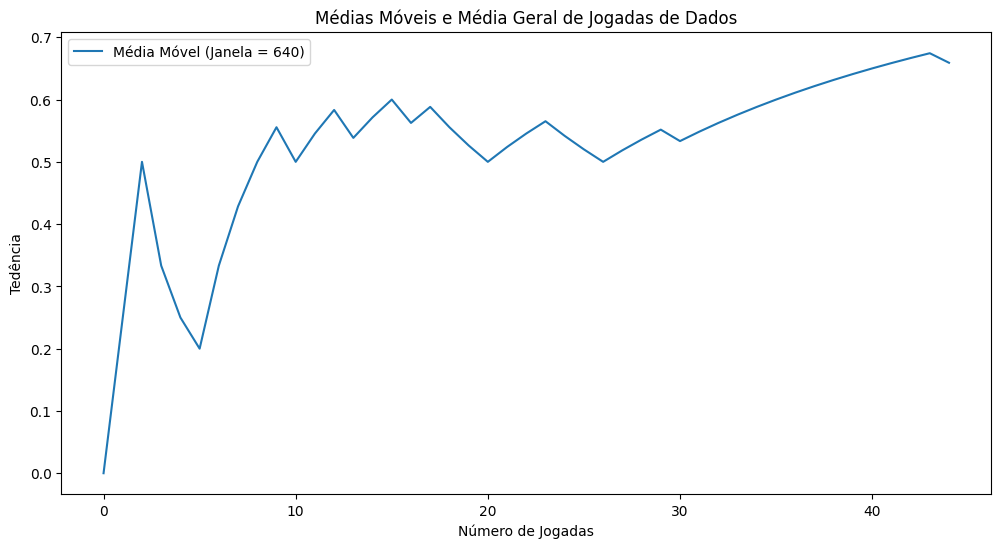

Quantidade de Apostas: 44 
Media Apostas: 0.66 
Última entrada: 0
Saida: 721 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.679012      0.680982      0.676829   
1       0.682353      0.684211      0.680233      0.676301      0.678161   
2       0.683333      0.685083      0.686813      0.688525      0.690217   
3       0.684211      0.685864      0.687500      0.689119      0.685567   
4       0.685000      0.686567      0.688119      0.684729      0.686275   
5       0.680952      0.682464      0.679245      0.676056      0.677570   
6       0.677273      0.674208      0.675676      0.677130      0.678571   
7       0.678261      0.679654      0.681034      0.682403      0.679487   
8       0.675000      0.676349      0.677686      0.674897      0.672131   
9       0.672000      0.669323      0.670635      0.671937      0.669291   
10      0.673077      0.674330      0.675573      0.676806      0.67

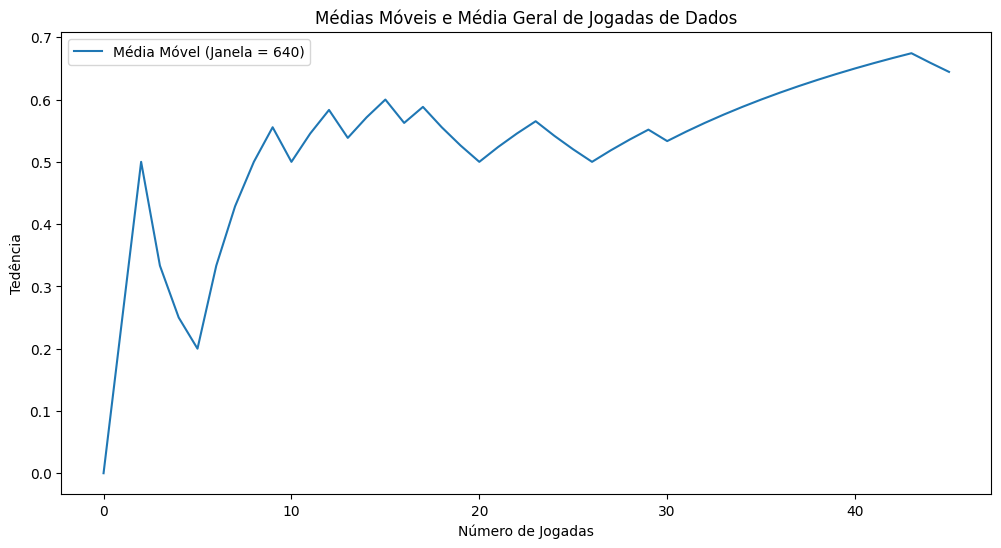

Quantidade de Apostas: 45 
Media Apostas: 0.64 
Última entrada: 0
Saida: 722 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.683230      0.685185      0.680982      0.682927   
1       0.688235      0.684211      0.686047      0.682081      0.678161   
2       0.683333      0.685083      0.686813      0.688525      0.690217   
3       0.684211      0.685864      0.687500      0.689119      0.690722   
4       0.685000      0.686567      0.688119      0.689655      0.686275   
5       0.685714      0.682464      0.683962      0.680751      0.677570   
6       0.677273      0.678733      0.675676      0.677130      0.678571   
7       0.678261      0.679654      0.681034      0.682403      0.683761   
8       0.679167      0.676349      0.677686      0.679012      0.676230   
9       0.672000      0.673307      0.670635      0.671937      0.673228   
10      0.673077      0.674330      0.675573      0.676806      0.67

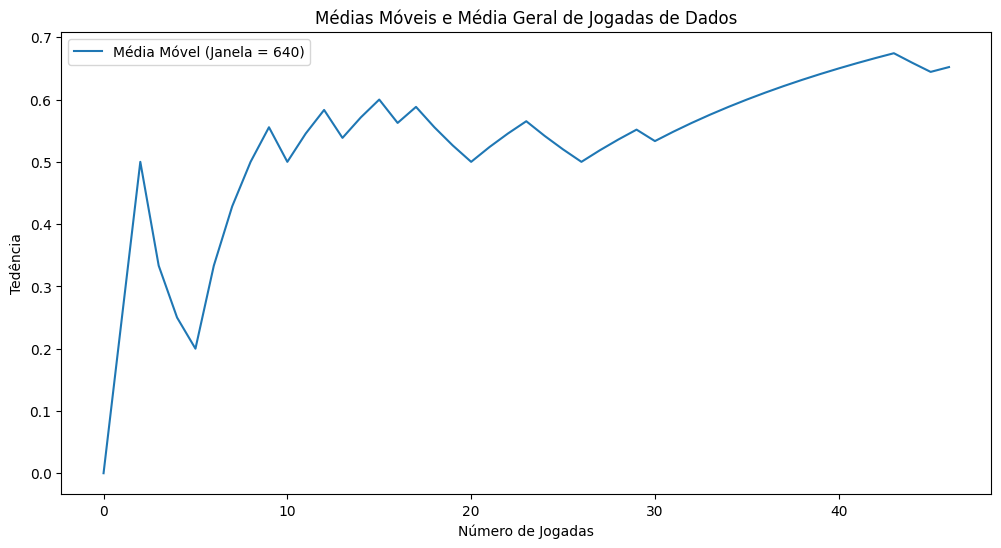

Quantidade de Apostas: 46 
Media Apostas: 0.65 
Última entrada: 1
Saida: 723 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.679012      0.680982      0.676829   
1       0.682353      0.684211      0.680233      0.682081      0.678161   
2       0.677778      0.679558      0.681319      0.683060      0.684783   
3       0.684211      0.680628      0.682292      0.683938      0.685567   
4       0.680000      0.681592      0.683168      0.684729      0.686275   
5       0.685714      0.682464      0.679245      0.680751      0.677570   
6       0.672727      0.674208      0.675676      0.672646      0.674107   
7       0.673913      0.675325      0.676724      0.678112      0.679487   
8       0.675000      0.676349      0.673554      0.674897      0.676230   
9       0.668000      0.669323      0.670635      0.667984      0.669291   
10      0.669231      0.670498      0.671756      0.673004      0.67

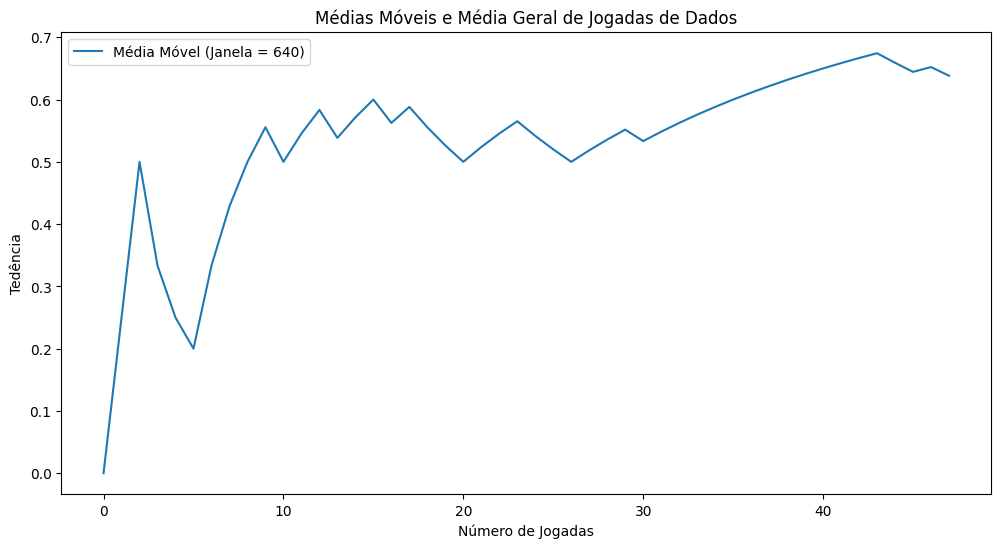

Quantidade de Apostas: 47 
Media Apostas: 0.64 
Última entrada: 0
Saida: 724 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.680982      0.682927   
1       0.682353      0.684211      0.686047      0.682081      0.683908   
2       0.677778      0.679558      0.681319      0.683060      0.684783   
3       0.689474      0.685864      0.682292      0.683938      0.685567   
4       0.685000      0.681592      0.683168      0.684729      0.686275   
5       0.685714      0.687204      0.683962      0.680751      0.682243   
6       0.672727      0.674208      0.675676      0.677130      0.674107   
7       0.673913      0.675325      0.676724      0.678112      0.679487   
8       0.675000      0.676349      0.677686      0.674897      0.676230   
9       0.668000      0.669323      0.670635      0.671937      0.669291   
10      0.673077      0.670498      0.671756      0.673004      0.67

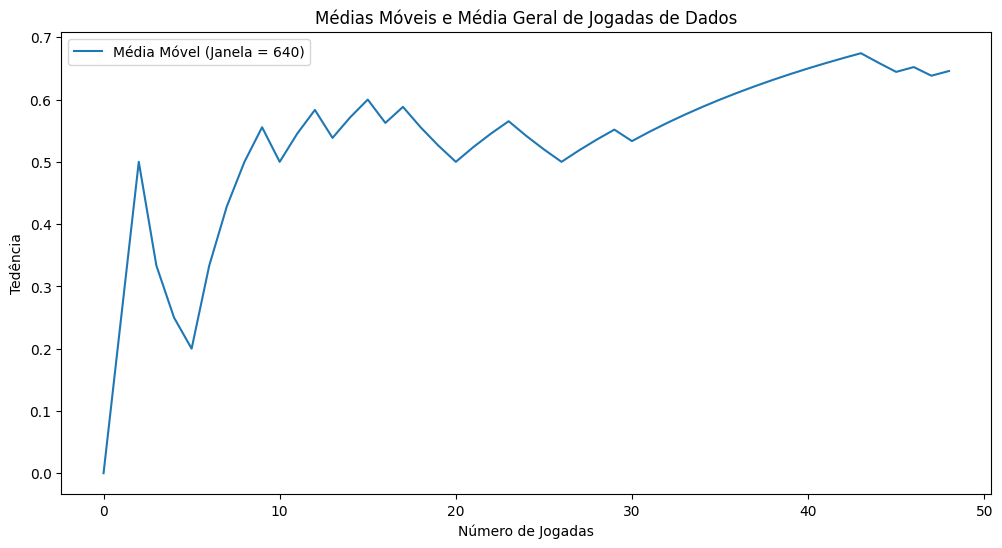

Quantidade de Apostas: 48 
Media Apostas: 0.65 
Última entrada: 1
Saida: 725 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.682927   
1       0.682353      0.684211      0.686047      0.687861      0.683908   
2       0.677778      0.679558      0.681319      0.683060      0.684783   
3       0.689474      0.691099      0.687500      0.683938      0.685567   
4       0.685000      0.686567      0.683168      0.684729      0.686275   
5       0.690476      0.687204      0.688679      0.685446      0.682243   
6       0.677273      0.674208      0.675676      0.677130      0.678571   
7       0.673913      0.675325      0.676724      0.678112      0.679487   
8       0.675000      0.676349      0.677686      0.679012      0.676230   
9       0.668000      0.669323      0.670635      0.671937      0.673228   
10      0.673077      0.674330      0.671756      0.673004      0.67

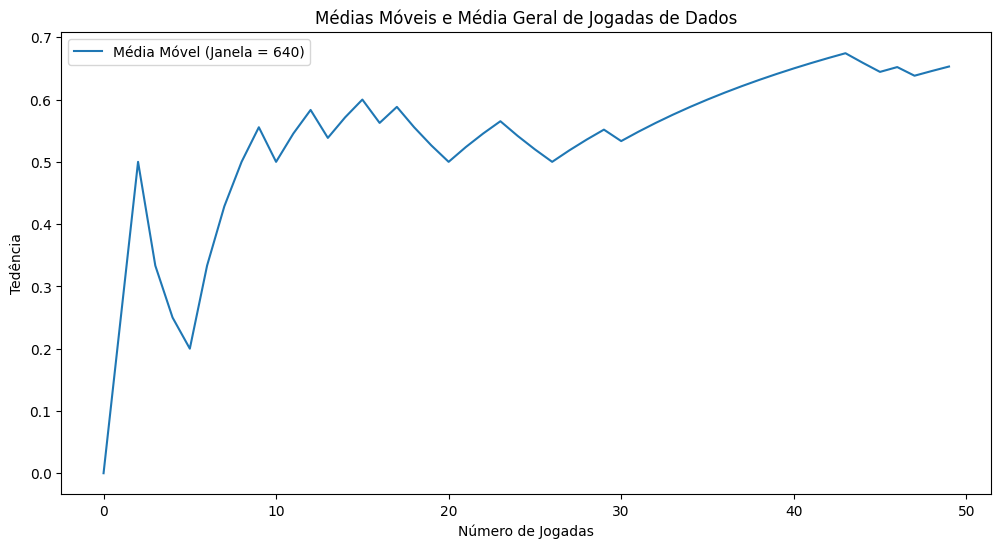

Quantidade de Apostas: 49 
Media Apostas: 0.65 
Última entrada: 1
Saida: 726 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.683230      0.685185      0.687117      0.689024   
1       0.682353      0.684211      0.686047      0.687861      0.689655   
2       0.677778      0.679558      0.681319      0.683060      0.684783   
3       0.689474      0.691099      0.692708      0.689119      0.685567   
4       0.685000      0.686567      0.688119      0.684729      0.686275   
5       0.690476      0.691943      0.688679      0.690141      0.686916   
6       0.677273      0.678733      0.675676      0.677130      0.678571   
7       0.678261      0.675325      0.676724      0.678112      0.679487   
8       0.679167      0.676349      0.677686      0.679012      0.680328   
9       0.672000      0.669323      0.670635      0.671937      0.673228   
10      0.673077      0.674330      0.675573      0.673004      0.67

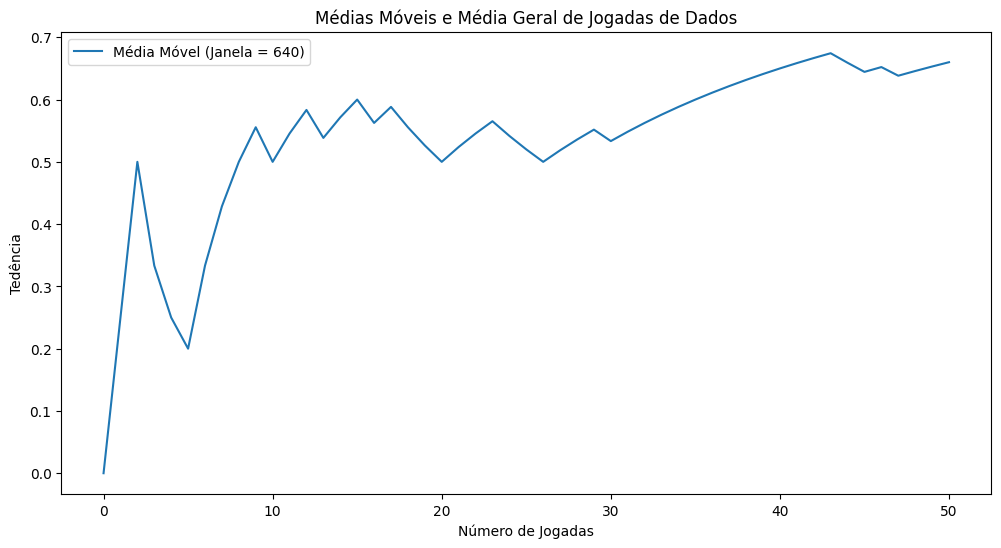

Quantidade de Apostas: 50 
Media Apostas: 0.66 
Última entrada: 1
Saida: 727 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.685185      0.687117      0.689024   
1       0.682353      0.684211      0.686047      0.687861      0.689655   
2       0.683333      0.679558      0.681319      0.683060      0.684783   
3       0.694737      0.691099      0.692708      0.694301      0.690722   
4       0.690000      0.686567      0.688119      0.689655      0.686275   
5       0.690476      0.691943      0.693396      0.690141      0.691589   
6       0.681818      0.678733      0.680180      0.677130      0.678571   
7       0.682609      0.679654      0.676724      0.678112      0.679487   
8       0.683333      0.680498      0.677686      0.679012      0.680328   
9       0.676000      0.673307      0.670635      0.671937      0.673228   
10      0.673077      0.674330      0.675573      0.676806      0.67

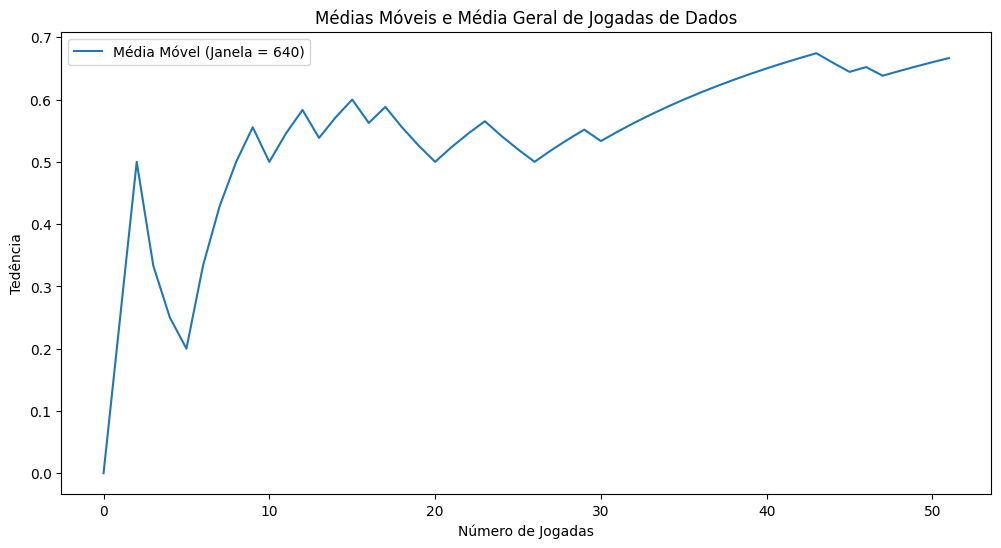

Quantidade de Apostas: 51 
Media Apostas: 0.67 
Última entrada: 1
Saida: 728 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.691358      0.687117      0.689024   
1       0.688235      0.684211      0.686047      0.687861      0.689655   
2       0.683333      0.685083      0.681319      0.683060      0.684783   
3       0.694737      0.696335      0.692708      0.694301      0.695876   
4       0.695000      0.691542      0.688119      0.689655      0.691176   
5       0.690476      0.691943      0.693396      0.694836      0.691589   
6       0.681818      0.683258      0.680180      0.681614      0.678571   
7       0.682609      0.683983      0.681034      0.678112      0.679487   
8       0.687500      0.684647      0.681818      0.679012      0.680328   
9       0.680000      0.677291      0.674603      0.671937      0.673228   
10      0.676923      0.674330      0.675573      0.676806      0.67

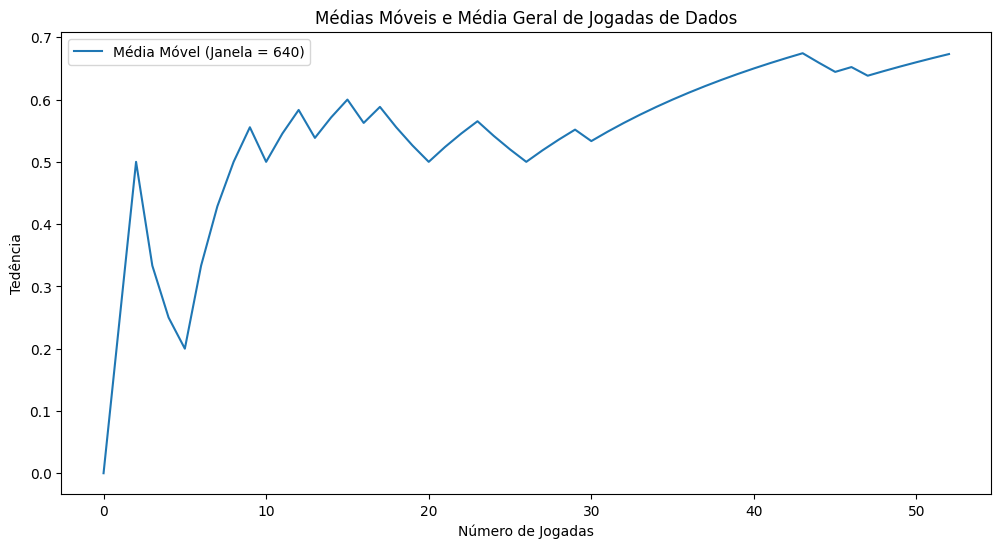

Quantidade de Apostas: 52 
Media Apostas: 0.67 
Última entrada: 1
Saida: 729 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.691358      0.693252      0.689024   
1       0.688235      0.690058      0.686047      0.687861      0.689655   
2       0.688889      0.685083      0.686813      0.683060      0.684783   
3       0.694737      0.696335      0.697917      0.694301      0.695876   
4       0.695000      0.696517      0.693069      0.689655      0.691176   
5       0.695238      0.691943      0.693396      0.694836      0.696262   
6       0.686364      0.683258      0.684685      0.681614      0.683036   
7       0.682609      0.683983      0.685345      0.682403      0.679487   
8       0.687500      0.688797      0.685950      0.683128      0.680328   
9       0.684000      0.681275      0.678571      0.675889      0.673228   
10      0.676923      0.678161      0.675573      0.676806      0.67

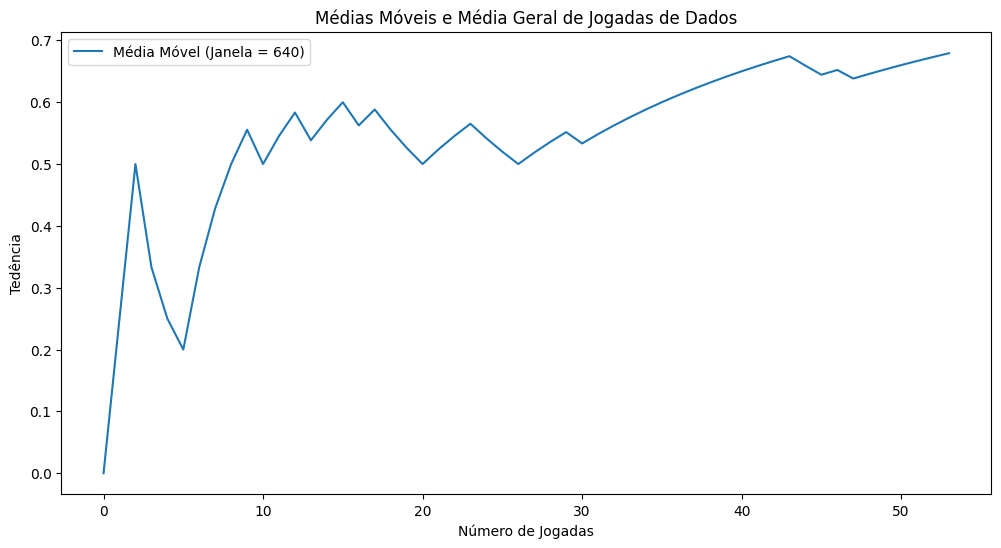

Quantidade de Apostas: 53 
Media Apostas: 0.68 
Última entrada: 1
Saida: 730 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.689024   
1       0.688235      0.684211      0.686047      0.682081      0.683908   
2       0.688889      0.685083      0.681319      0.683060      0.679348   
3       0.689474      0.691099      0.692708      0.694301      0.690722   
4       0.690000      0.691542      0.693069      0.689655      0.686275   
5       0.690476      0.691943      0.688679      0.690141      0.691589   
6       0.686364      0.683258      0.680180      0.681614      0.678571   
7       0.678261      0.679654      0.681034      0.682403      0.679487   
8       0.683333      0.684647      0.685950      0.683128      0.680328   
9       0.680000      0.681275      0.678571      0.675889      0.673228   
10      0.673077      0.674330      0.675573      0.673004      0.67

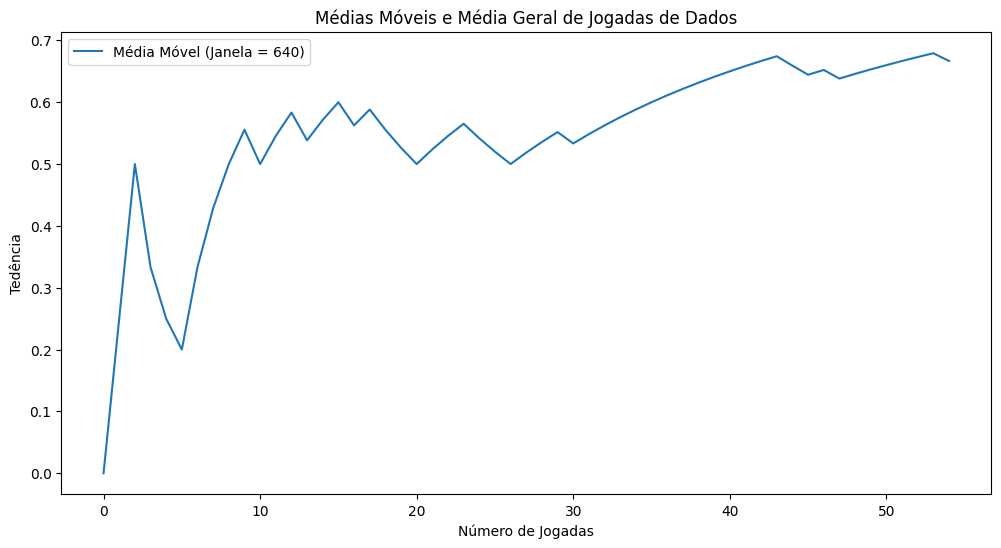

Quantidade de Apostas: 54 
Media Apostas: 0.67 
Última entrada: 0
Saida: 731 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.675000      0.677019      0.679012      0.680982      0.682927   
1       0.682353      0.684211      0.680233      0.682081      0.678161   
2       0.683333      0.685083      0.681319      0.677596      0.679348   
3       0.684211      0.685864      0.687500      0.689119      0.690722   
4       0.685000      0.686567      0.688119      0.689655      0.686275   
5       0.685714      0.687204      0.688679      0.685446      0.686916   
6       0.681818      0.683258      0.680180      0.677130      0.678571   
7       0.678261      0.675325      0.676724      0.678112      0.679487   
8       0.679167      0.680498      0.681818      0.683128      0.680328   
9       0.676000      0.677291      0.678571      0.675889      0.673228   
10      0.673077      0.670498      0.671756      0.673004      0.67

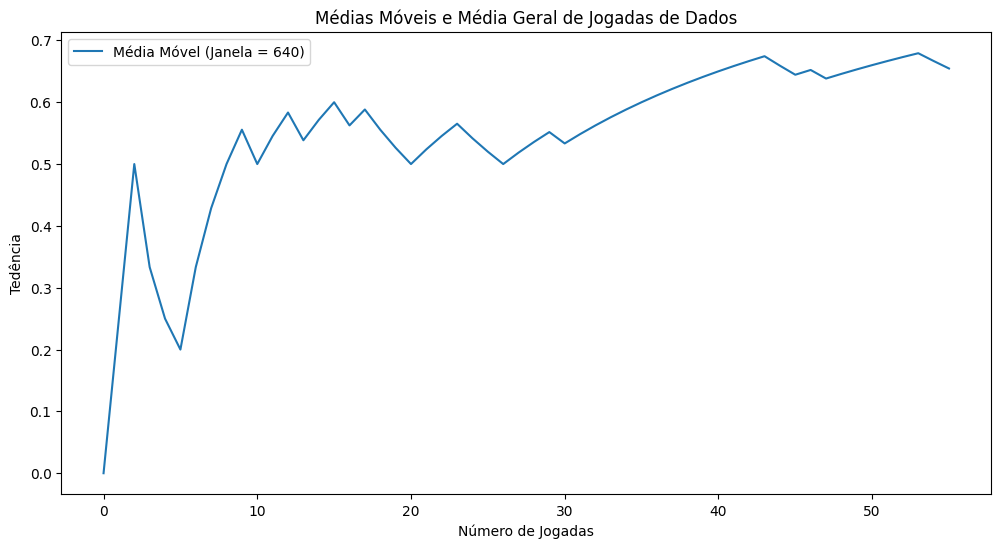

Quantidade de Apostas: 55 
Media Apostas: 0.65 
Última entrada: 0
Saida: 732 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.675000      0.677019      0.679012      0.680982      0.682927   
1       0.688235      0.684211      0.686047      0.682081      0.683908   
2       0.688889      0.685083      0.686813      0.683060      0.679348   
3       0.684211      0.685864      0.687500      0.689119      0.690722   
4       0.685000      0.686567      0.688119      0.689655      0.691176   
5       0.685714      0.687204      0.688679      0.690141      0.686916   
6       0.686364      0.683258      0.684685      0.681614      0.678571   
7       0.678261      0.679654      0.676724      0.678112      0.679487   
8       0.679167      0.680498      0.681818      0.683128      0.684426   
9       0.680000      0.677291      0.678571      0.679842      0.677165   
10      0.673077      0.674330      0.671756      0.673004      0.67

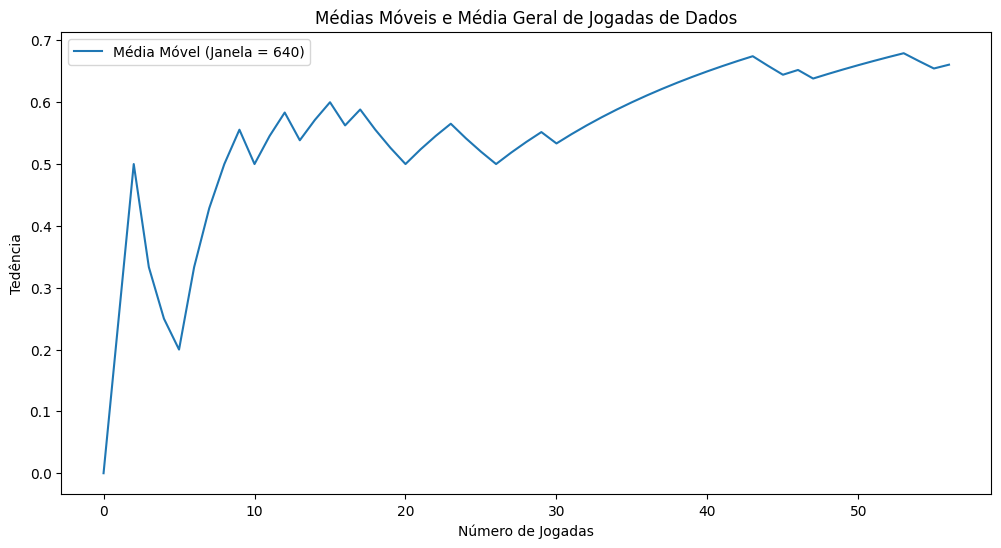

Quantidade de Apostas: 56 
Media Apostas: 0.66 
Última entrada: 1
Saida: 733 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.668750      0.670807      0.672840      0.674847      0.676829   
1       0.682353      0.684211      0.680233      0.682081      0.678161   
2       0.683333      0.685083      0.681319      0.683060      0.679348   
3       0.678947      0.680628      0.682292      0.683938      0.685567   
4       0.685000      0.681592      0.683168      0.684729      0.686275   
5       0.680952      0.682464      0.683962      0.685446      0.686916   
6       0.686364      0.683258      0.680180      0.681614      0.678571   
7       0.673913      0.675325      0.676724      0.673820      0.675214   
8       0.675000      0.676349      0.677686      0.679012      0.680328   
9       0.676000      0.677291      0.674603      0.675889      0.677165   
10      0.669231      0.670498      0.671756      0.669202      0.67

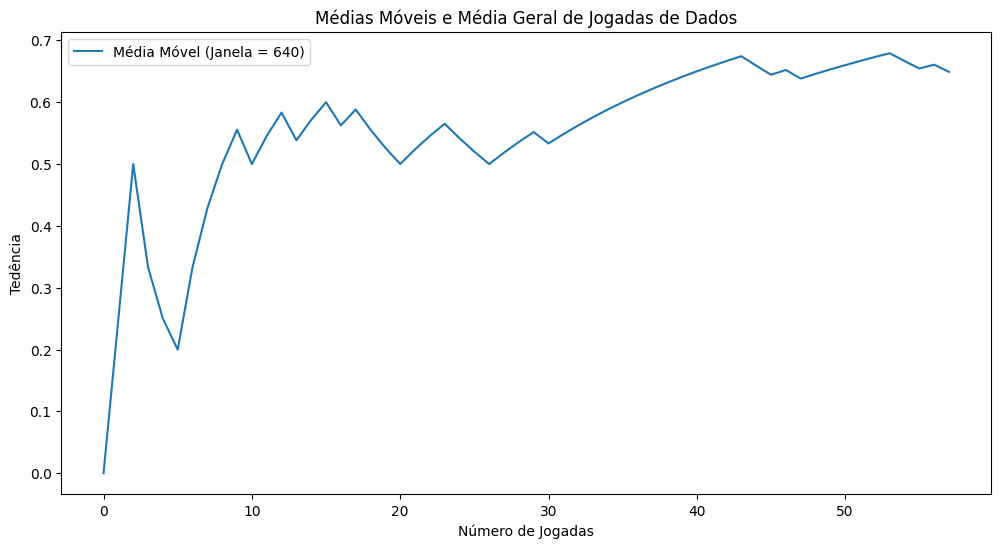

Quantidade de Apostas: 57 
Media Apostas: 0.65 
Última entrada: 0
Saida: 734 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.668750      0.670807      0.672840      0.674847      0.676829   
1       0.682353      0.684211      0.686047      0.682081      0.683908   
2       0.683333      0.685083      0.686813      0.683060      0.684783   
3       0.678947      0.680628      0.682292      0.683938      0.685567   
4       0.690000      0.686567      0.683168      0.684729      0.686275   
5       0.685714      0.682464      0.683962      0.685446      0.686916   
6       0.686364      0.687783      0.684685      0.681614      0.683036   
7       0.673913      0.675325      0.676724      0.678112      0.675214   
8       0.675000      0.676349      0.677686      0.679012      0.680328   
9       0.676000      0.677291      0.678571      0.675889      0.677165   
10      0.669231      0.670498      0.671756      0.673004      0.67

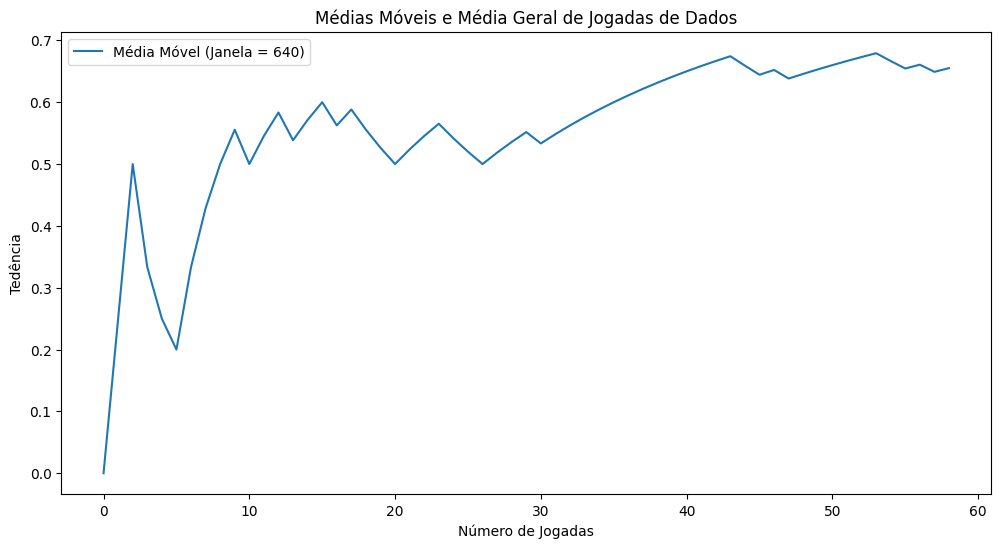

Quantidade de Apostas: 58 
Media Apostas: 0.66 
Última entrada: 1
Saida: 735 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.675000      0.670807      0.672840      0.674847      0.676829   
1       0.682353      0.684211      0.686047      0.687861      0.683908   
2       0.683333      0.685083      0.686813      0.688525      0.684783   
3       0.678947      0.680628      0.682292      0.683938      0.685567   
4       0.690000      0.691542      0.688119      0.684729      0.686275   
5       0.685714      0.687204      0.683962      0.685446      0.686916   
6       0.690909      0.687783      0.689189      0.686099      0.683036   
7       0.678261      0.675325      0.676724      0.678112      0.679487   
8       0.675000      0.676349      0.677686      0.679012      0.680328   
9       0.676000      0.677291      0.678571      0.679842      0.677165   
10      0.669231      0.670498      0.671756      0.673004      0.67

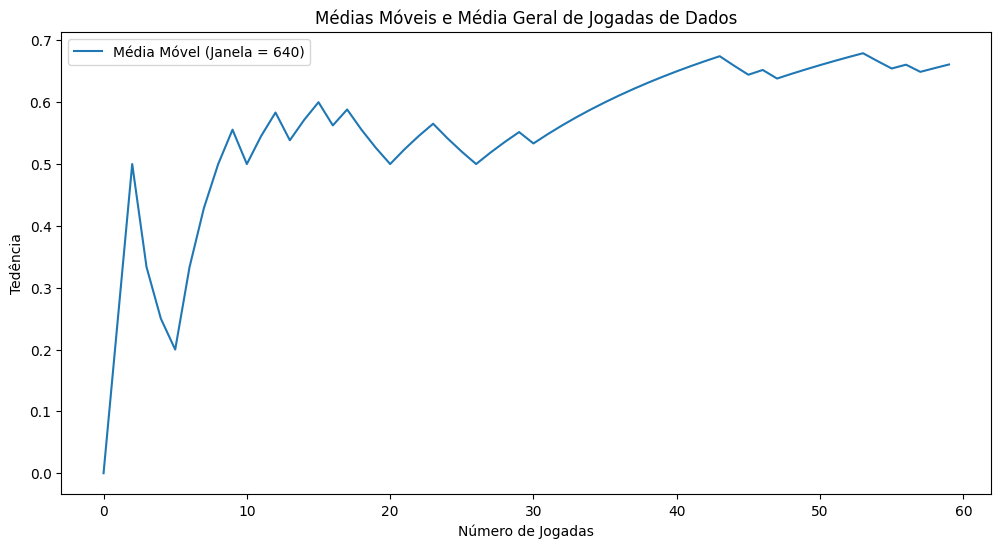

Quantidade de Apostas: 59 
Media Apostas: 0.66 
Última entrada: 1
Saida: 736 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.677019      0.672840      0.674847      0.676829   
1       0.688235      0.684211      0.686047      0.687861      0.689655   
2       0.683333      0.685083      0.686813      0.688525      0.690217   
3       0.678947      0.680628      0.682292      0.683938      0.685567   
4       0.690000      0.691542      0.693069      0.689655      0.686275   
5       0.685714      0.687204      0.688679      0.685446      0.686916   
6       0.690909      0.692308      0.689189      0.690583      0.687500   
7       0.678261      0.679654      0.676724      0.678112      0.679487   
8       0.679167      0.676349      0.677686      0.679012      0.680328   
9       0.680000      0.677291      0.678571      0.679842      0.681102   
10      0.673077      0.670498      0.671756      0.673004      0.67

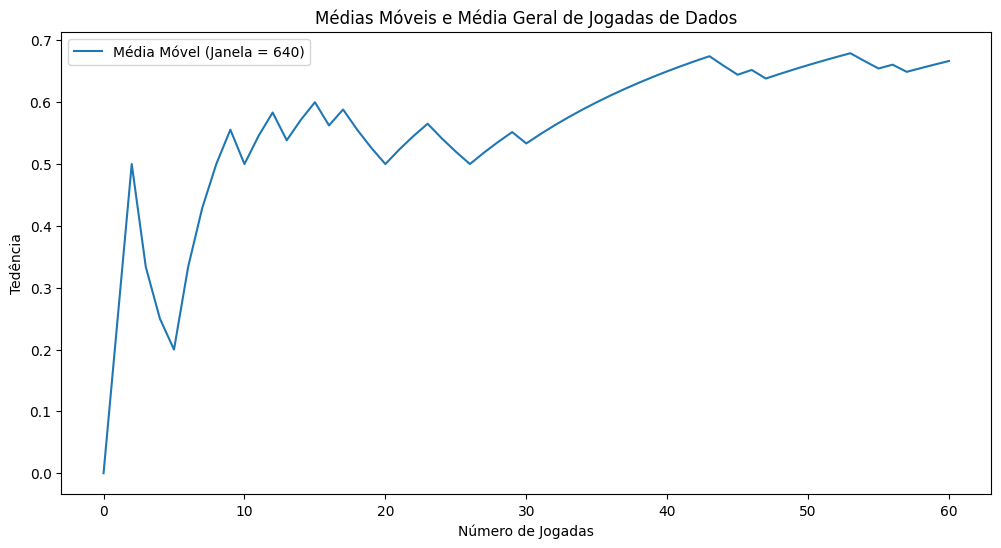

Quantidade de Apostas: 60 
Media Apostas: 0.67 
Última entrada: 1
Saida: 737 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.679012      0.674847      0.676829   
1       0.688235      0.690058      0.686047      0.687861      0.689655   
2       0.683333      0.685083      0.686813      0.688525      0.690217   
3       0.684211      0.680628      0.682292      0.683938      0.685567   
4       0.695000      0.691542      0.693069      0.694581      0.691176   
5       0.690476      0.687204      0.688679      0.690141      0.686916   
6       0.690909      0.692308      0.693694      0.690583      0.691964   
7       0.682609      0.679654      0.681034      0.678112      0.679487   
8       0.683333      0.680498      0.677686      0.679012      0.680328   
9       0.684000      0.681275      0.678571      0.679842      0.681102   
10      0.676923      0.674330      0.671756      0.673004      0.67

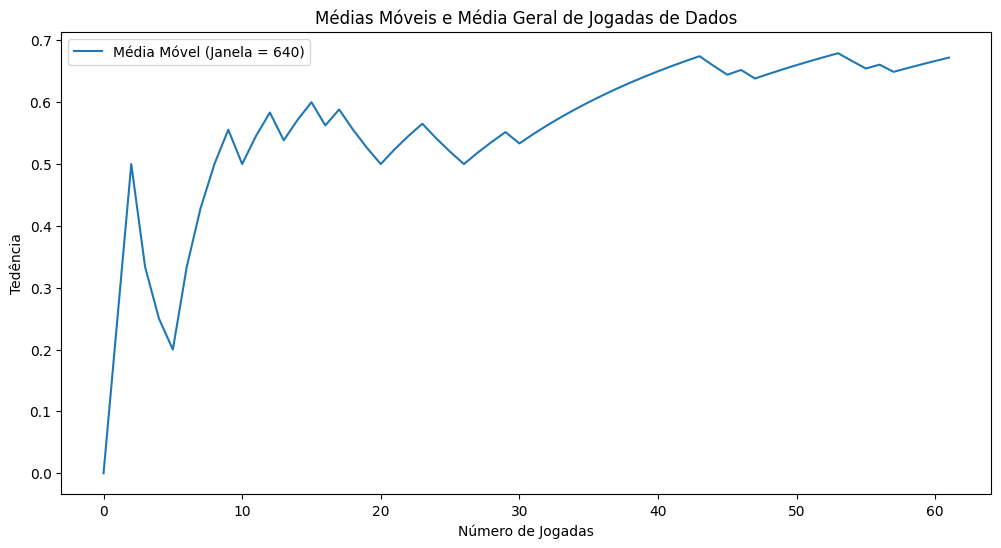

Quantidade de Apostas: 61 
Media Apostas: 0.67 
Última entrada: 1
Saida: 738 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.683230      0.685185      0.680982      0.676829   
1       0.688235      0.690058      0.691860      0.687861      0.689655   
2       0.688889      0.685083      0.686813      0.688525      0.690217   
3       0.684211      0.685864      0.682292      0.683938      0.685567   
4       0.695000      0.696517      0.693069      0.694581      0.696078   
5       0.695238      0.691943      0.688679      0.690141      0.691589   
6       0.690909      0.692308      0.693694      0.695067      0.691964   
7       0.682609      0.683983      0.681034      0.682403      0.679487   
8       0.683333      0.684647      0.681818      0.679012      0.680328   
9       0.688000      0.685259      0.682540      0.679842      0.681102   
10      0.680769      0.678161      0.675573      0.673004      0.67

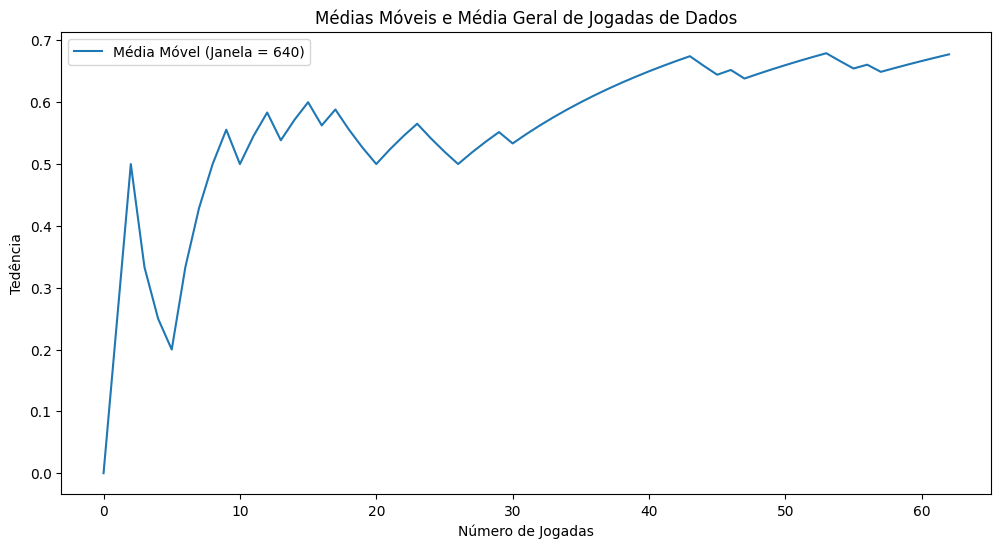

Quantidade de Apostas: 62 
Media Apostas: 0.68 
Última entrada: 1
Saida: 739 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.685185      0.687117      0.682927   
1       0.688235      0.690058      0.691860      0.693642      0.689655   
2       0.688889      0.690608      0.686813      0.688525      0.690217   
3       0.689474      0.685864      0.687500      0.683938      0.685567   
4       0.695000      0.696517      0.698020      0.694581      0.696078   
5       0.695238      0.696682      0.693396      0.690141      0.691589   
6       0.695455      0.692308      0.693694      0.695067      0.696429   
7       0.686957      0.683983      0.685345      0.682403      0.683761   
8       0.683333      0.684647      0.685950      0.683128      0.680328   
9       0.688000      0.689243      0.686508      0.683794      0.681102   
10      0.684615      0.681992      0.679389      0.676806      0.67

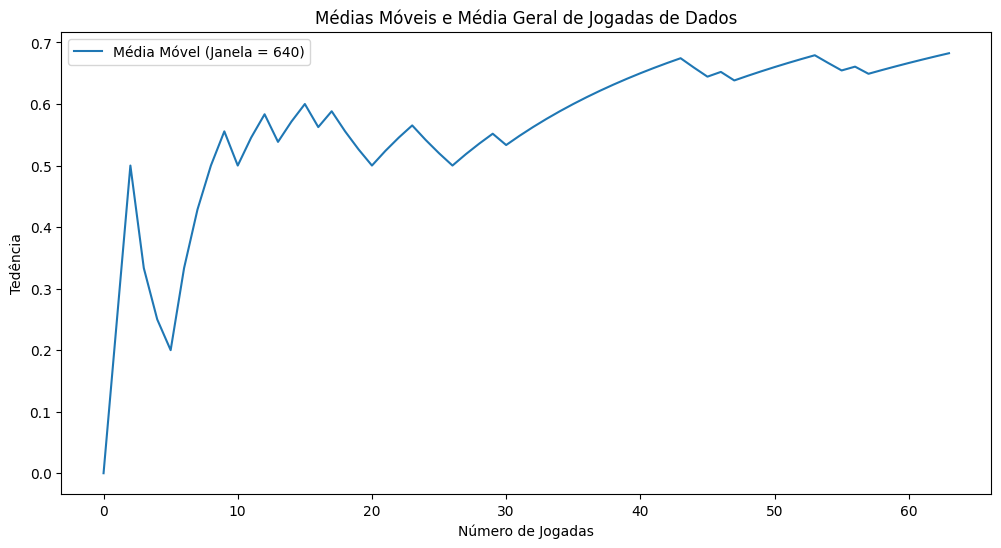

Quantidade de Apostas: 63 
Media Apostas: 0.68 
Última entrada: 1
Saida: 740 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.693750      0.689441      0.691358      0.687117      0.689024   
1       0.688235      0.690058      0.691860      0.693642      0.695402   
2       0.694444      0.690608      0.692308      0.688525      0.690217   
3       0.694737      0.691099      0.687500      0.689119      0.685567   
4       0.695000      0.696517      0.698020      0.699507      0.696078   
5       0.695238      0.696682      0.698113      0.694836      0.691589   
6       0.695455      0.696833      0.693694      0.695067      0.696429   
7       0.691304      0.688312      0.685345      0.686695      0.683761   
8       0.683333      0.684647      0.685950      0.687243      0.684426   
9       0.688000      0.689243      0.690476      0.687747      0.685039   
10      0.684615      0.685824      0.683206      0.680608      0.67

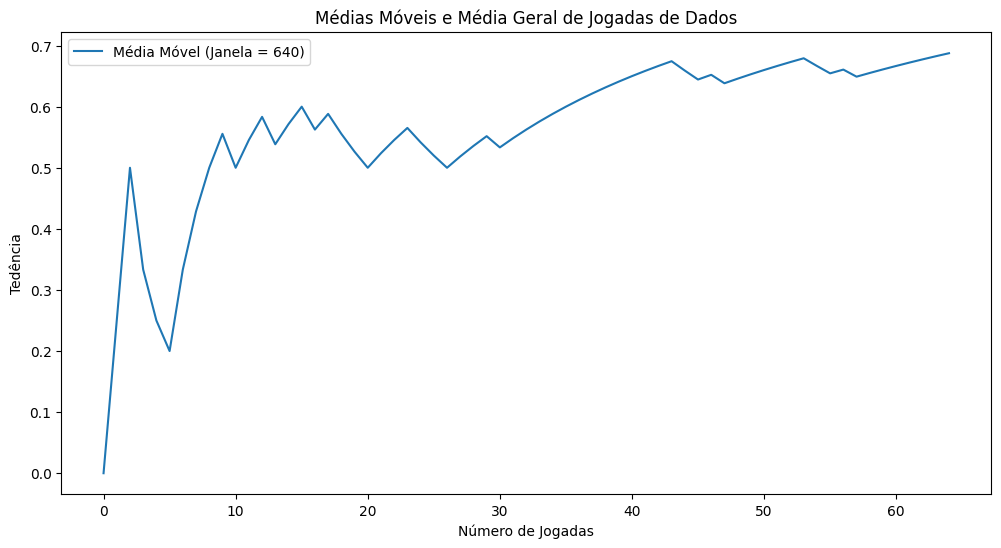

Quantidade de Apostas: 64 
Media Apostas: 0.69 
Última entrada: 1
Saida: 741 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.687500      0.689441      0.685185      0.687117      0.682927   
1       0.682353      0.684211      0.686047      0.687861      0.689655   
2       0.688889      0.690608      0.686813      0.688525      0.684783   
3       0.689474      0.691099      0.687500      0.683938      0.685567   
4       0.690000      0.691542      0.693069      0.694581      0.696078   
5       0.690476      0.691943      0.693396      0.694836      0.691589   
6       0.690909      0.692308      0.693694      0.690583      0.691964   
7       0.686957      0.688312      0.685345      0.682403      0.683761   
8       0.683333      0.680498      0.681818      0.683128      0.684426   
9       0.684000      0.685259      0.686508      0.687747      0.685039   
10      0.680769      0.681992      0.683206      0.680608      0.67

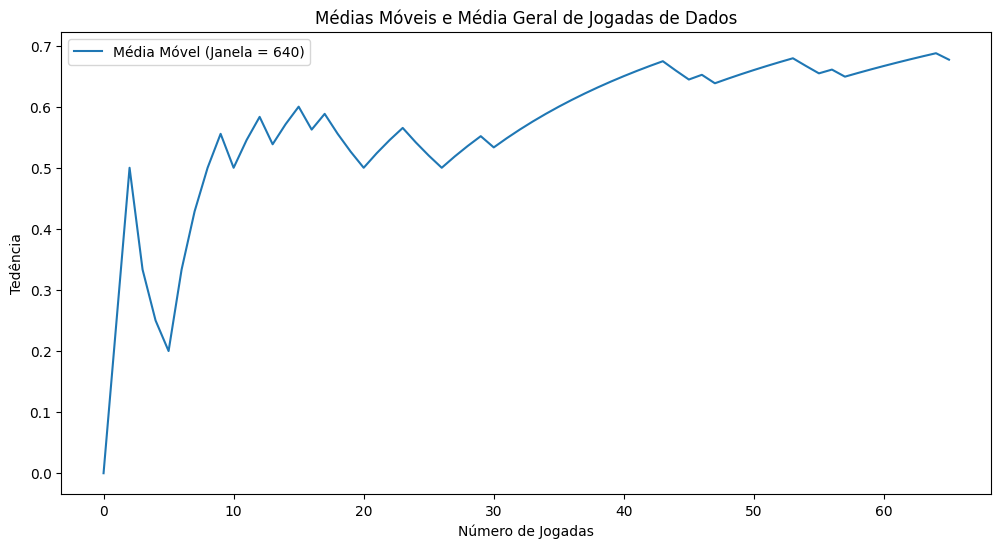

Quantidade de Apostas: 65 
Media Apostas: 0.68 
Última entrada: 0
Saida: 742 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.680982      0.682927   
1       0.676471      0.678363      0.680233      0.682081      0.683908   
2       0.688889      0.685083      0.686813      0.683060      0.684783   
3       0.689474      0.685864      0.687500      0.683938      0.680412   
4       0.685000      0.686567      0.688119      0.689655      0.691176   
5       0.685714      0.687204      0.688679      0.690141      0.691589   
6       0.686364      0.687783      0.689189      0.690583      0.687500   
7       0.686957      0.683983      0.685345      0.682403      0.679487   
8       0.679167      0.680498      0.677686      0.679012      0.680328   
9       0.680000      0.681275      0.682540      0.683794      0.685039   
10      0.680769      0.678161      0.679389      0.680608      0.67

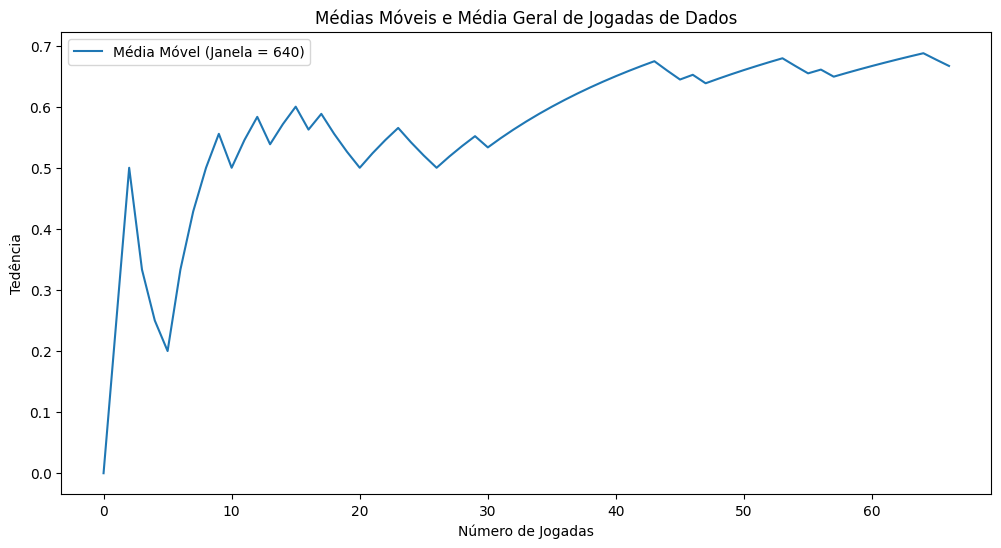

Quantidade de Apostas: 66 
Media Apostas: 0.67 
Última entrada: 0
Saida: 743 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.682927   
1       0.676471      0.678363      0.680233      0.682081      0.683908   
2       0.688889      0.690608      0.686813      0.688525      0.684783   
3       0.689474      0.691099      0.687500      0.689119      0.685567   
4       0.685000      0.686567      0.688119      0.689655      0.691176   
5       0.690476      0.687204      0.688679      0.690141      0.691589   
6       0.686364      0.687783      0.689189      0.690583      0.691964   
7       0.691304      0.688312      0.685345      0.686695      0.683761   
8       0.679167      0.680498      0.681818      0.679012      0.680328   
9       0.680000      0.681275      0.682540      0.683794      0.685039   
10      0.680769      0.681992      0.679389      0.680608      0.68

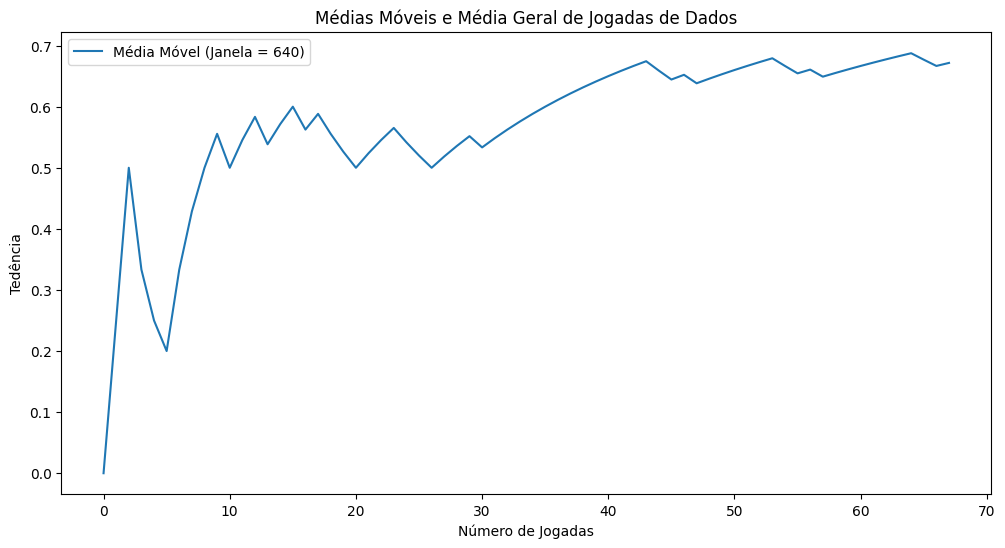

Quantidade de Apostas: 67 
Media Apostas: 0.67 
Última entrada: 1
Saida: 744 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.689024   
1       0.676471      0.678363      0.680233      0.682081      0.683908   
2       0.688889      0.690608      0.692308      0.688525      0.690217   
3       0.689474      0.691099      0.692708      0.689119      0.690722   
4       0.685000      0.686567      0.688119      0.689655      0.691176   
5       0.695238      0.691943      0.688679      0.690141      0.691589   
6       0.690909      0.687783      0.689189      0.690583      0.691964   
7       0.691304      0.692641      0.689655      0.686695      0.688034   
8       0.679167      0.680498      0.681818      0.683128      0.680328   
9       0.680000      0.681275      0.682540      0.683794      0.685039   
10      0.680769      0.681992      0.683206      0.680608      0.68

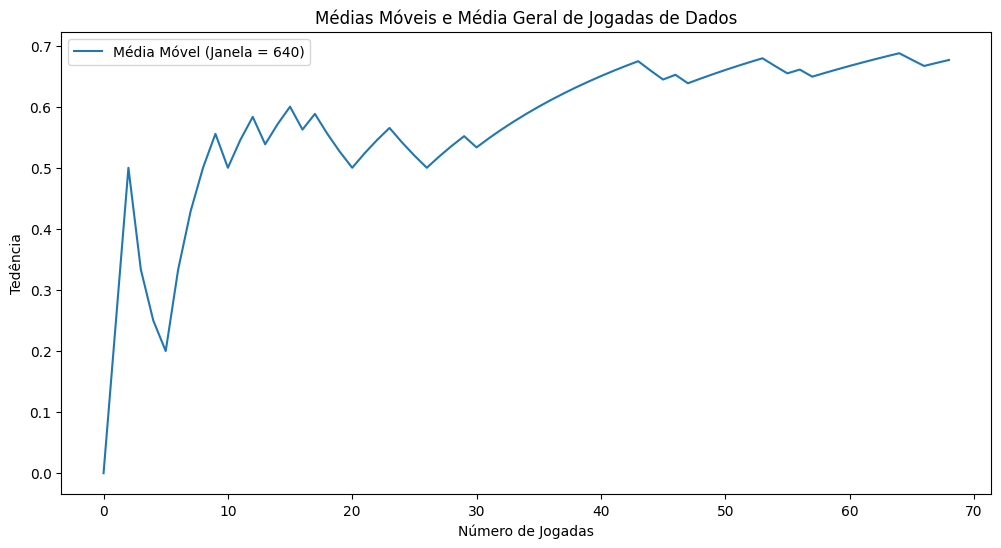

Quantidade de Apostas: 68 
Media Apostas: 0.68 
Última entrada: 1
Saida: 745 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.689024   
1       0.682353      0.678363      0.680233      0.682081      0.683908   
2       0.688889      0.690608      0.692308      0.693989      0.690217   
3       0.689474      0.691099      0.692708      0.694301      0.690722   
4       0.685000      0.686567      0.688119      0.689655      0.691176   
5       0.695238      0.696682      0.693396      0.690141      0.691589   
6       0.690909      0.692308      0.689189      0.690583      0.691964   
7       0.695652      0.692641      0.693966      0.690987      0.688034   
8       0.683333      0.680498      0.681818      0.683128      0.684426   
9       0.680000      0.681275      0.682540      0.683794      0.685039   
10      0.680769      0.681992      0.683206      0.684411      0.68

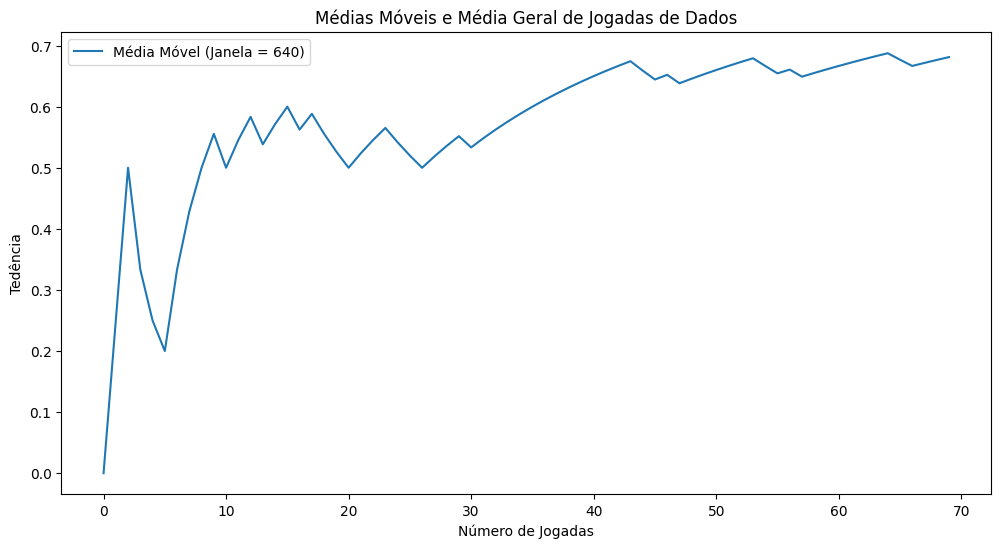

Quantidade de Apostas: 69 
Media Apostas: 0.68 
Última entrada: 1
Saida: 746 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.687117      0.689024   
1       0.688235      0.684211      0.680233      0.682081      0.683908   
2       0.694444      0.690608      0.692308      0.693989      0.695652   
3       0.689474      0.691099      0.692708      0.694301      0.695876   
4       0.685000      0.686567      0.688119      0.689655      0.691176   
5       0.695238      0.696682      0.698113      0.694836      0.691589   
6       0.690909      0.692308      0.693694      0.690583      0.691964   
7       0.695652      0.696970      0.693966      0.695279      0.692308   
8       0.683333      0.684647      0.681818      0.683128      0.684426   
9       0.684000      0.681275      0.682540      0.683794      0.685039   
10      0.684615      0.681992      0.683206      0.684411      0.68

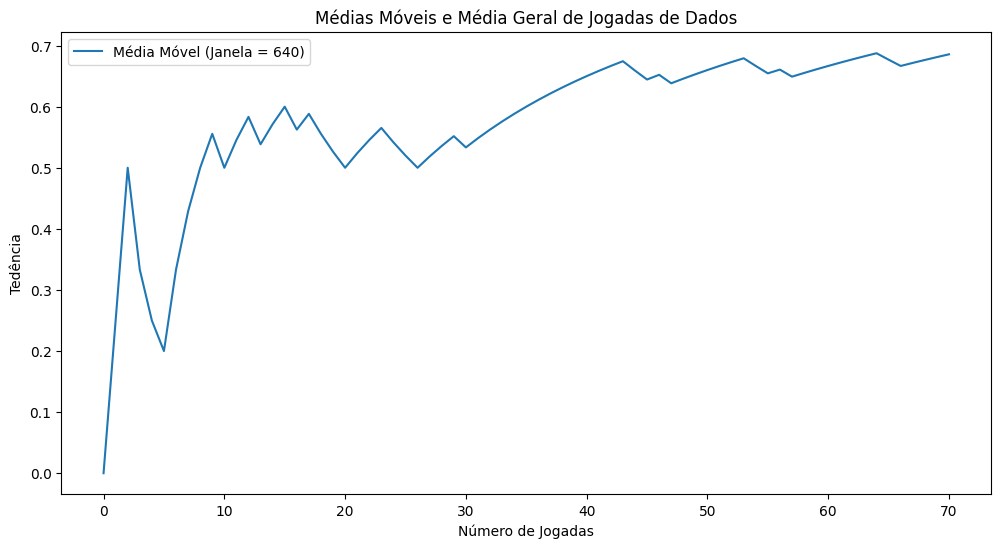

Quantidade de Apostas: 70 
Media Apostas: 0.69 
Última entrada: 1
Saida: 747 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.675000      0.677019      0.679012      0.680982      0.682927   
1       0.682353      0.684211      0.680233      0.676301      0.678161   
2       0.688889      0.690608      0.686813      0.688525      0.690217   
3       0.684211      0.685864      0.687500      0.689119      0.690722   
4       0.685000      0.681592      0.683168      0.684729      0.686275   
5       0.695238      0.691943      0.693396      0.694836      0.691589   
6       0.690909      0.687783      0.689189      0.690583      0.687500   
7       0.691304      0.692641      0.693966      0.690987      0.692308   
8       0.683333      0.680498      0.681818      0.679012      0.680328   
9       0.684000      0.681275      0.678571      0.679842      0.681102   
10      0.684615      0.681992      0.679389      0.680608      0.68

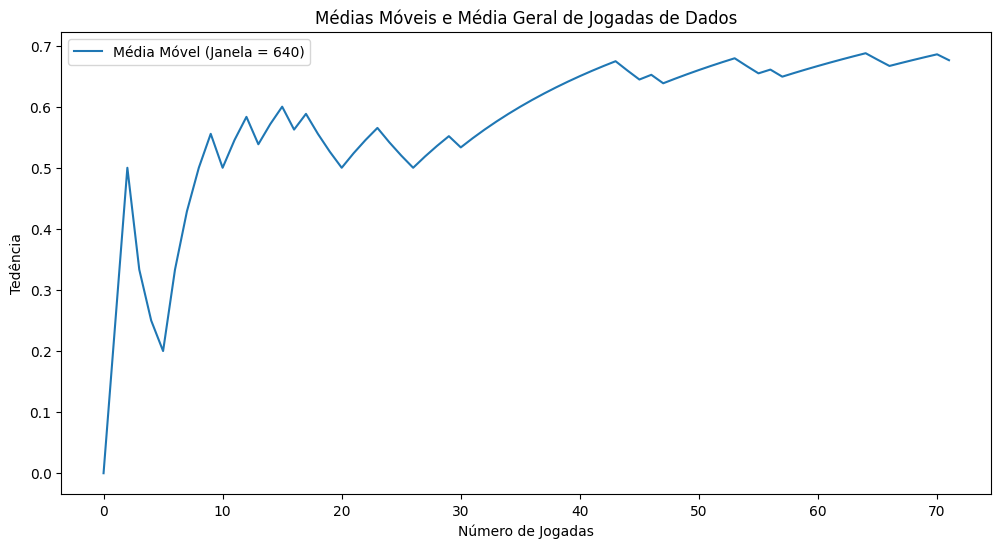

Quantidade de Apostas: 71 
Media Apostas: 0.68 
Última entrada: 0
Saida: 748 
Media Geral: 0.68
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.677019      0.679012      0.680982      0.682927   
1       0.688235      0.684211      0.686047      0.682081      0.678161   
2       0.688889      0.690608      0.692308      0.688525      0.690217   
3       0.689474      0.685864      0.687500      0.689119      0.690722   
4       0.685000      0.686567      0.683168      0.684729      0.686275   
5       0.695238      0.696682      0.693396      0.694836      0.696262   
6       0.695455      0.692308      0.689189      0.690583      0.691964   
7       0.691304      0.692641      0.693966      0.695279      0.692308   
8       0.683333      0.684647      0.681818      0.683128      0.680328   
9       0.684000      0.685259      0.682540      0.679842      0.681102   
10      0.688462      0.685824      0.683206      0.680608      0.68

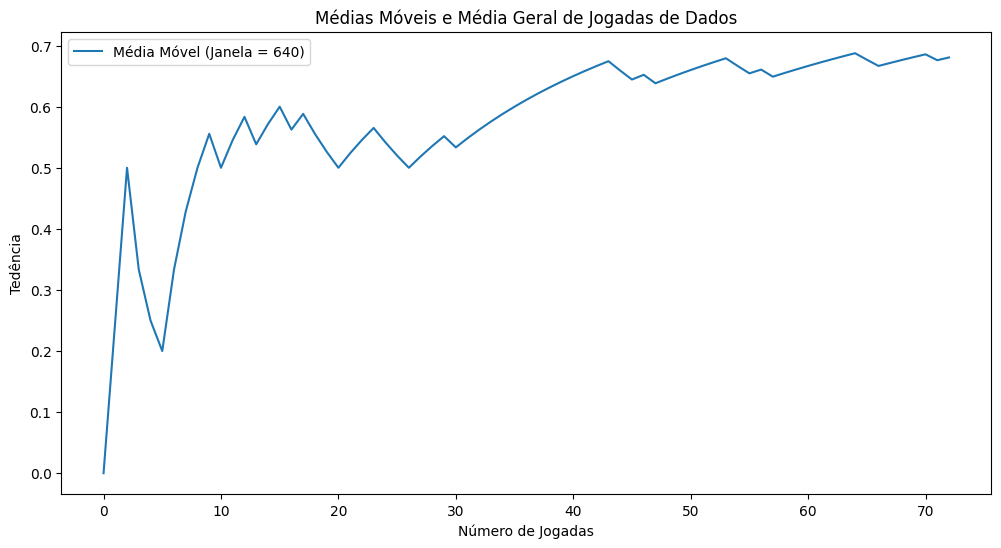

Quantidade de Apostas: 72 
Media Apostas: 0.68 
Última entrada: 1
Saida: 749 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.679012      0.680982      0.682927   
1       0.688235      0.690058      0.686047      0.687861      0.683908   
2       0.688889      0.690608      0.692308      0.693989      0.690217   
3       0.689474      0.691099      0.687500      0.689119      0.690722   
4       0.690000      0.686567      0.688119      0.684729      0.686275   
5       0.695238      0.696682      0.698113      0.694836      0.696262   
6       0.695455      0.696833      0.693694      0.690583      0.691964   
7       0.695652      0.692641      0.693966      0.695279      0.696581   
8       0.687500      0.684647      0.685950      0.683128      0.684426   
9       0.684000      0.685259      0.686508      0.683794      0.681102   
10      0.688462      0.689655      0.687023      0.684411      0.68

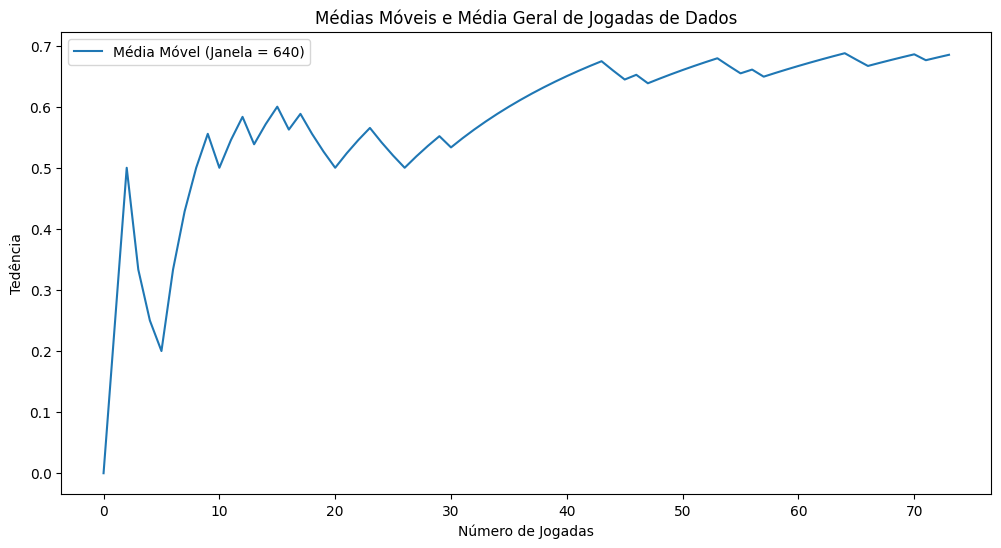

Quantidade de Apostas: 73 
Media Apostas: 0.68 
Última entrada: 1
Saida: 750 
Media Geral: 0.69
    Interval 630  Interval 631  Interval 632  Interval 633  Interval 634  \
0       0.681250      0.683230      0.685185      0.680982      0.682927   
1       0.694118      0.690058      0.691860      0.687861      0.689655   
2       0.688889      0.690608      0.692308      0.693989      0.695652   
3       0.694737      0.691099      0.692708      0.689119      0.690722   
4       0.695000      0.691542      0.688119      0.689655      0.686275   
5       0.695238      0.696682      0.698113      0.699531      0.696262   
6       0.695455      0.696833      0.698198      0.695067      0.691964   
7       0.695652      0.696970      0.693966      0.695279      0.696581   
8       0.691667      0.688797      0.685950      0.687243      0.684426   
9       0.684000      0.685259      0.686508      0.687747      0.685039   
10      0.688462      0.689655      0.690840      0.688213      0.68

KeyboardInterrupt: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carrega os dados
data1 = pd.read_csv('/home/darkcover/Documentos/Out/dados/odds_200k.csv')
data1 = data1.drop(columns=['Unnamed: 0'])
data1 = data1.rename(columns={'Odd_Categoria': 'odd_saida'})
print("Data Carregada ...")

# Inicialização das variáveis
array_count, array_geral = [], []
matrix_count = np.zeros((48, 10))
apostar_count, media_array1, x  = [0], [0], [0]
media_array = []
rodada_aposta = []
apostar_matrix = []
sense, media_apostas, order = 0, 0, 21
register1, register2 = 0, 0
bag = 50
i = 1

# Função para calcular a média das últimas jogadas
def calcular_media(array, interval):
    if len(array) < interval:
        return sum(array) / len(array)
    return sum(array[-interval:]) / interval

def plotar_grafico(x, y):
    # Visualizar os resultados
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label='Média Móvel (Janela = 640)')
    plt.xlabel('Número de Jogadas')
    plt.ylabel('Tedência')
    plt.title('Médias Móveis e Média Geral de Jogadas de Dados')
    plt.legend()
    plt.show()

# Itera sobre o range especificado
for i in range(len(data1)):
    print(f'Saida: {i} \nMedia Geral: {sum(array_count)/(i+1):.2f}')
             
    odd_saida = data1['odd_saida'][i]

    # Atualiza os arrays
    if odd_saida >= 5:
        array_count.append(1)
    else:
        array_count.append(0)
    
    array_geral.append(odd_saida)
    
    # Verifica se array_count tem pelo menos 640 elementos
    if len(array_count) >= 640:
        for row in range(48):
            start = 160 + row * 10
            for col in range(10):
                interval = start + col
                matrix_count[row, col] = calcular_media(array_count, interval)
                if matrix_count[row, col] < 0.60 or matrix_count[row, col] > 0.69:
                    sense = 1
                    register1, register2 = row, col

        # Cria um DataFrame pandas a partir da matriz para impressão mais legível
        df_matrix = pd.DataFrame(matrix_count, columns=[f'Interval {160 + row * 10 + col}' for col in range(10)])
        print(df_matrix)
        
        if sense == 1:
            if order <= 20:
                order += 1
            else:
                if odd_saida >= 5:
                    apostar_count.append(1)
                else:
                    apostar_count.append(0)
                
                media_apostas = sum(apostar_count) / len(apostar_count)
                x.append(len(apostar_count))
                media_array1.append(media_apostas)
                media_array.append(media_apostas)
                
                if media_apostas >= 0.73 and len(apostar_count) >= 20:
                    apostar_matrix.append(apostar_count)
                    apostar_count = [0]
                    media_array1 = [0]
                    x = [0]
                    order = 0
                    sense = 0
                if len(apostar_count) >= 640 and media_apostas <= 0.69:
                    apostar_matrix.append(apostar_count)
                    apostar_count = [0]
                    media_array1 = [0]
                    x = [0]
                    sense = 0
                    order = 0

                rodada_aposta.append(i)
                plotar_grafico(x, media_array1)
                print(f'Quantidade de Apostas: {len(apostar_count)} \nMedia Apostas: {media_apostas:.2f} \nÚltima entrada: {array_count[-1]}')
                order += 1

# Salvar os resultados em arquivos
df = pd.DataFrame({'Media_Apostas': media_array, 'Rodada': rodada_aposta})
df.to_csv("/home/darkcover/Documentos/Out/dados/Parte2/estudo6.csv")
df.to_excel("/home/darkcover/Documentos/Out/dados/Parte2/estudo6.xlsx")

df1 = pd.DataFrame({'Odd_Saida': array_geral})
df1.to_excel("/home/darkcover/Documentos/Out/dados/Parte2/estudo7.xlsx")
